In [79]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [80]:
data_0 = pd.read_csv('../data/Kickstarter000.csv')
data_1 = pd.read_csv('../data/Kickstarter001.csv')
# data_2 = pd.read_csv('Kickstarter002.csv')
# data_3 = pd.read_csv('Kickstarter003.csv')
# data_4 = pd.read_csv('Kickstarter004.csv')
# data_5 = pd.read_csv('Kickstarter005.csv')
# data_6 = pd.read_csv('Kickstarter006.csv')
# data_7 = pd.read_csv('Kickstarter007.csv')
# data_8 = pd.read_csv('Kickstarter008.csv')
# data_9 = pd.read_csv('Kickstarter009.csv')
# data_10 = pd.read_csv('Kickstarter010.csv')
# data_11 = pd.read_csv('Kickstarter011.csv')

In [81]:
data = pd.concat([data_0, data_1])
# data = pd.concat([data_0, data_1, data_2, data_3, data_4, data_5])

In [82]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8295 entries, 0 to 4158
Data columns (total 32 columns):
id                        8295 non-null int64
photo                     8295 non-null object
name                      8295 non-null object
blurb                     8293 non-null object
goal                      8295 non-null int64
pledged                   8295 non-null float64
state                     8295 non-null object
slug                      8295 non-null object
disable_communication     8295 non-null bool
country                   8295 non-null object
currency                  8295 non-null object
currency_symbol           8295 non-null object
currency_trailing_code    8295 non-null bool
deadline                  8295 non-null int64
state_changed_at          8295 non-null int64
created_at                8295 non-null int64
launched_at               8295 non-null int64
staff_pick                8295 non-null bool
backers_count             8295 non-null int64
static_usd_r

In [83]:
data.head(2)

id                                              photo  \
0  1454391034  {"small":"https://ksr-ugc.imgix.net/assets/011...   
1  1655206086  {"small":"https://ksr-ugc.imgix.net/assets/012...   

                                                name  \
0  Auntie Di's Music Time Sign ASL for Hearing an...   
1                    Jump Start Kindergarten Toolkit   

                                               blurb  goal  pledged   state  \
0  MTS ASL Curriculum Workbook is a reproducible ...  1500      0.0  failed   
1  This kit teaches how to print, correct an ugly...   500      0.0  failed   

                                                slug disable_communication  \
0  auntie-dis-music-time-sign-asl-for-hearing-and...                 False   
1                    jump-start-kindergarten-toolkit                 False   

  country     ...                                                location  \
0      US     ...       {"country":"US","urls":{"web":{"discover":"htt...   
1      US     ...       {"country":"US","urls":{"web":{"discover":"htt...   

                                            category  \
0  {"urls":{"web":{"discover":"http://www.kicksta...   
1  {"urls":{"web":{"discover":"http://www.kicksta...   

                                             profile  spotlight  \
0  {"background_image_opacity":0.8,"should_show_f...      False   
1  {"background_image_opacity":0.8,"should_show_f...      False   

                                                urls  \
0  {"web":{"project":"https://www.kickstarter.com...   
1  {"web":{"project":"https://www.kickstarter.com...   

                                          source_url  friends is_starred  \
0  https://www.kickstarter.com/discover/categorie...      NaN        NaN   
1  https://www.kickstarter.com/discover/categorie...      NaN        NaN   

   is_backing  permissions  
0         NaN          NaN  
1         NaN          NaN  

[2 rows x 32 columns]

In [84]:
data.loc[:, 'country':'location'].head(2)

country currency currency_symbol currency_trailing_code    deadline  \
0      US      USD               $                   True  1422030900   
1      US      USD               $                   True  1430514802   

   state_changed_at  created_at  launched_at staff_pick  backers_count  \
0        1422030900  1417323357   1418845656      False              0   
1        1430514804  1424446123   1425334402      False              0   

   static_usd_rate  usd_pledged  \
0              1.0          0.0   
1              1.0          0.0   

                                             creator  \
0  {"urls":{"web":{"user":"https://www.kickstarte...   
1  {"urls":{"web":{"user":"https://www.kickstarte...   

                                            location  
0  {"country":"US","urls":{"web":{"discover":"htt...  
1  {"country":"US","urls":{"web":{"discover":"htt...

# Clean the JSON format for certain columns below:

In [85]:
import json

def parse_json(cell, key):
    try:
        return str(json.loads(cell)[key])
    except UnicodeEncodeError as e:
        print e
        print cell
        return json.loads(cell)[key]
    except TypeError as e:
        print e
        print cell
        return 'na'

In [86]:
category = map(parse_json, data.iloc[:]['category'], ['name']*len(data))
print len(category)
print data['category'].shape
print category[0:5]

8295
(8295,)
['Academic', 'Academic', 'Academic', 'Academic', 'Academic']


In [87]:
cat_slug = map(parse_json, data.iloc[:]['category'], ['slug']*len(data))
for i, item in enumerate(set(cat_slug)):
    print i+1, ':', item

1 : theater/immersive
2 : games/video games
3 : theater/experimental
4 : music/classical music
5 : film & video/shorts
6 : technology/flight
7 : technology/diy electronics
8 : music/electronic music
9 : theater/plays
10 : technology/web
11 : music/country & folk
12 : theater/comedy
13 : technology/hardware
14 : technology/gadgets
15 : theater/spaces
16 : film & video/narrative film
17 : food/restaurants
18 : film & video/webseries
19 : theater/festivals
20 : technology/apps
21 : technology/wearables
22 : publishing/academic
23 : music/blues
24 : theater/musical
25 : photography/places
26 : film & video/thrillers


In [88]:
data['cat'] = cat_slug
print len(data['cat'].unique())
data['cat'].unique()

26


array(['publishing/academic', 'photography/places',
       'music/electronic music', 'music/country & folk',
       'music/classical music', 'music/blues', 'games/video games',
       'food/restaurants', 'film & video/webseries',
       'film & video/thrillers', 'film & video/shorts',
       'film & video/narrative film', 'technology/web', 'technology/apps',
       'technology/gadgets', 'technology/hardware', 'theater/festivals',
       'theater/plays', 'theater/musical', 'technology/flight',
       'technology/diy electronics', 'theater/spaces', 'theater/immersive',
       'theater/experimental', 'theater/comedy', 'technology/wearables'], dtype=object)

In [89]:
locations = map(parse_json, data.iloc[:]['location'], ['name']*len(data))
print len(locations)
data['location'] = locations
print data['location'].shape

'ascii' codec can't encode character u'\xf6' in position 3: ordinal not in range(128)
{"country":"SE","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/nykoping-se","location":"https://www.kickstarter.com/locations/nykoping-se"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1487284391.b659305df1c718c3b420ef7f41449e25e4a0d7ce&woe_id=900279"}},"name":"Nyköping","displayable_name":"Nyköping, Sweden","short_name":"Nyköping, Sweden","id":900279,"state":"Sodermanland","type":"Town","is_root":false,"slug":"nykoping-se"}
expected string or buffer
nan
'ascii' codec can't encode character u'\xf3' in position 12: ordinal not in range(128)
{"country":"MX","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/ciudad-obregon-mx","location":"https://www.kickstarter.com/locations/ciudad-obregon-mx"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1487286699.cabe963baa8a524eb9a5378d0635415992a80fc6&woe_id=11

In [99]:
data['location'].value_counts().head(100)

London                 491
New York               430
Los Angeles            272
Edinburgh              202
Chicago                178
San Francisco          149
Manhattan              148
Toronto                 93
Brooklyn                89
Austin                  82
Washington              79
Dallas                  78
Atlanta                 76
Seattle                 76
Minneapolis             74
Melbourne               69
Boston                  63
Denver                  61
Philadelphia            61
Sydney                  57
San Diego               55
Portland                54
Houston                 53
Vancouver               49
Paris                   48
Phoenix                 47
Orlando                 46
Montreal                46
Miami                   46
Brisbane                42
                      ... 
Adelaide                17
Nottingham              17
Liverpool               17
Charlotte               17
Greater Manchester      17
Cardiff                 16
C

# Most Successful Categories in Each City

In [124]:
def success_cat_city_plot(city):
    plt.rcParams['figure.figsize'] = 12, 6
    
    
    # Most successful categories.
    plt.subplot(121)
    s_counts = data[(data['location'] == city) &
         (data['state'] == 'successful')]['cat'].value_counts()
    s_counts_x = range(1, len(s_counts) + 1)
    _ = plt.bar(s_counts_x, s_counts)
    _ = plt.xticks(s_counts_x, s_counts.index, rotation='vertical')
    _ = plt.title('City: {} Top Success Cat'.format(city))
    
    # Most failed categories.
    plt.subplot(122)
    f_counts = data[(data['location'] == city) &
         (data['state'] == 'failed')]['cat'].value_counts()
    f_counts_x = range(1, len(f_counts) + 1)
    _ = plt.bar(f_counts_x, f_counts, color='red')
    _ = plt.xticks(f_counts_x, f_counts.index, rotation='vertical')
    _ = plt.title('City: {} Top Failed Cat'.format(city))
    
    plt.savefig('{} Top Success vs Failed Cat'.format(city))
    plt.show()

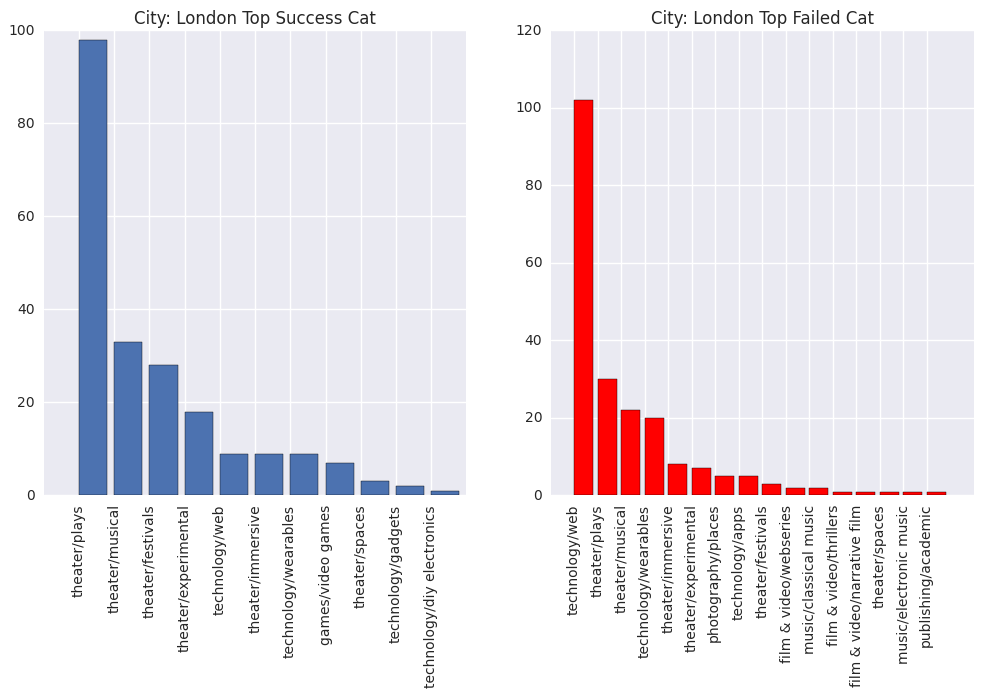

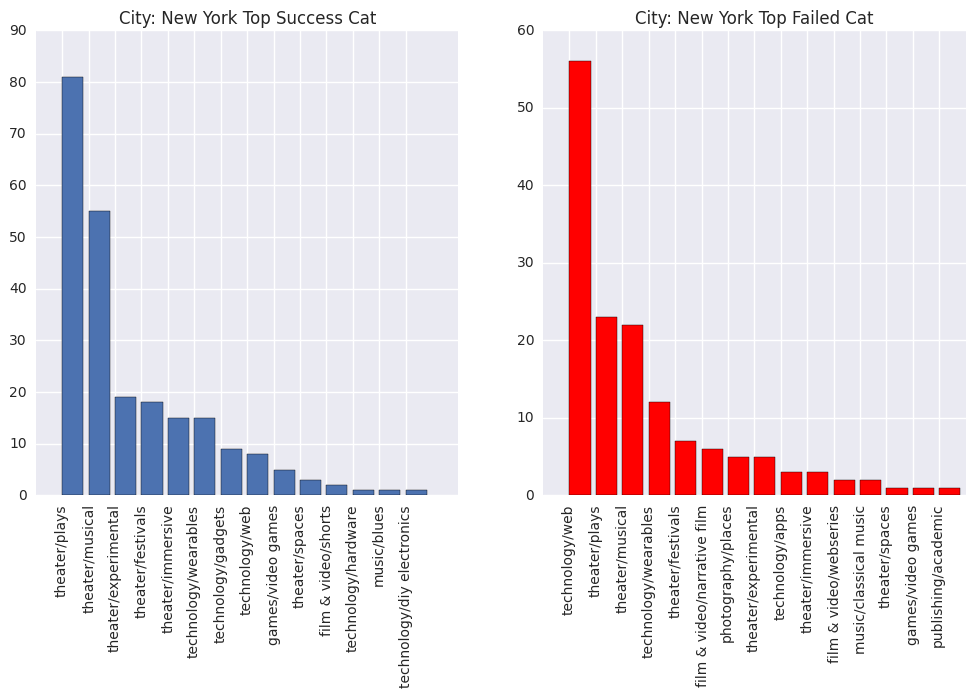

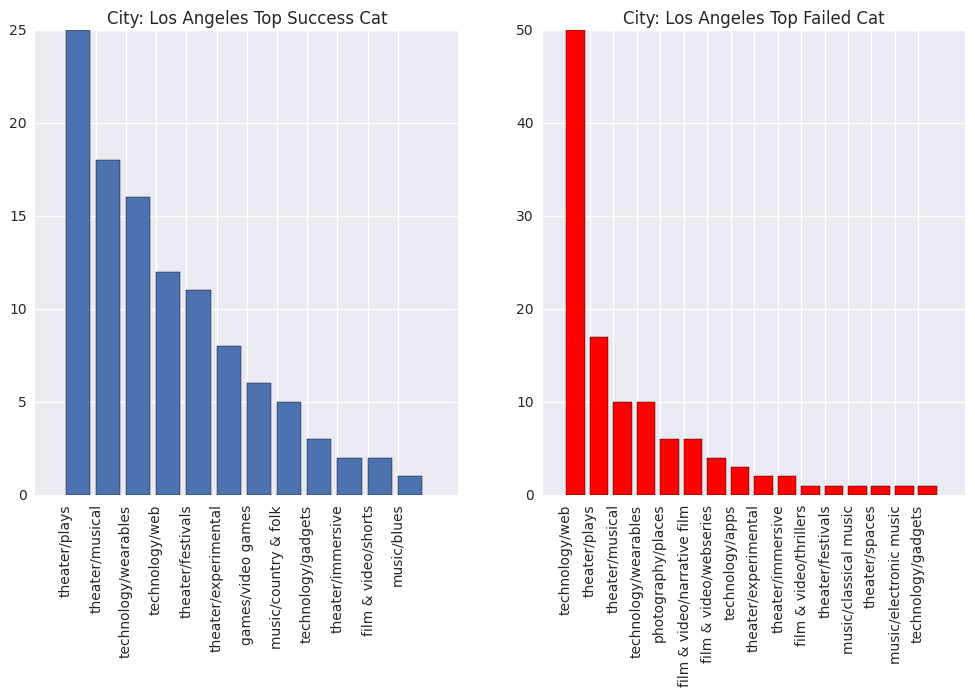

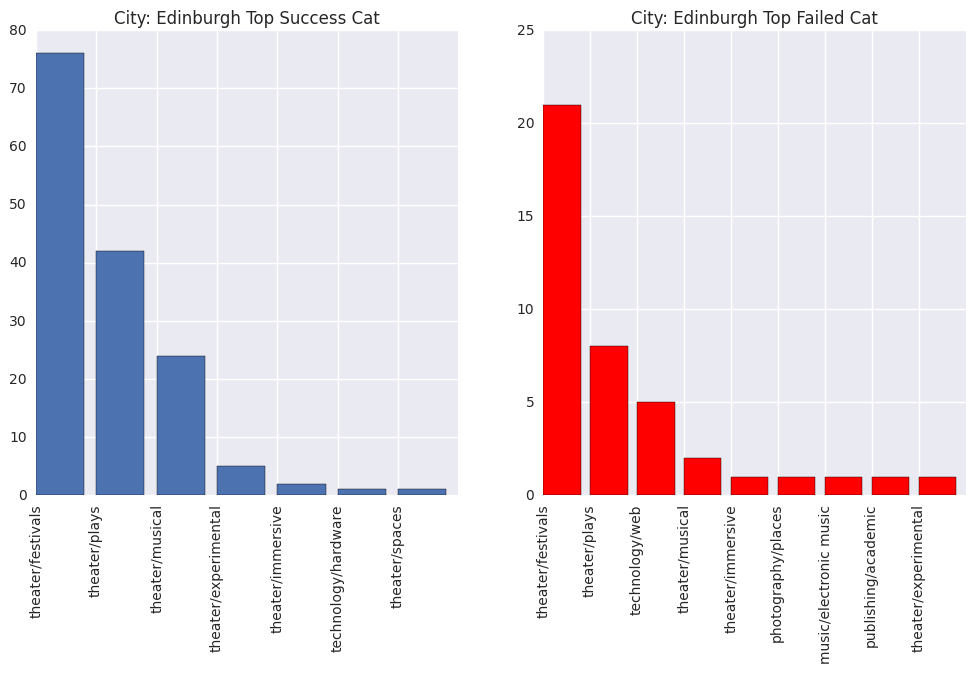

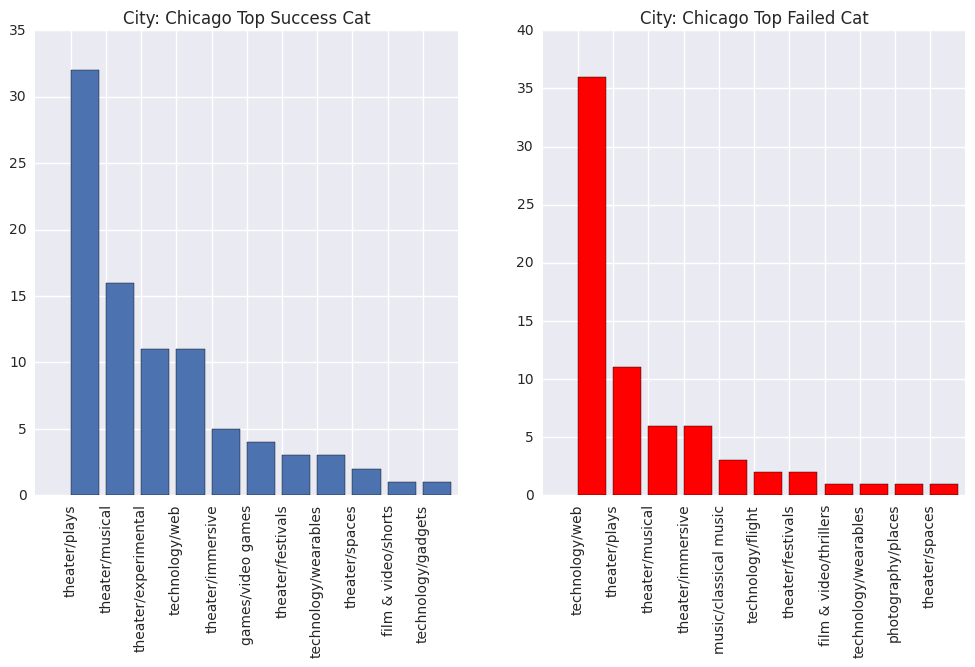

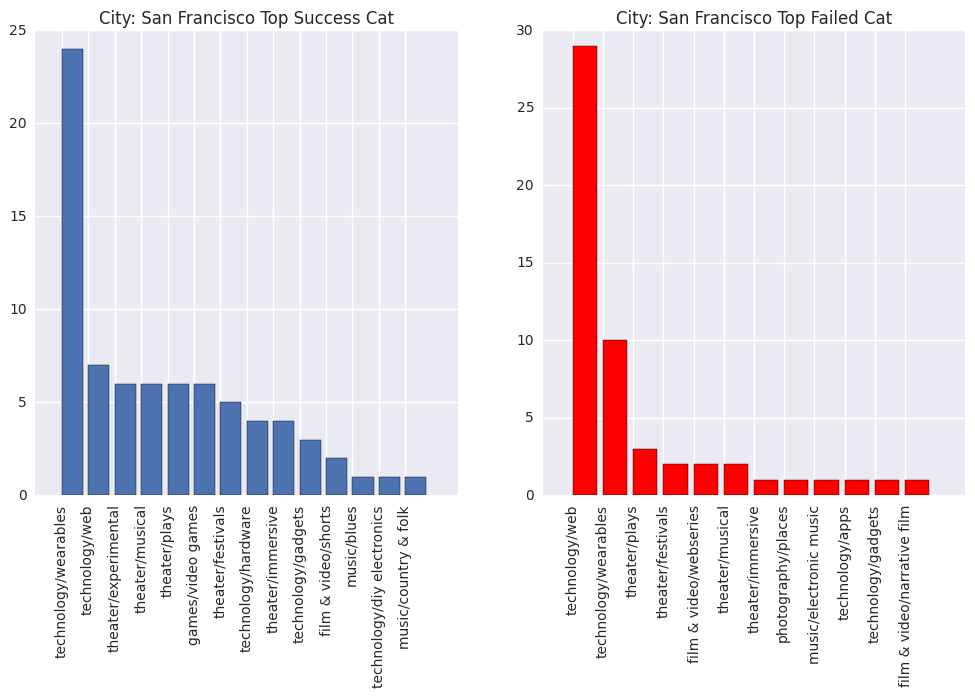

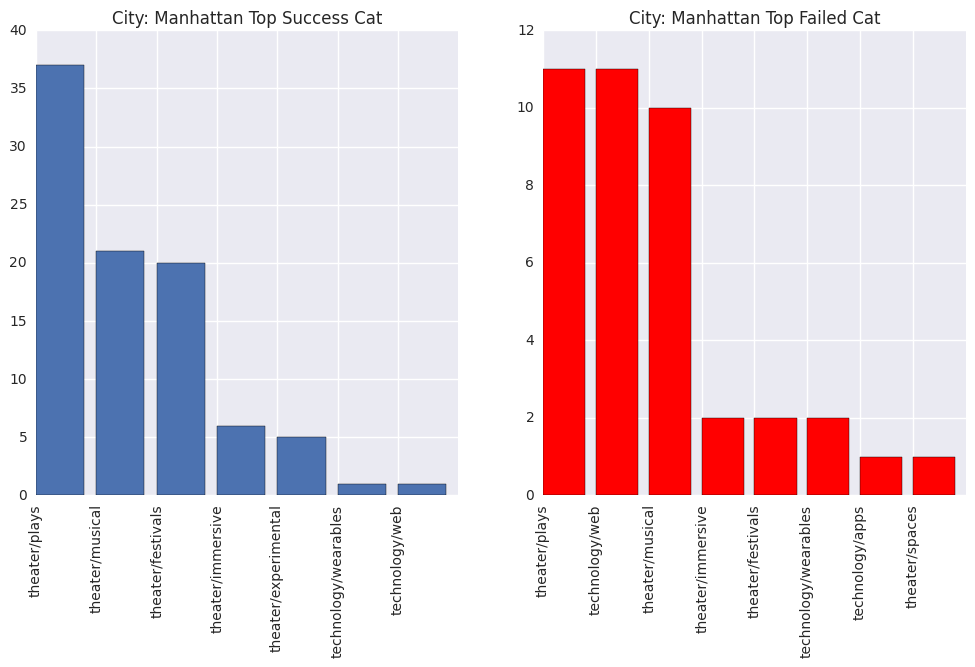

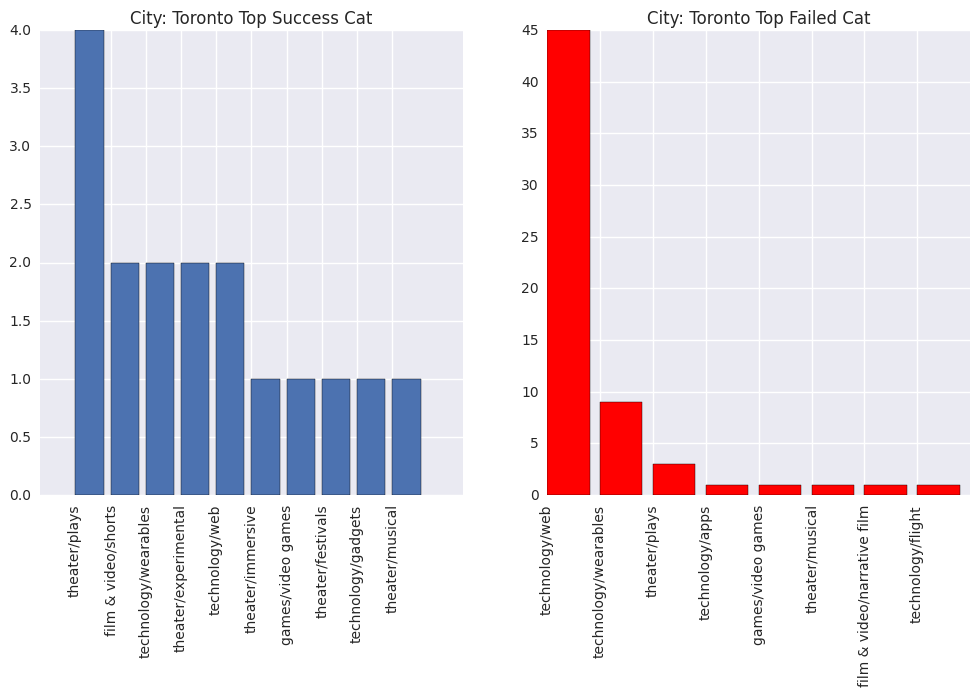

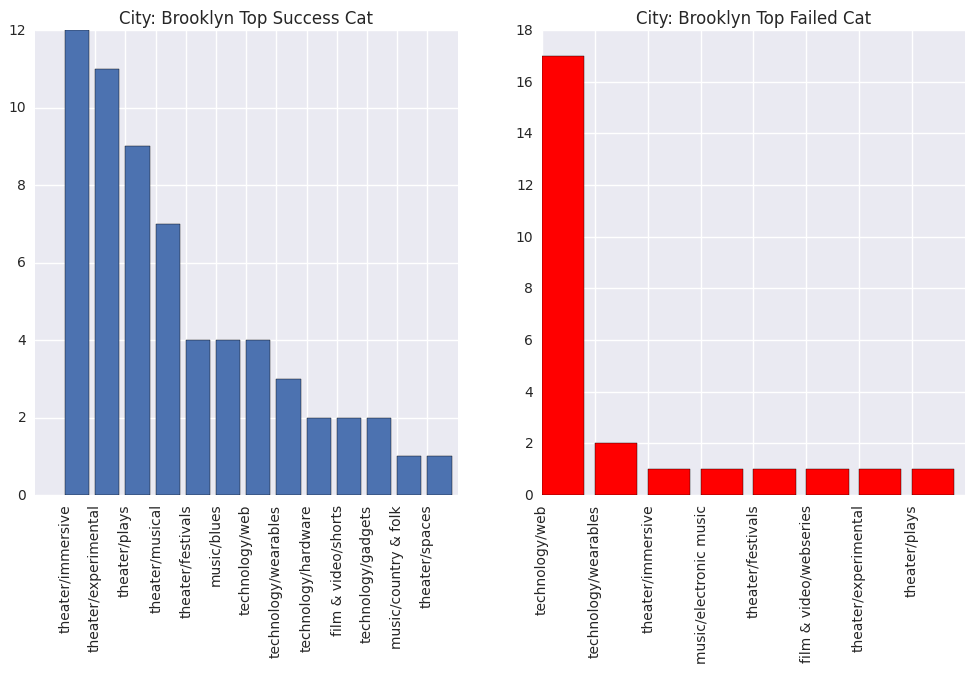

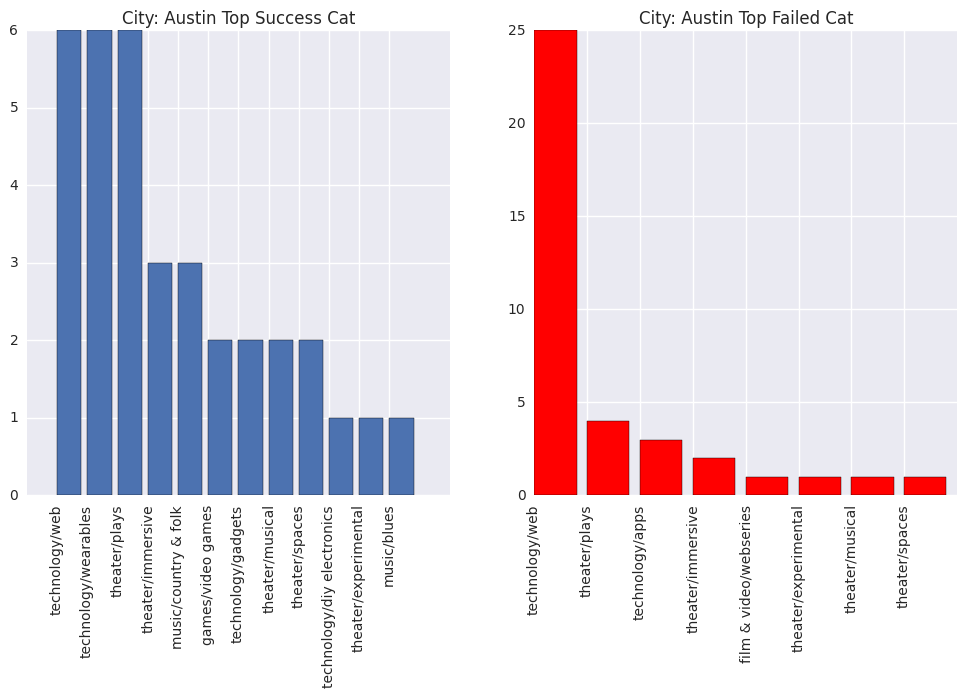

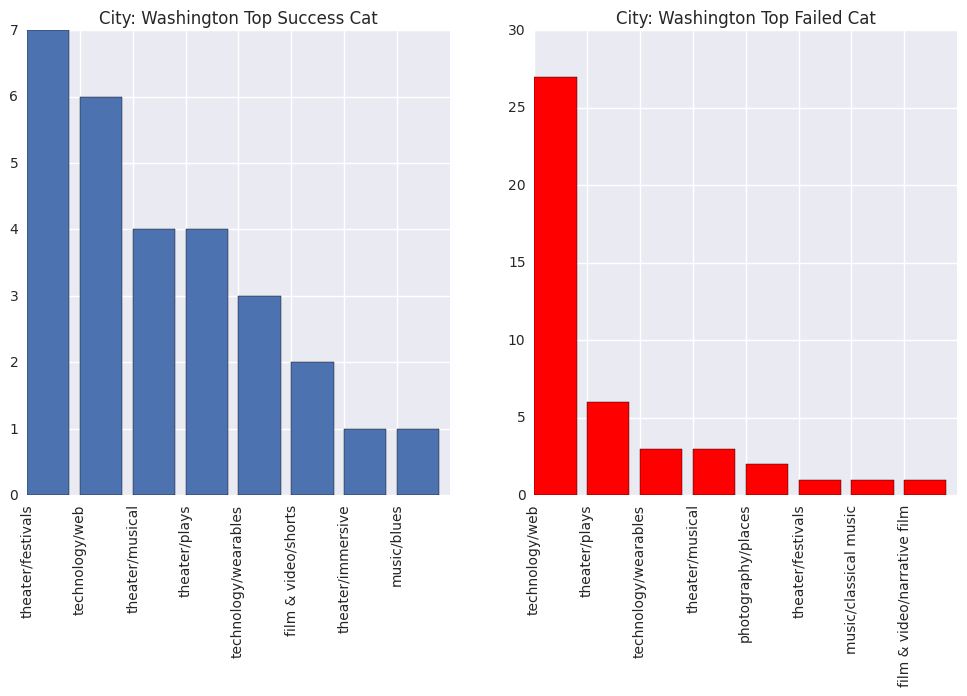

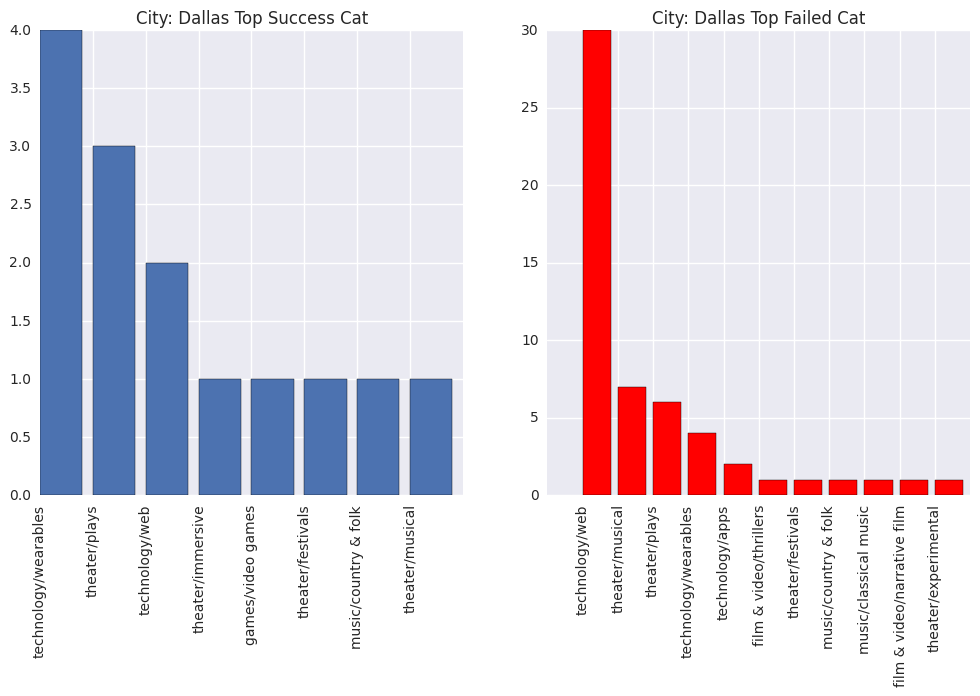

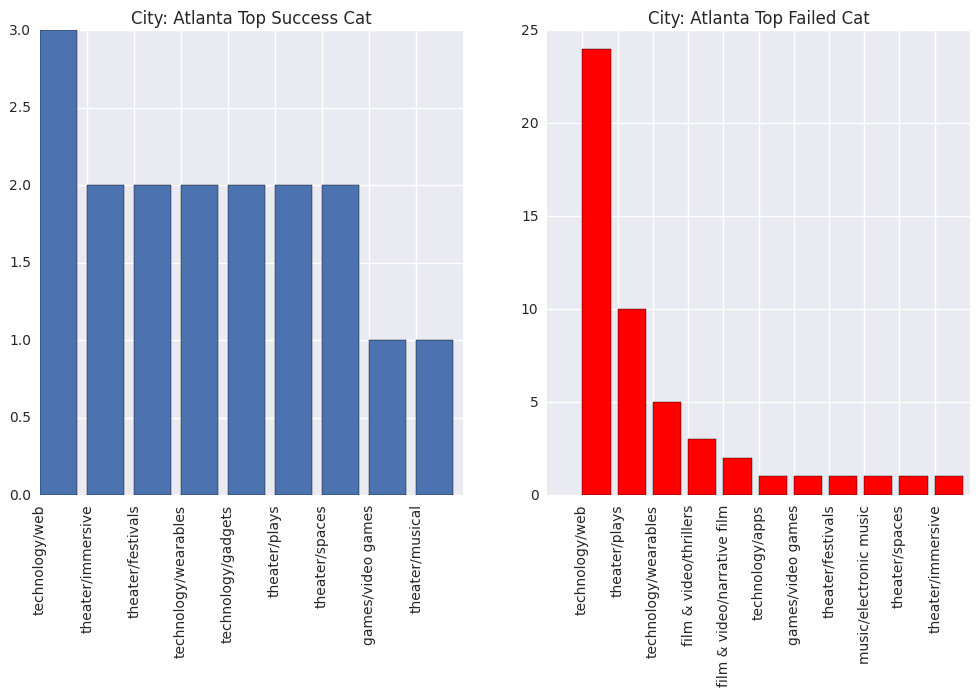

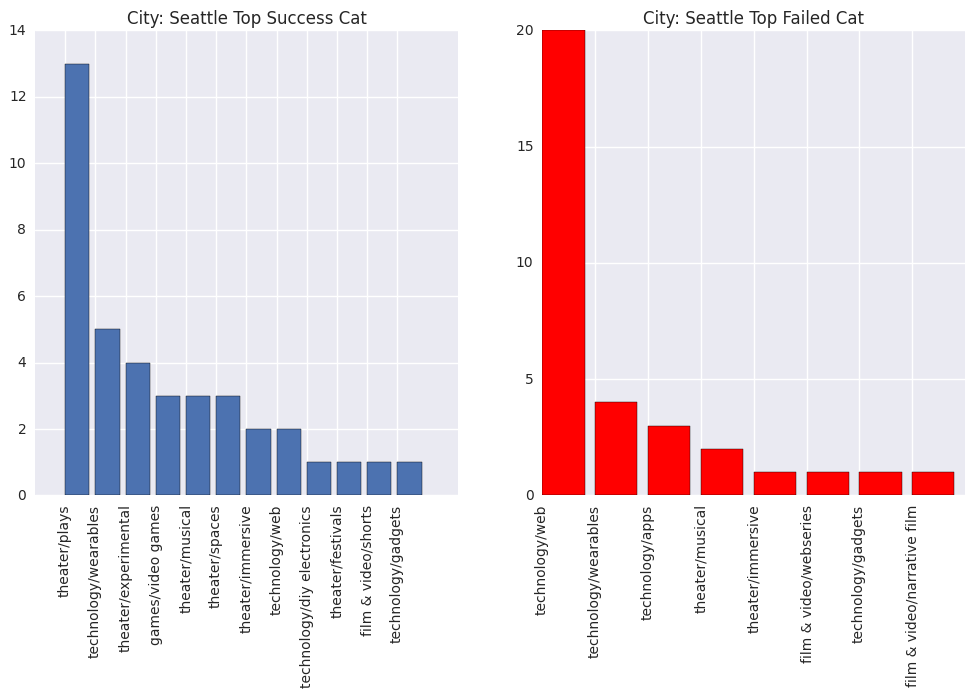

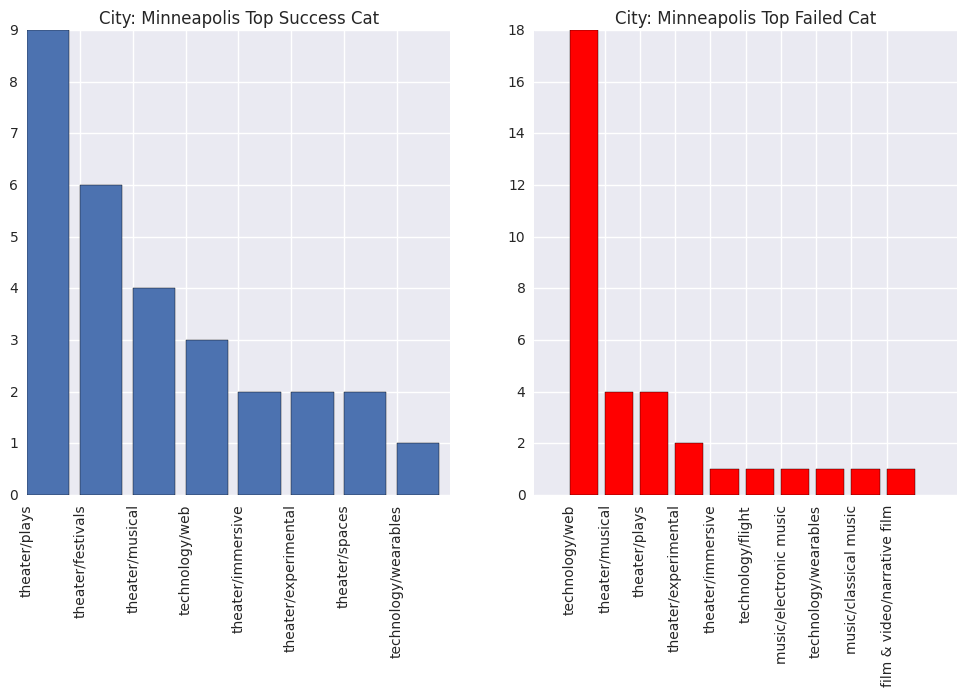

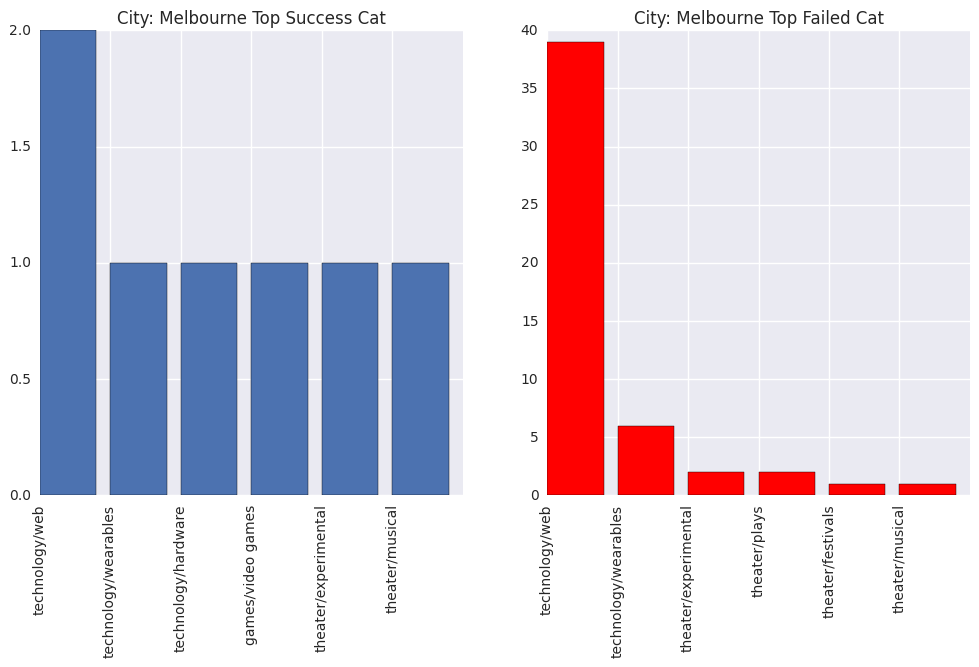

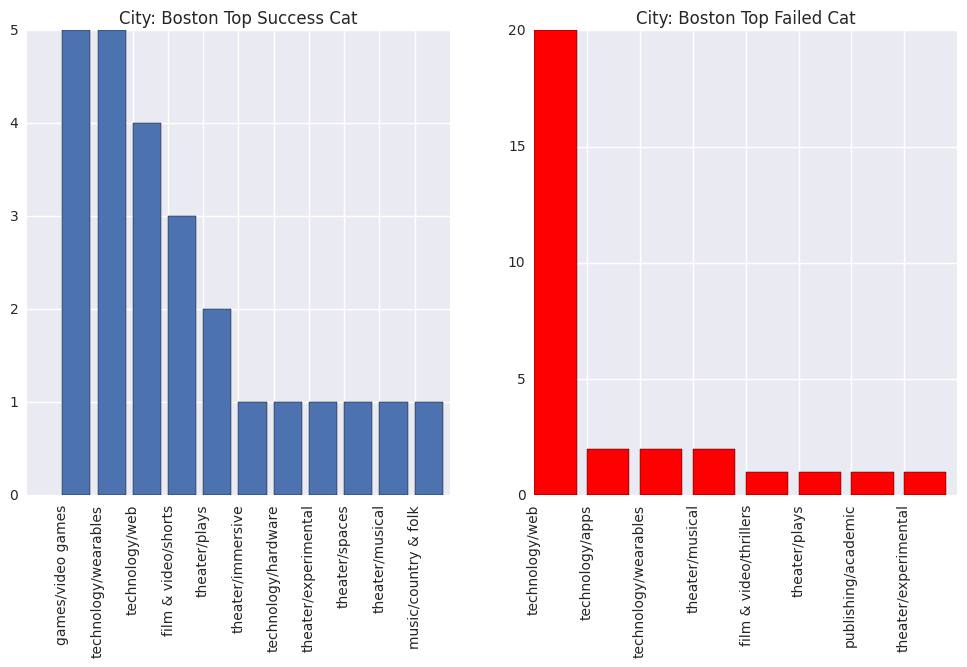

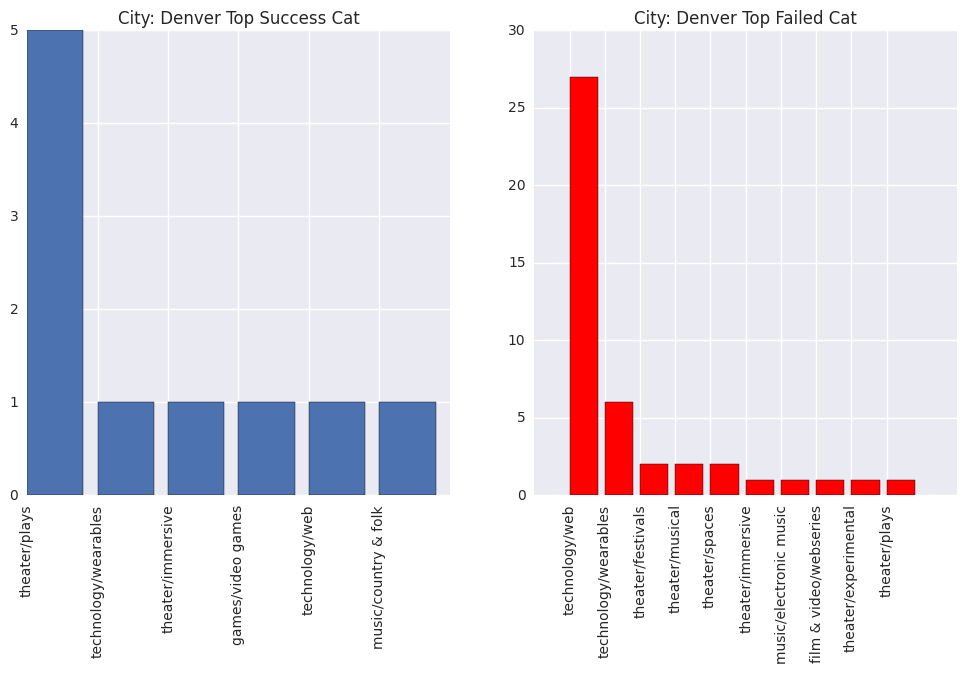

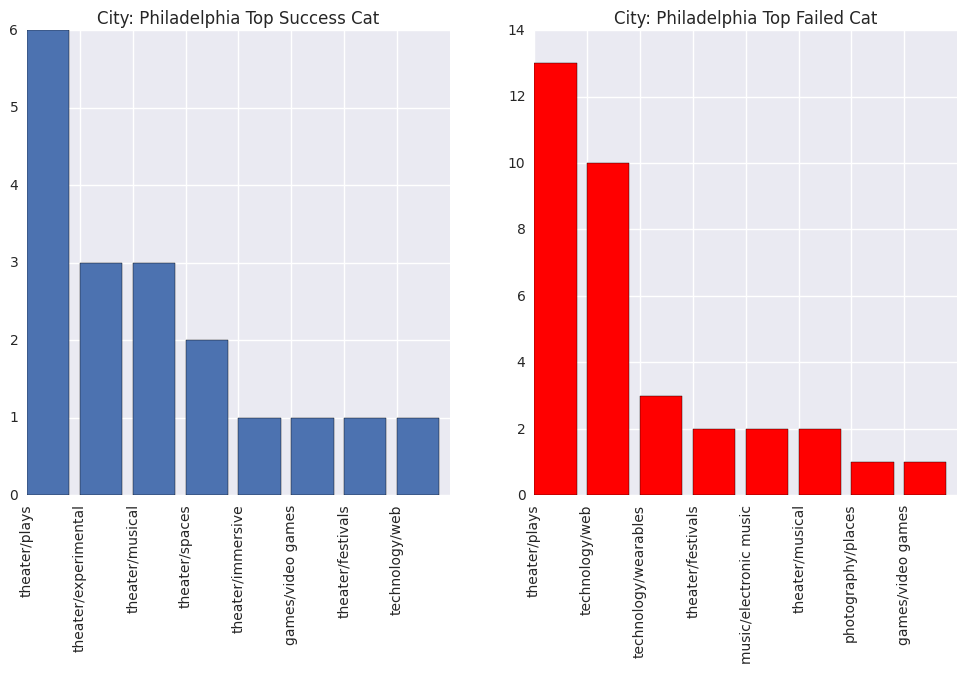

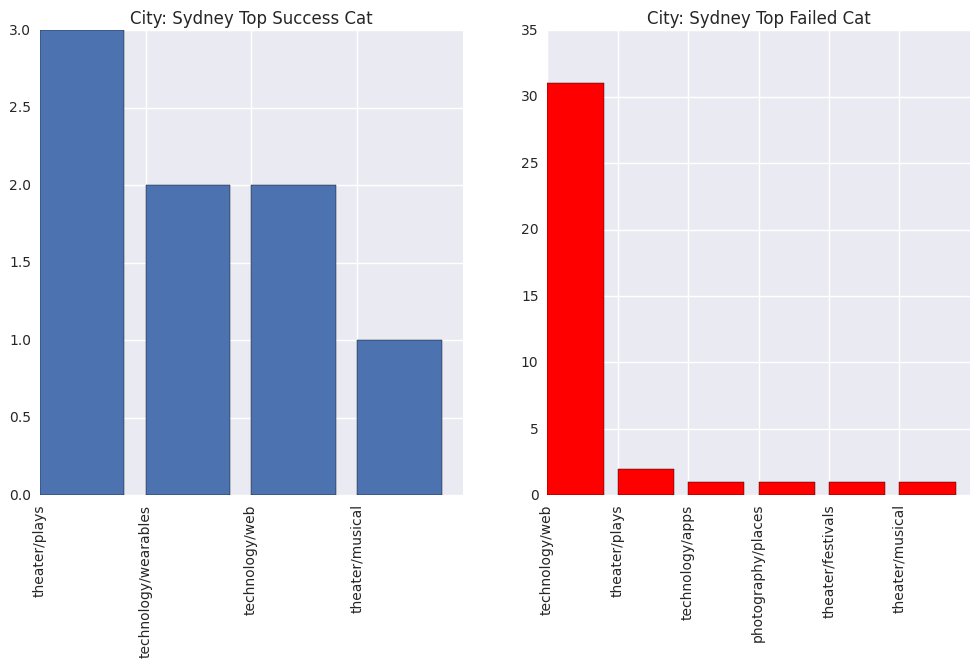

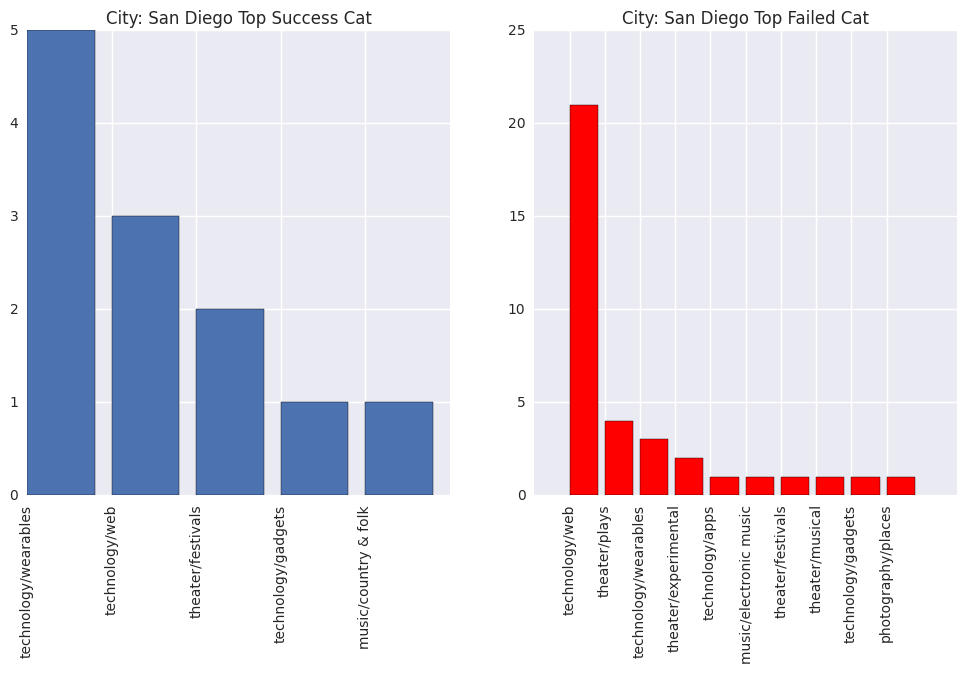

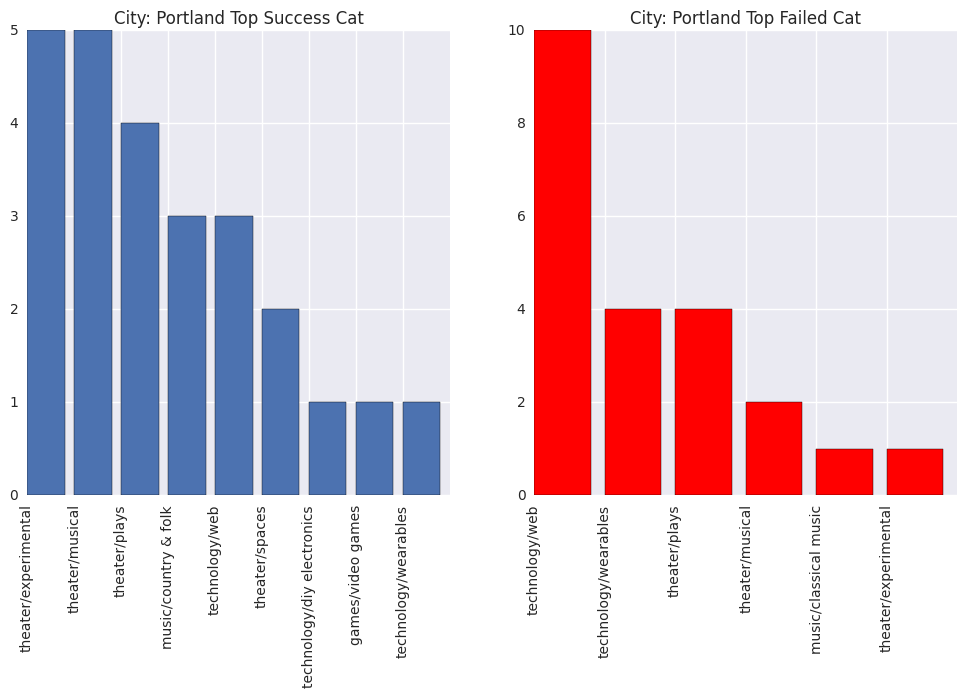

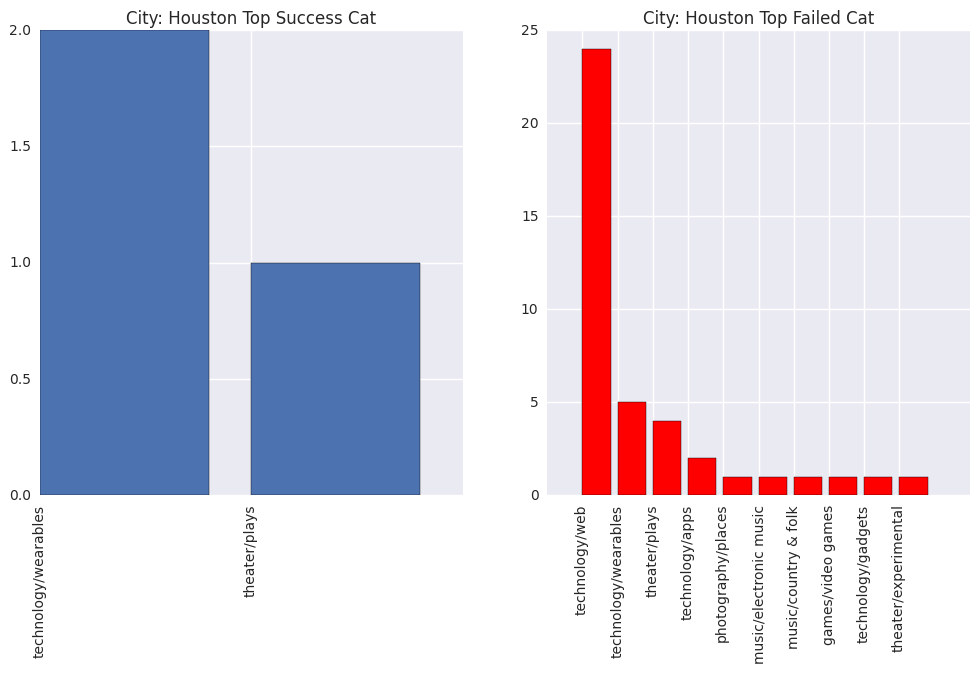

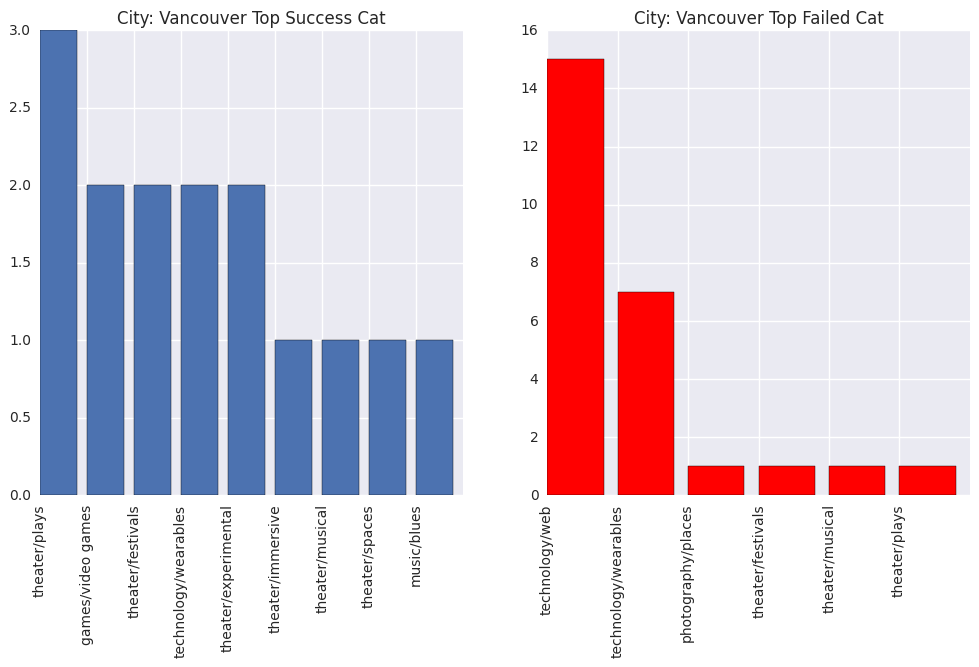

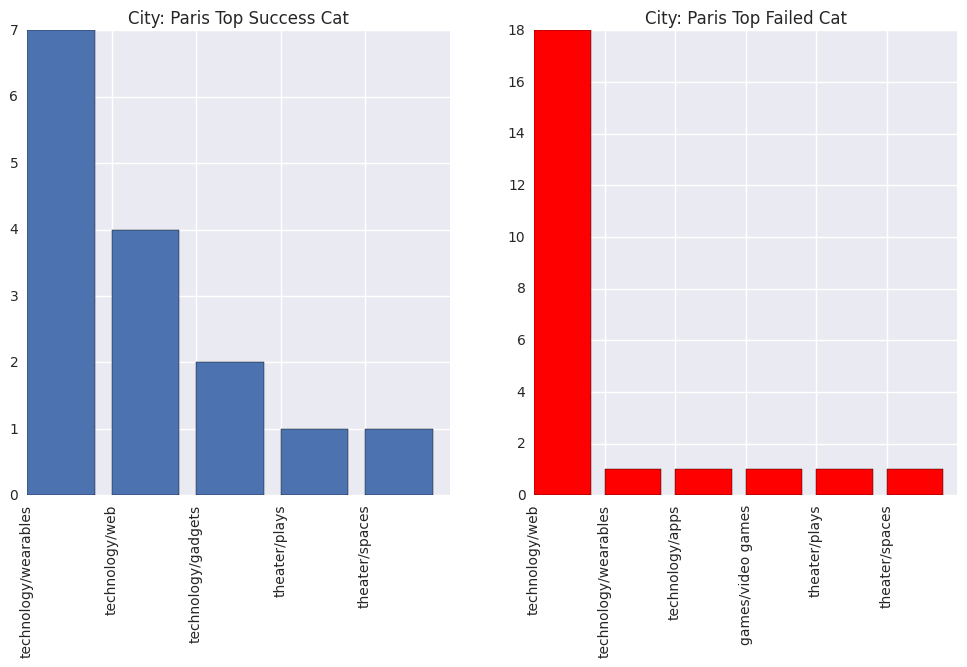

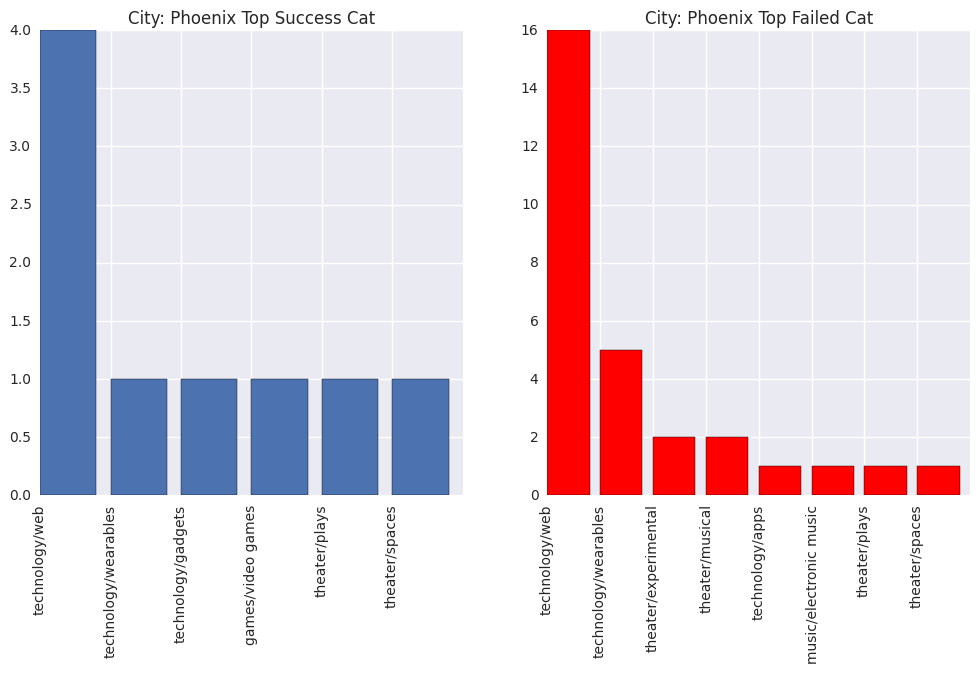

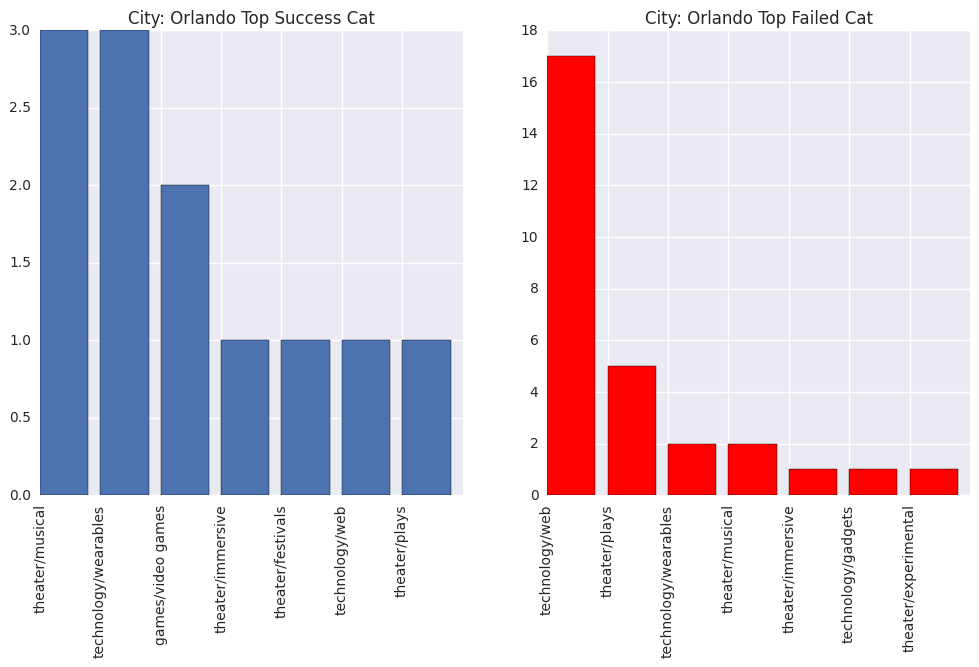

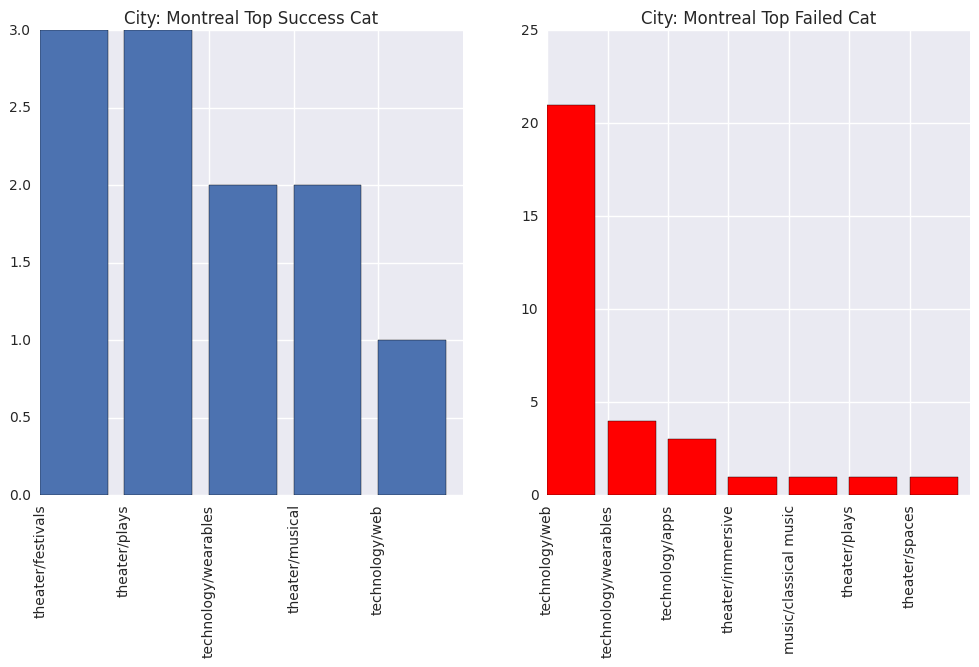

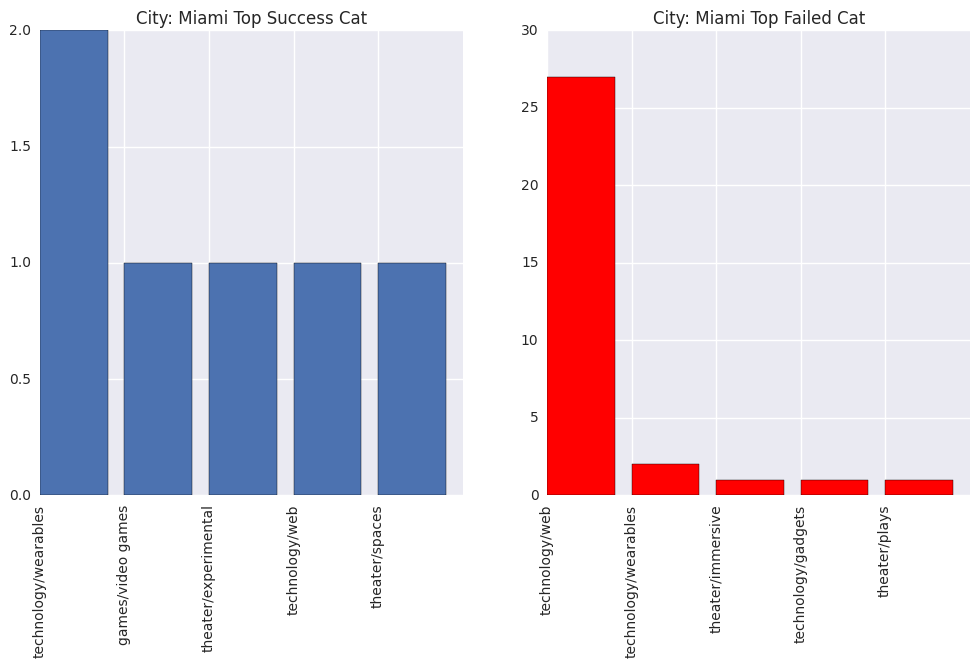

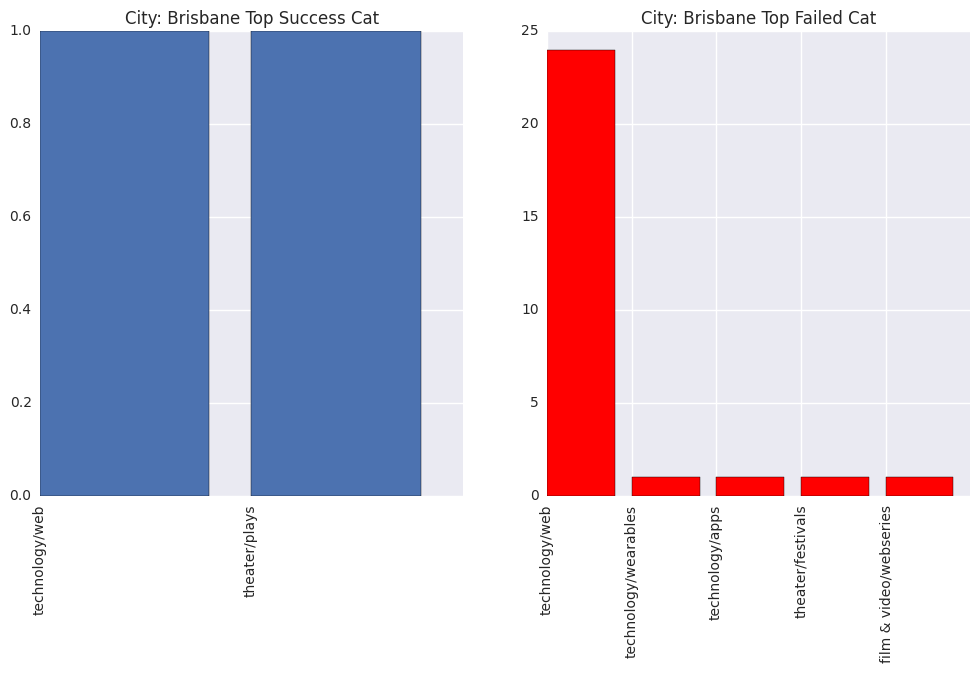

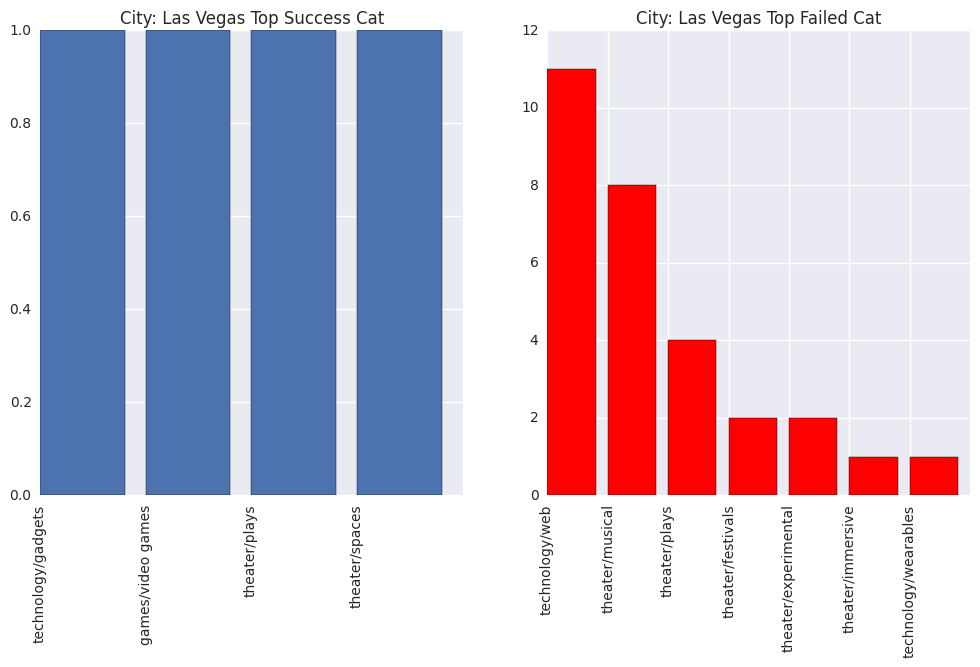

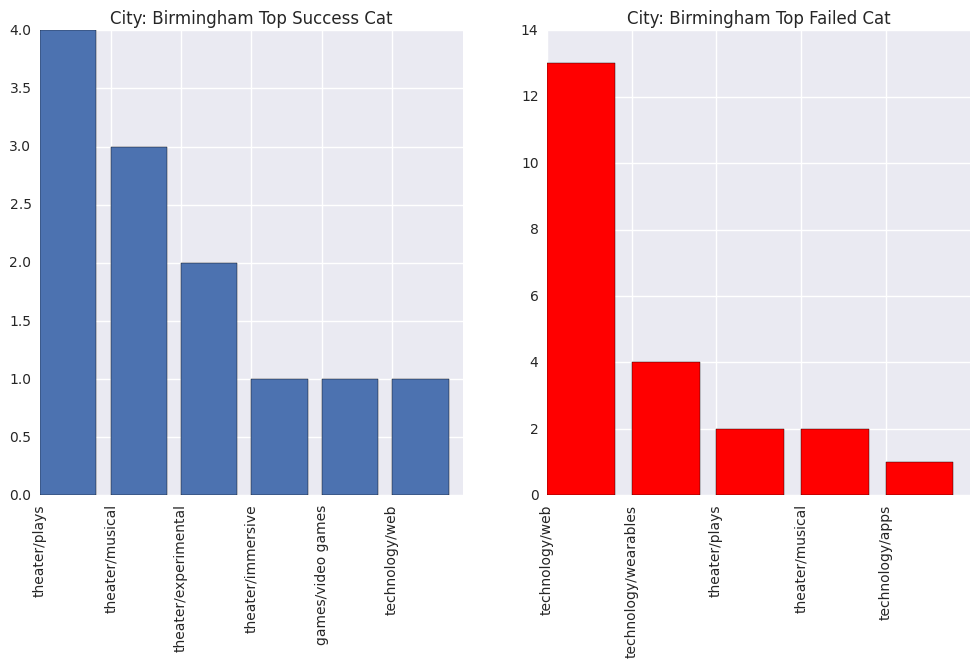

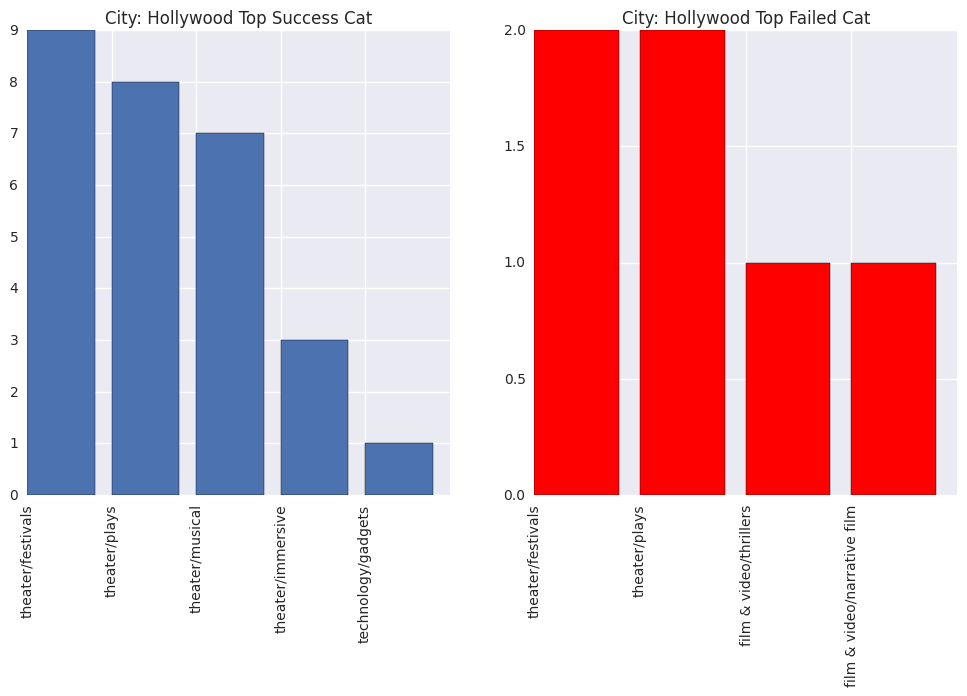

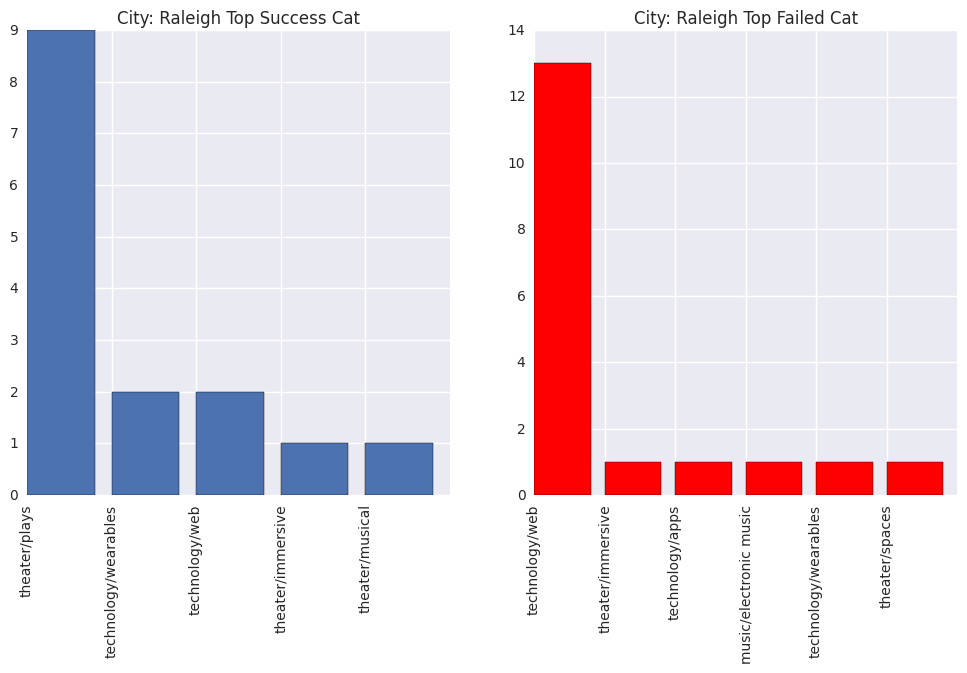

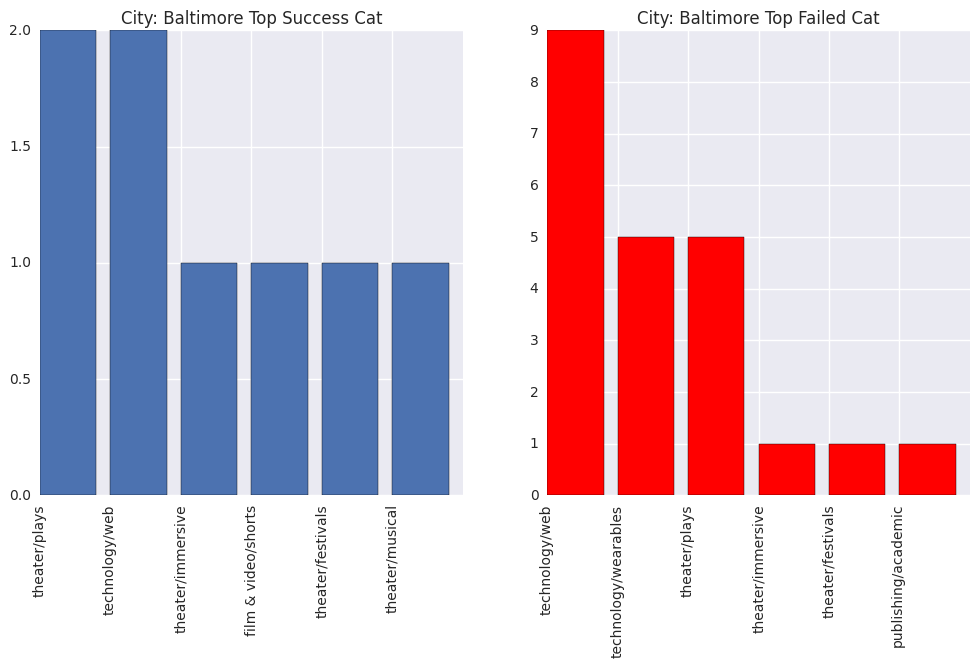

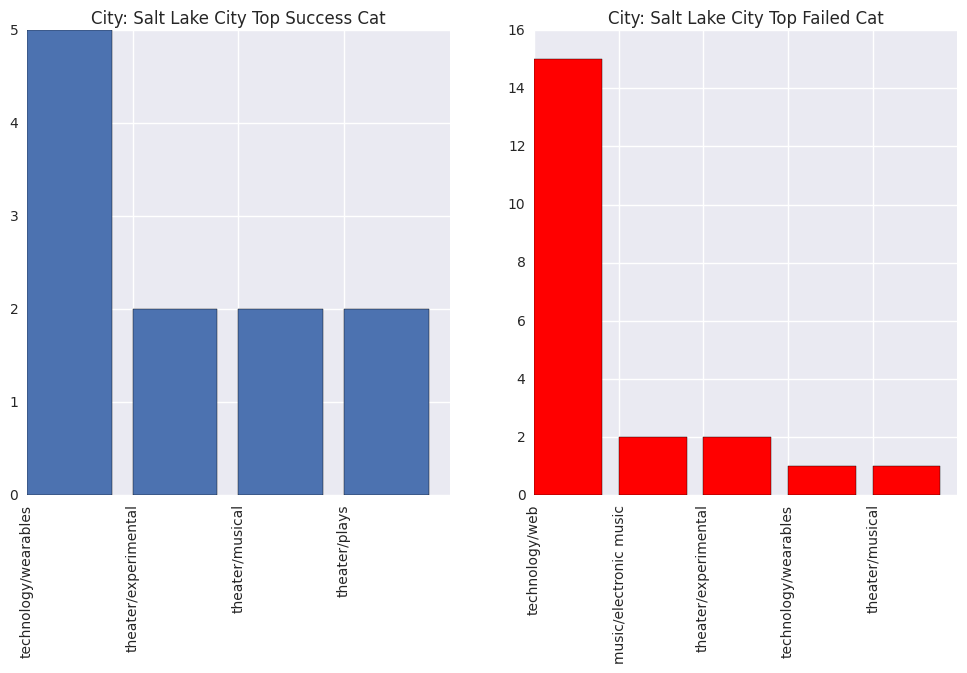

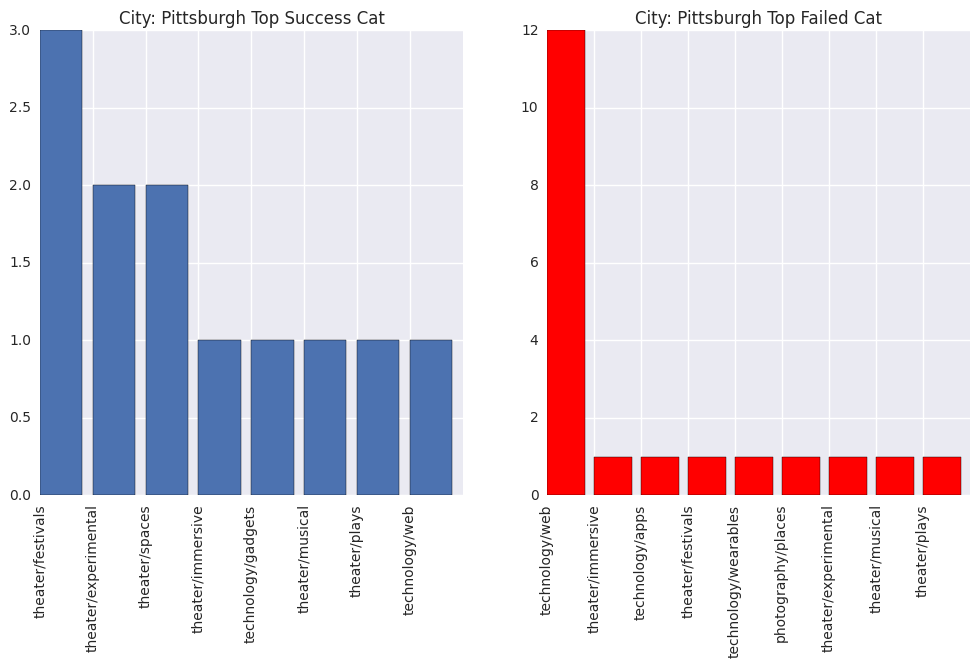

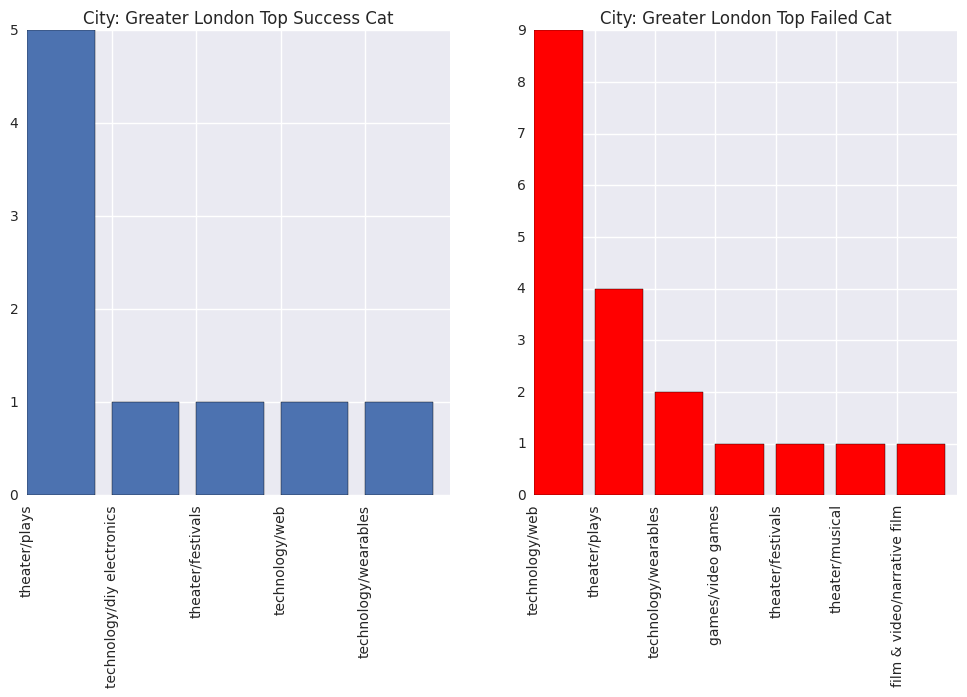

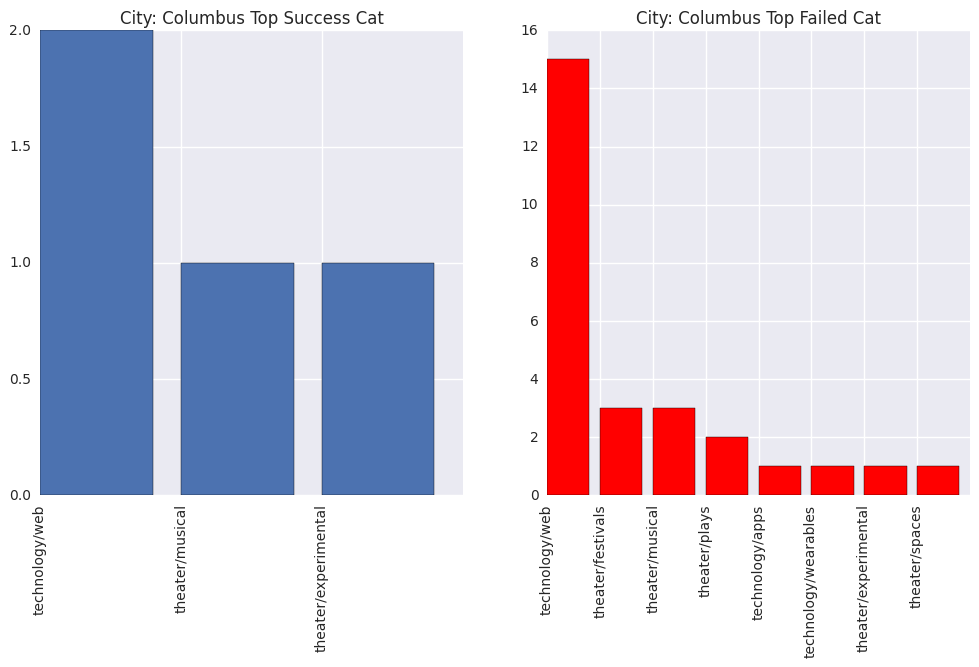

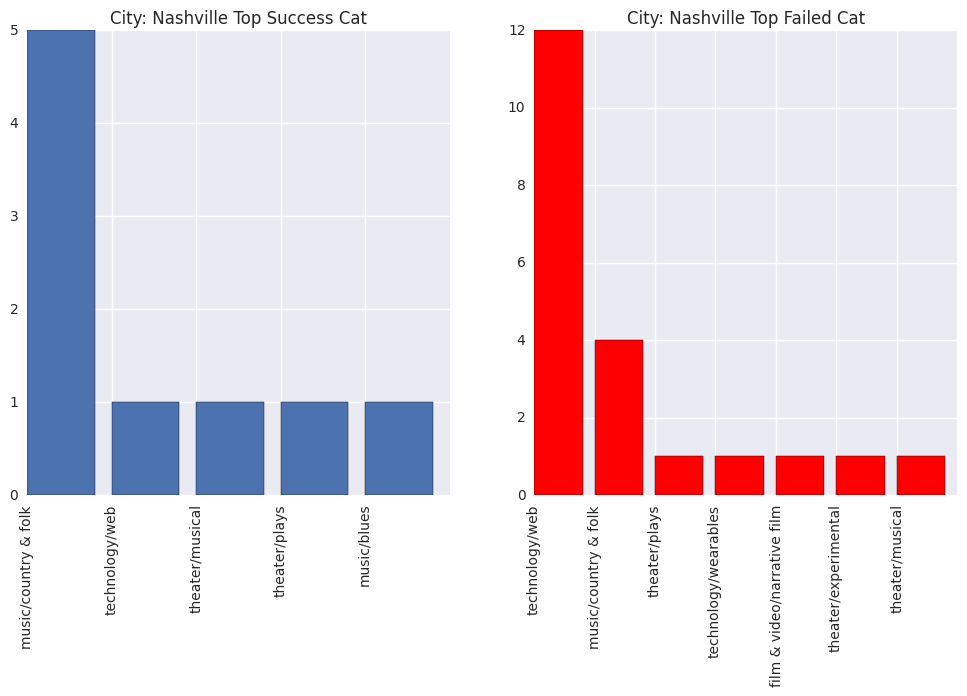

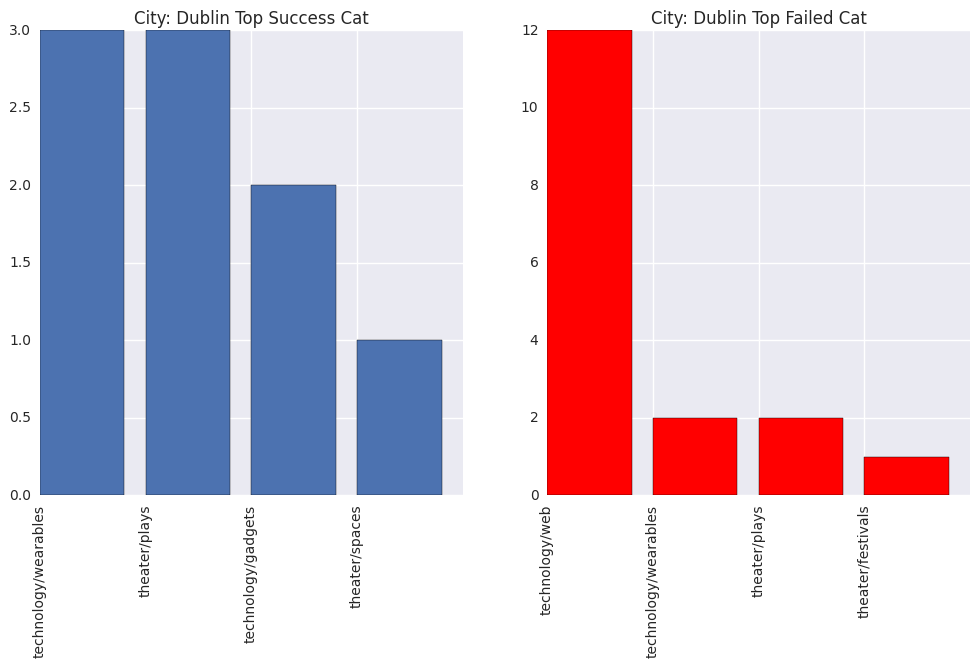

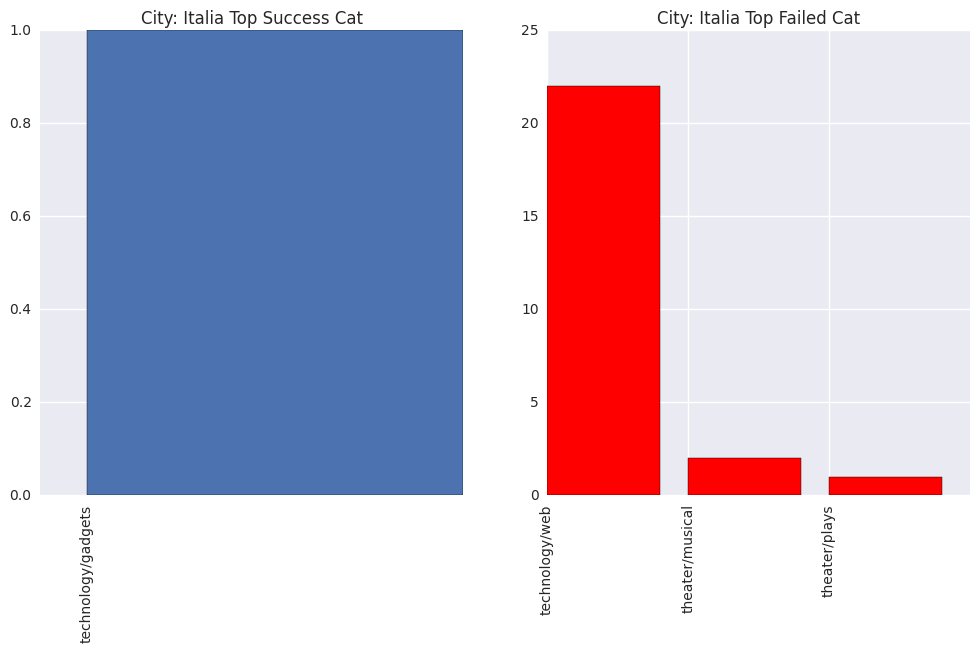

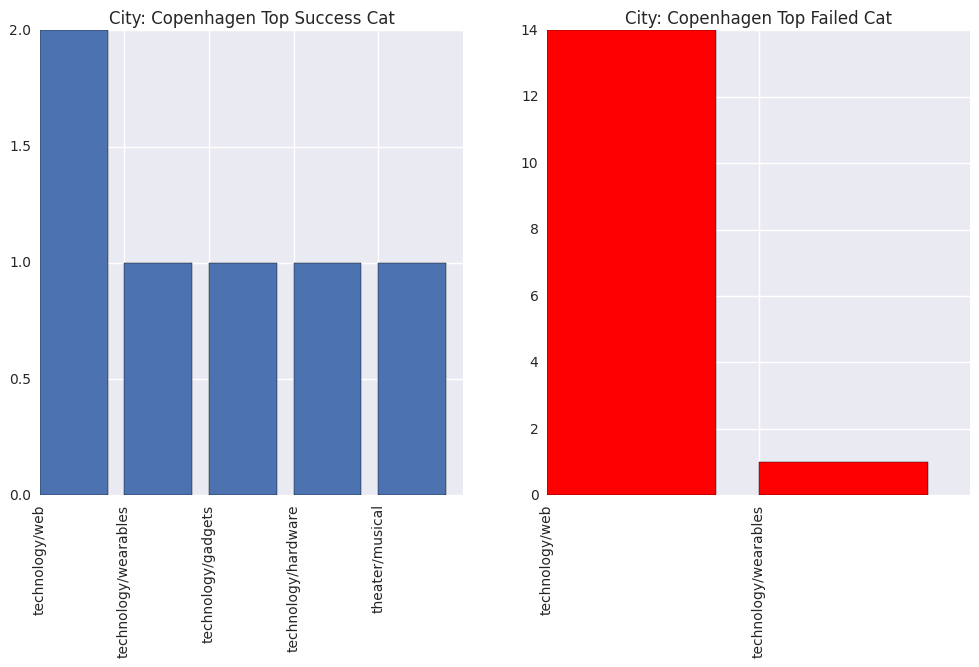

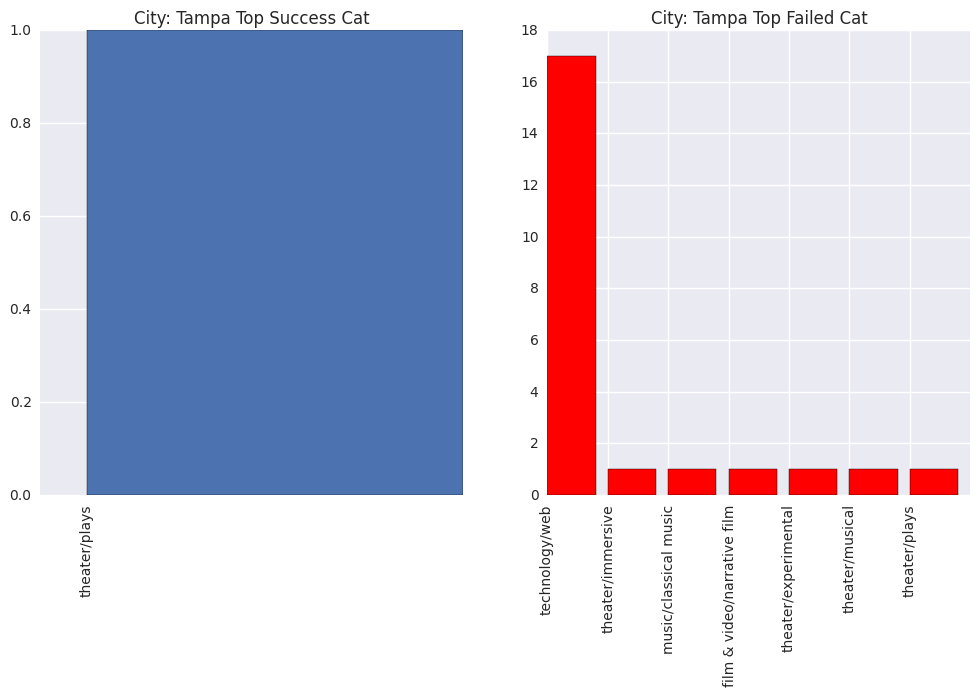

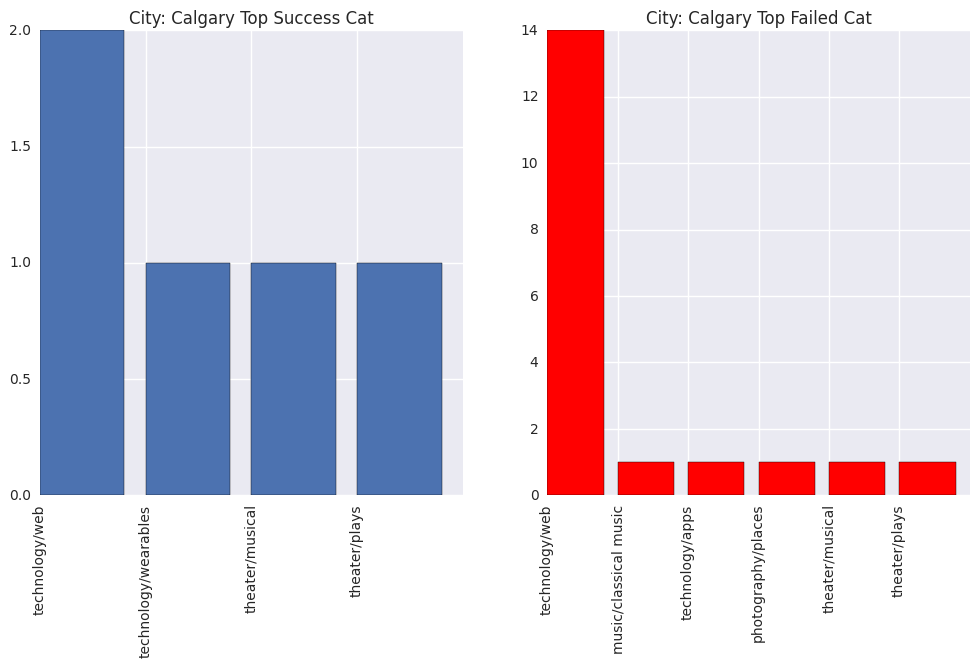

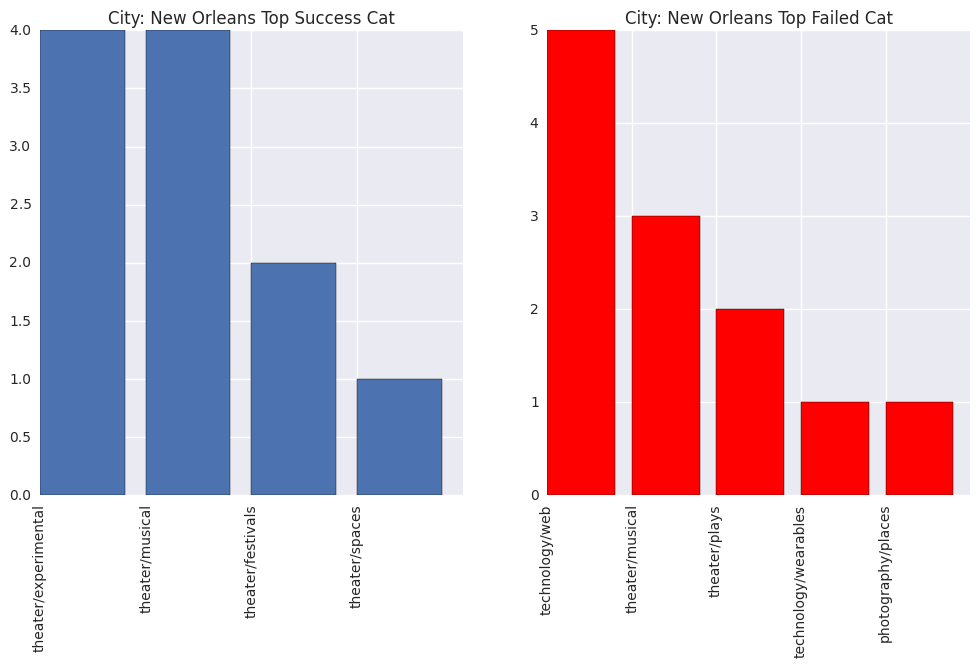

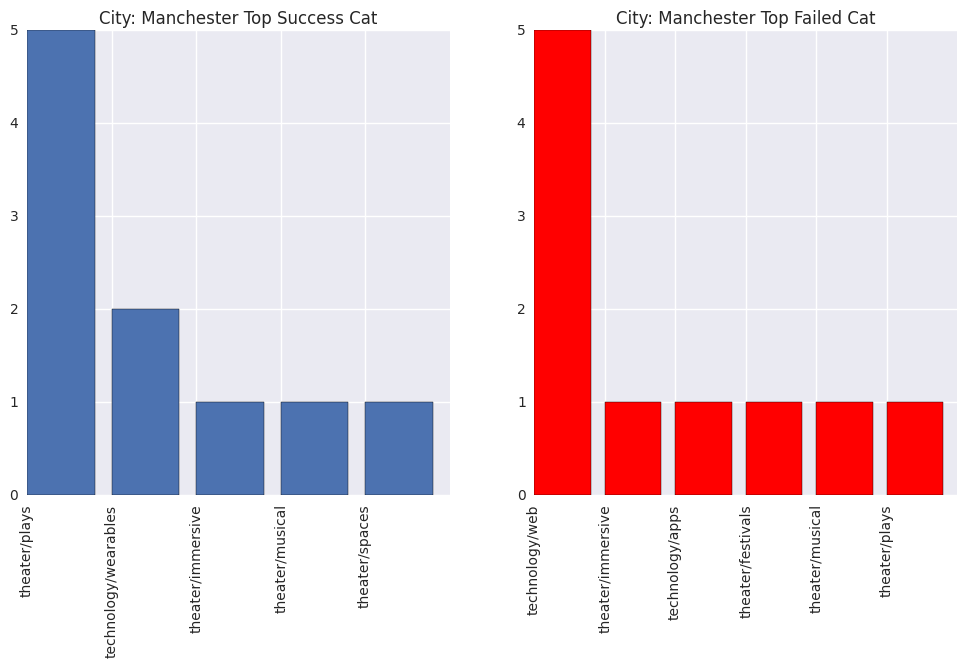

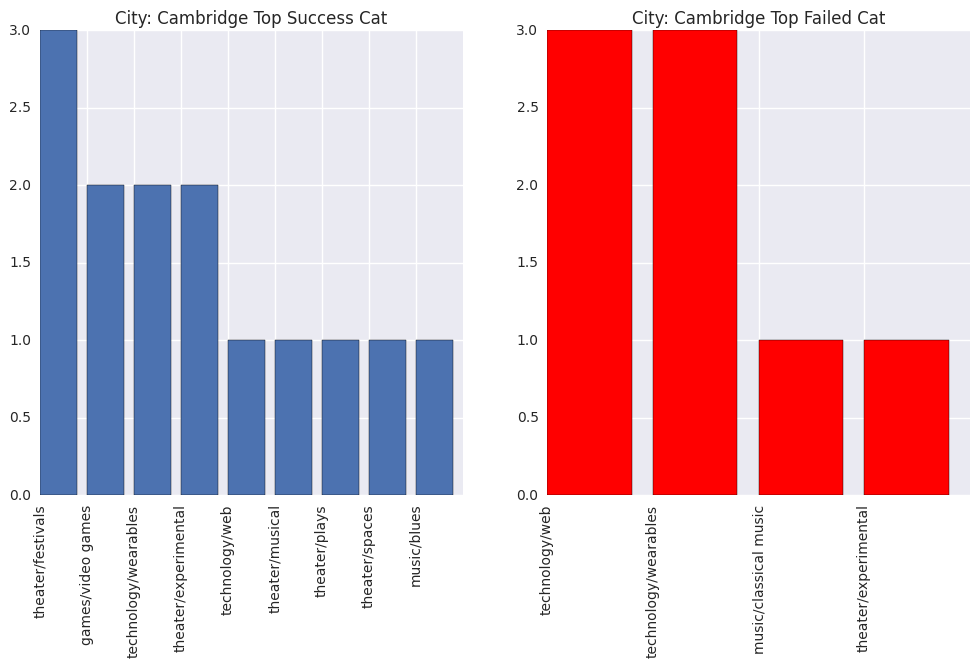

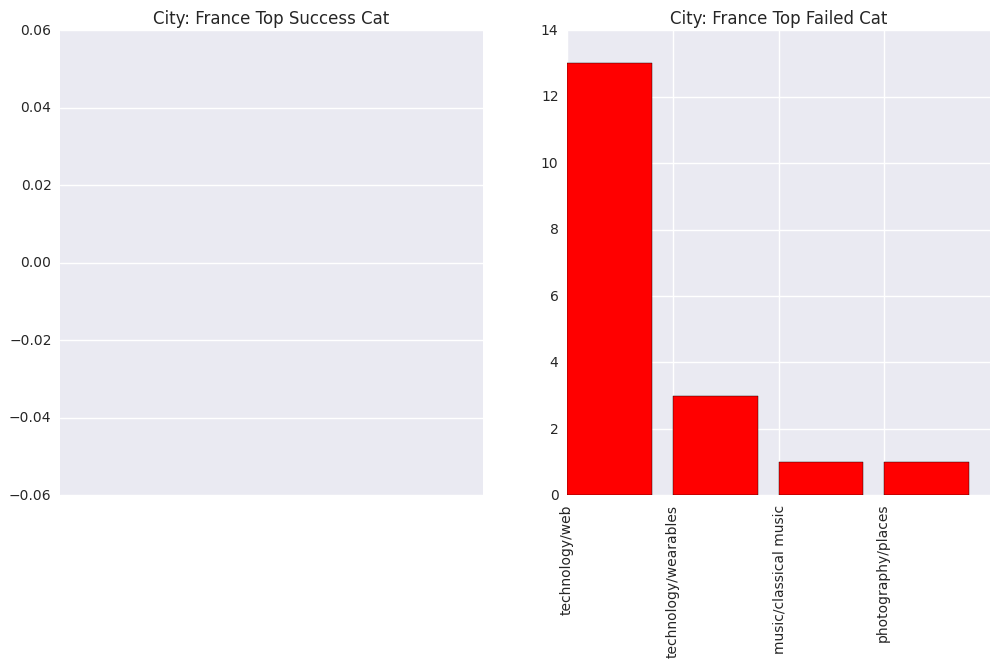

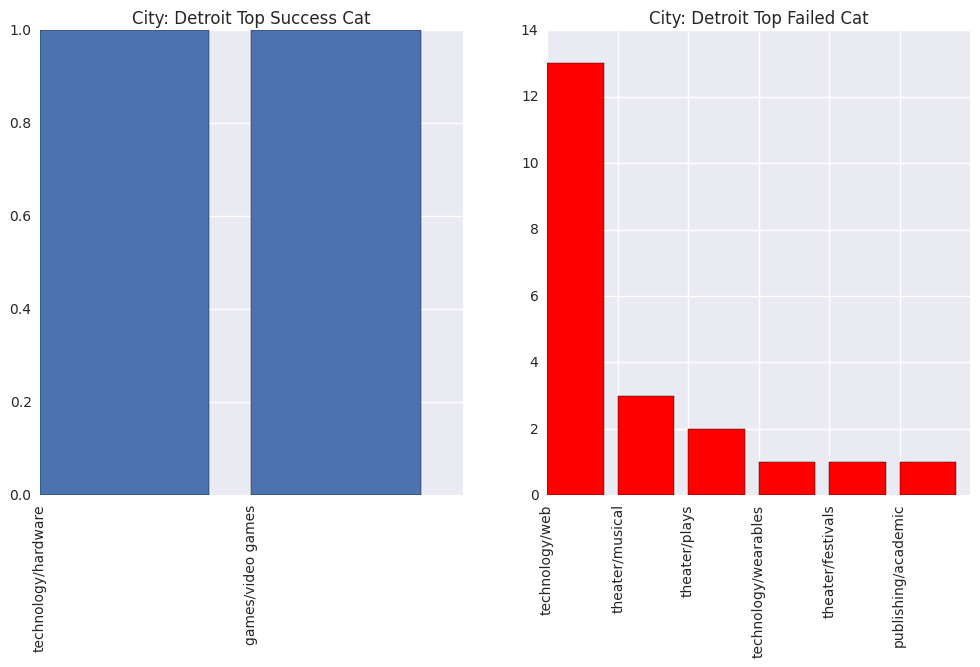

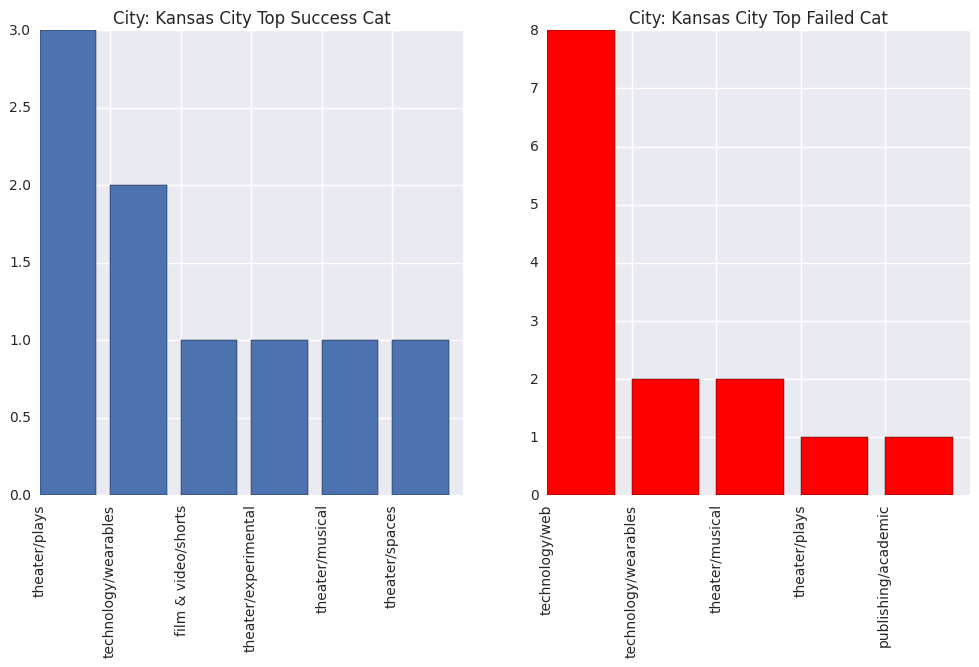

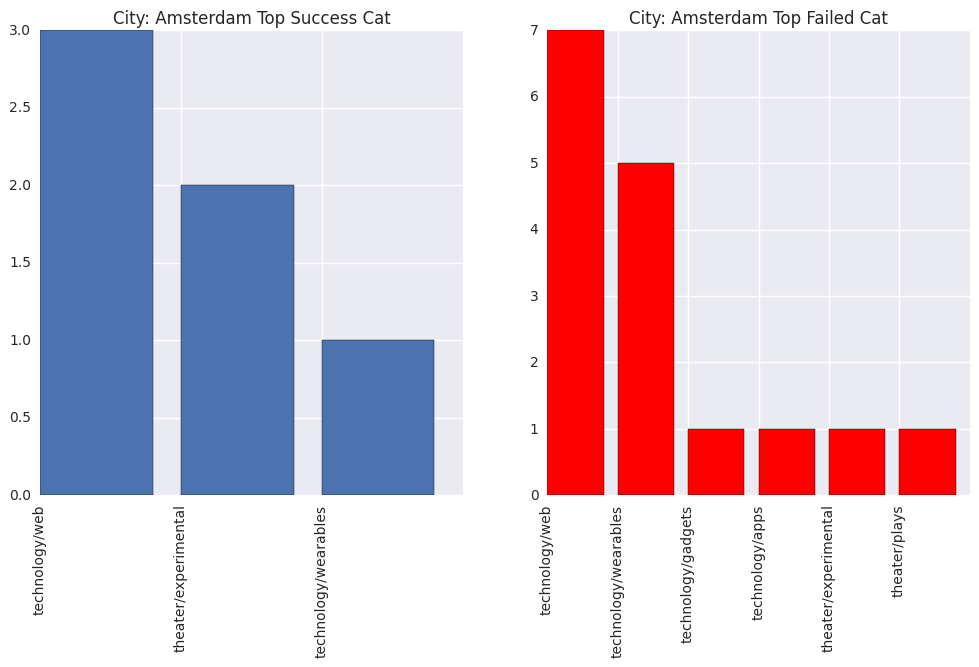

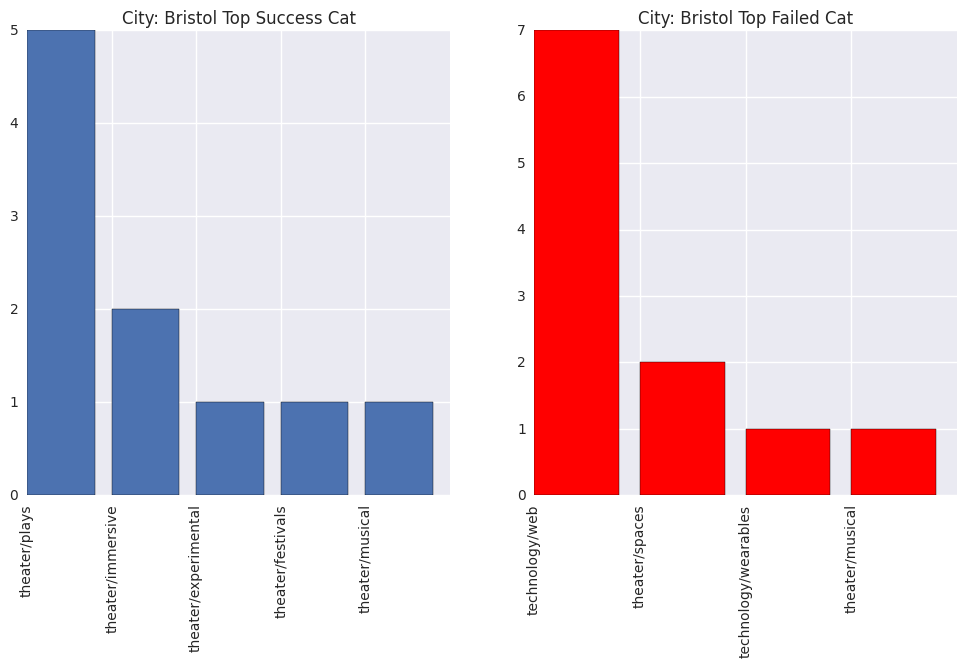

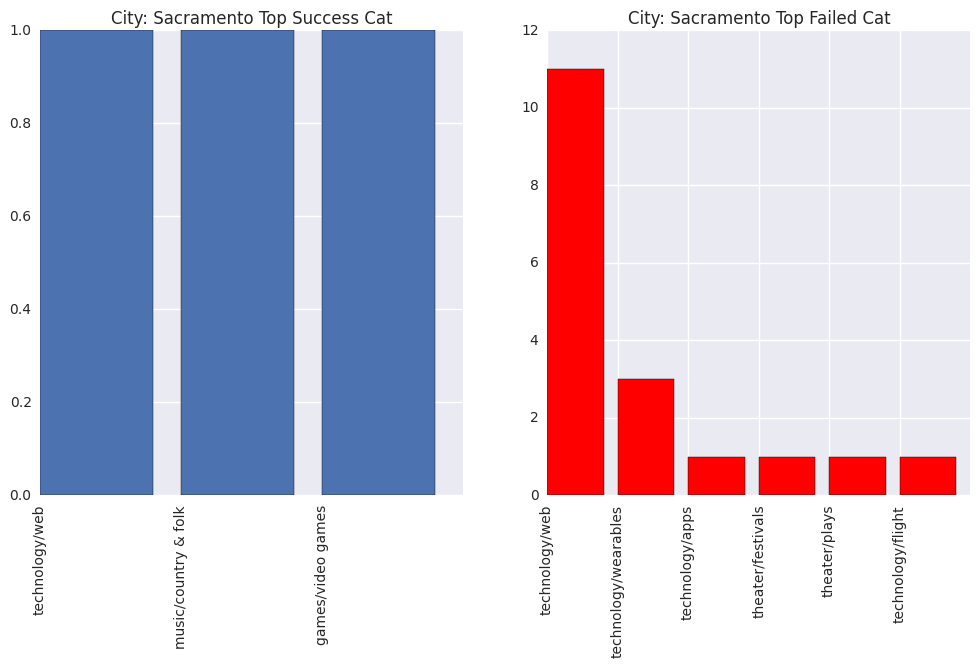

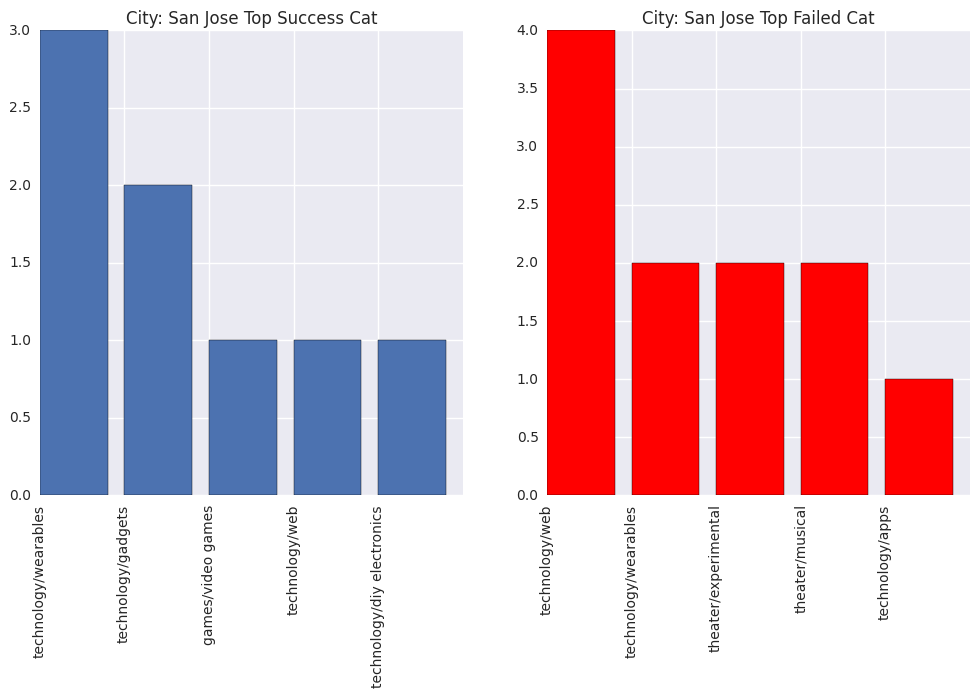

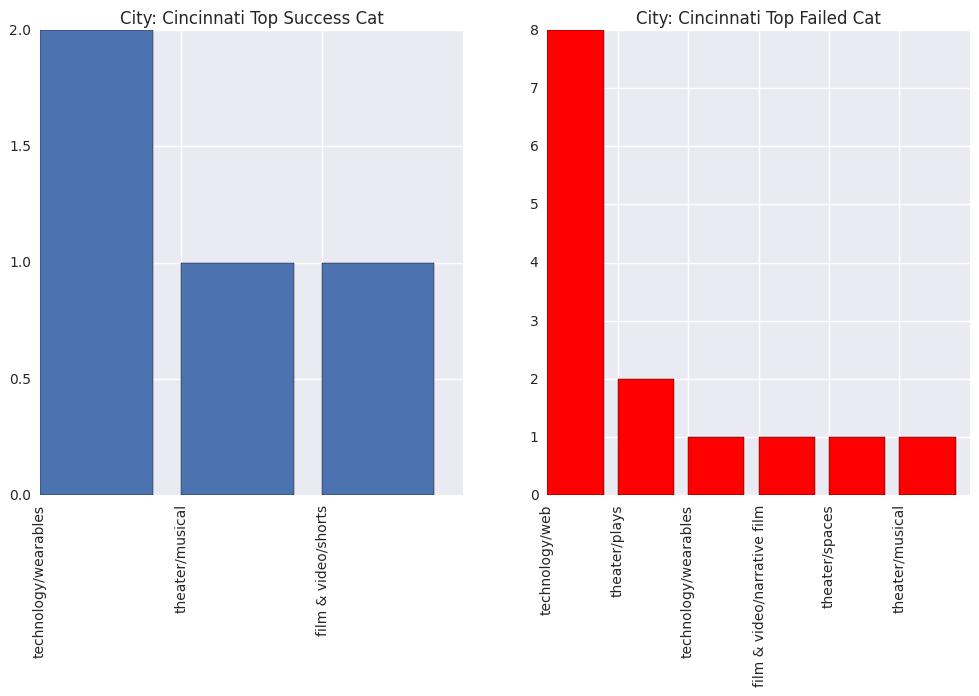

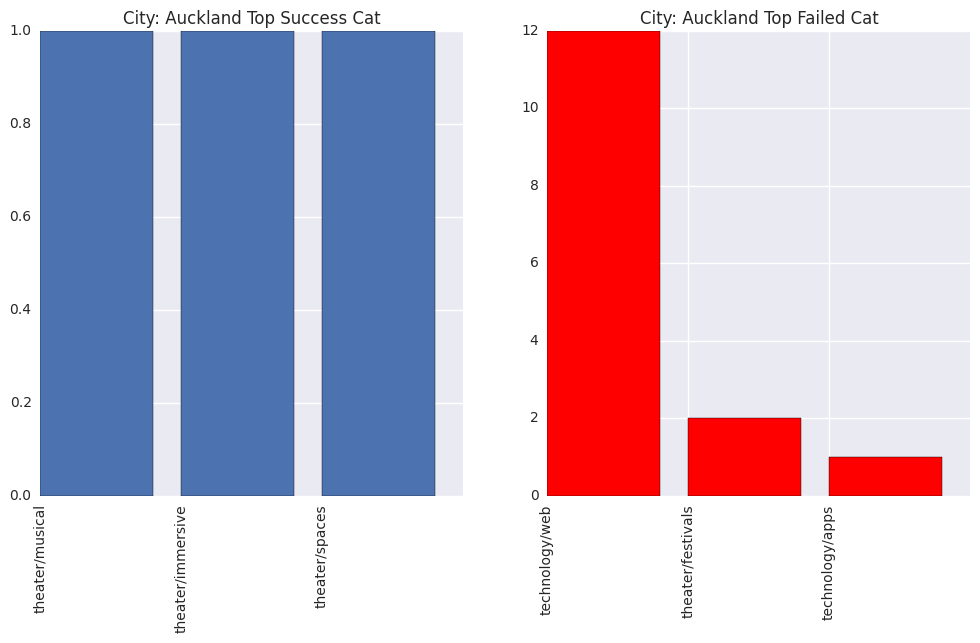

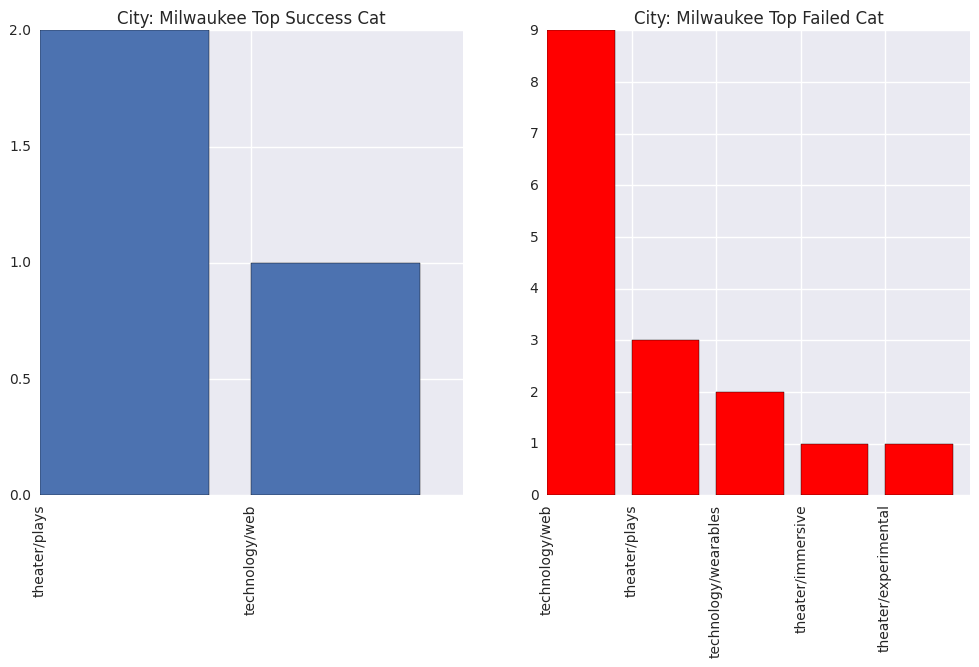

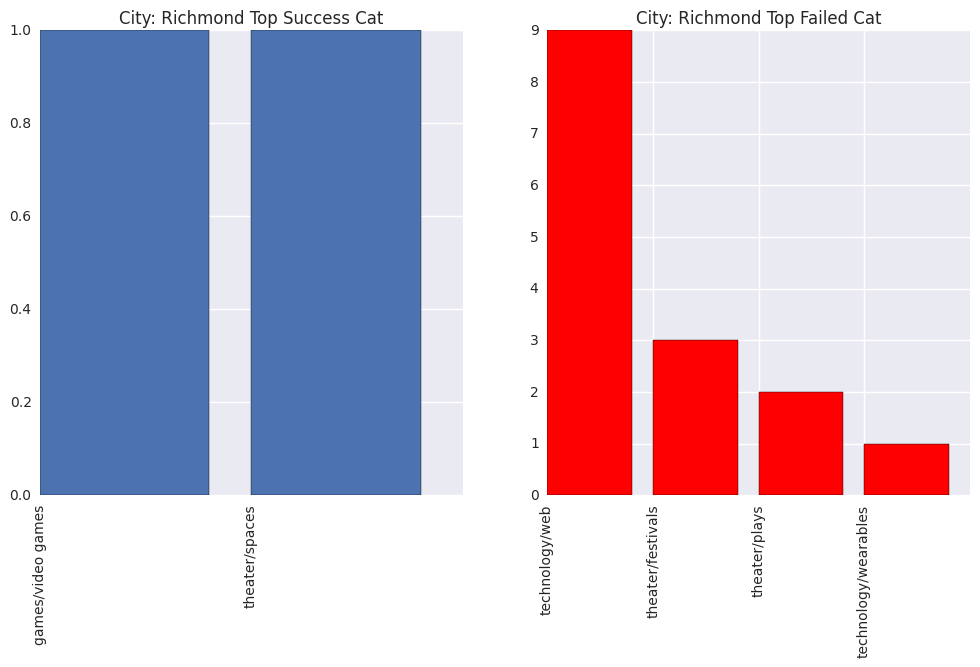

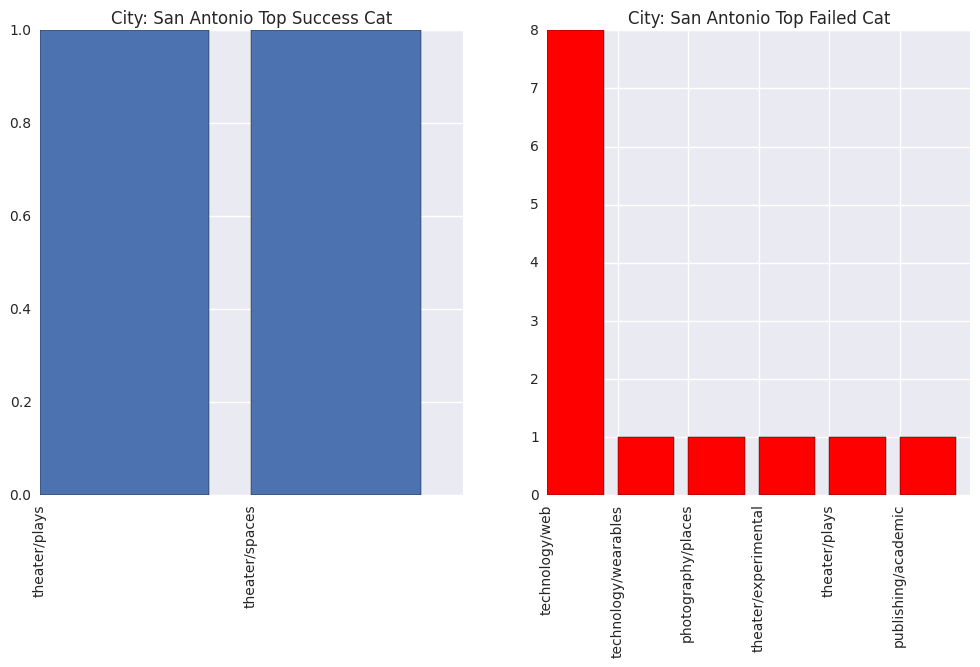

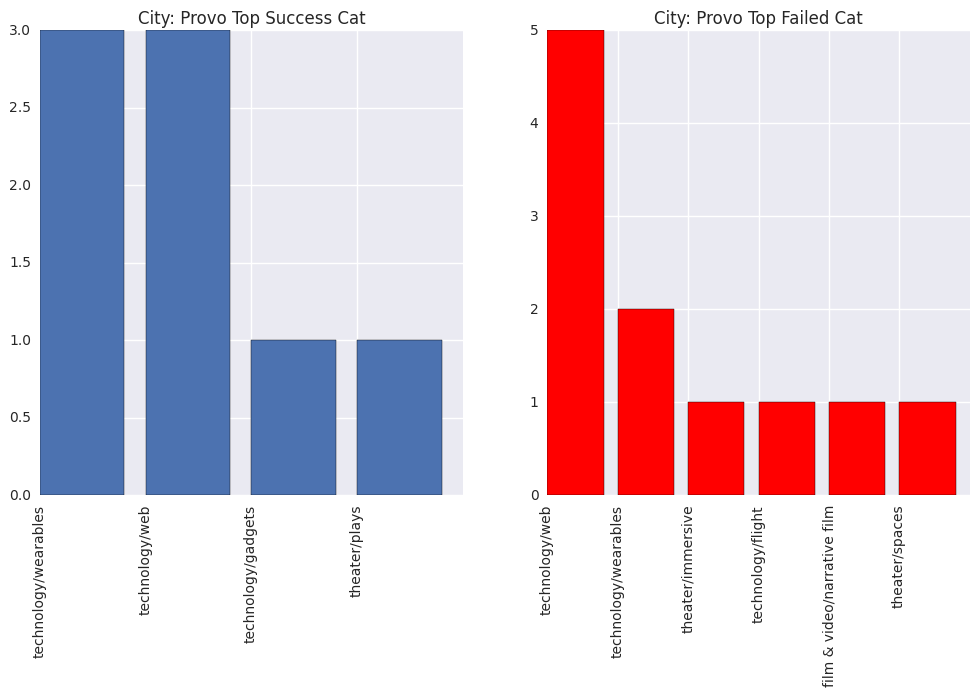

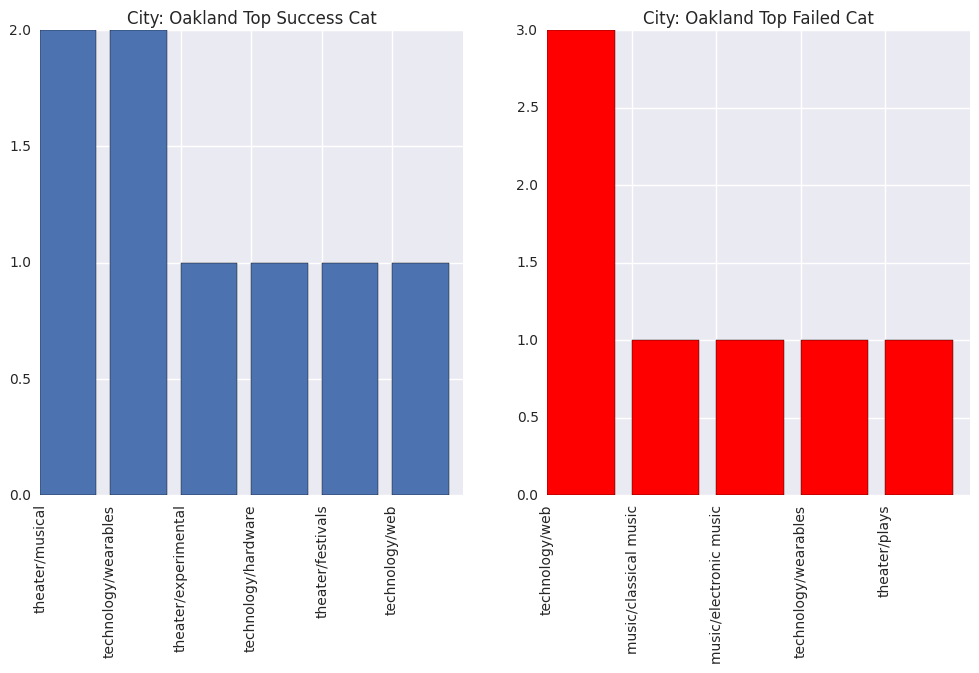

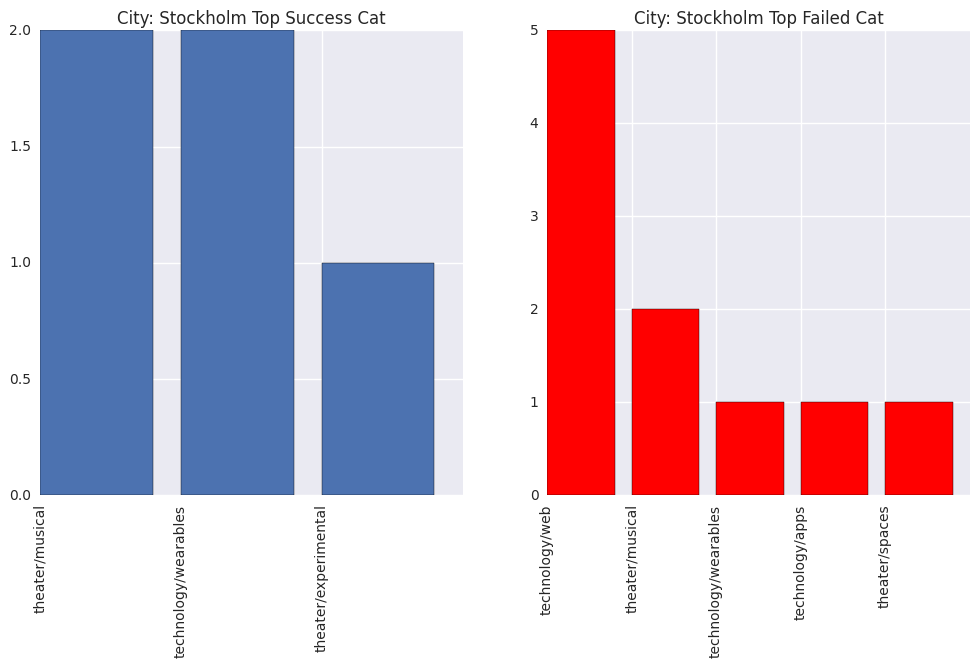

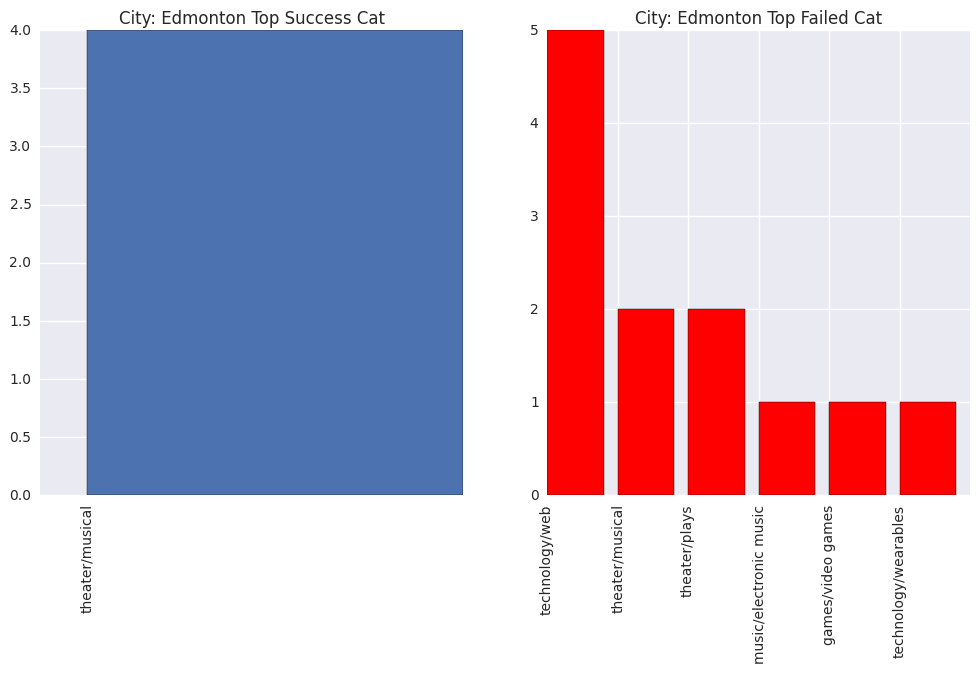

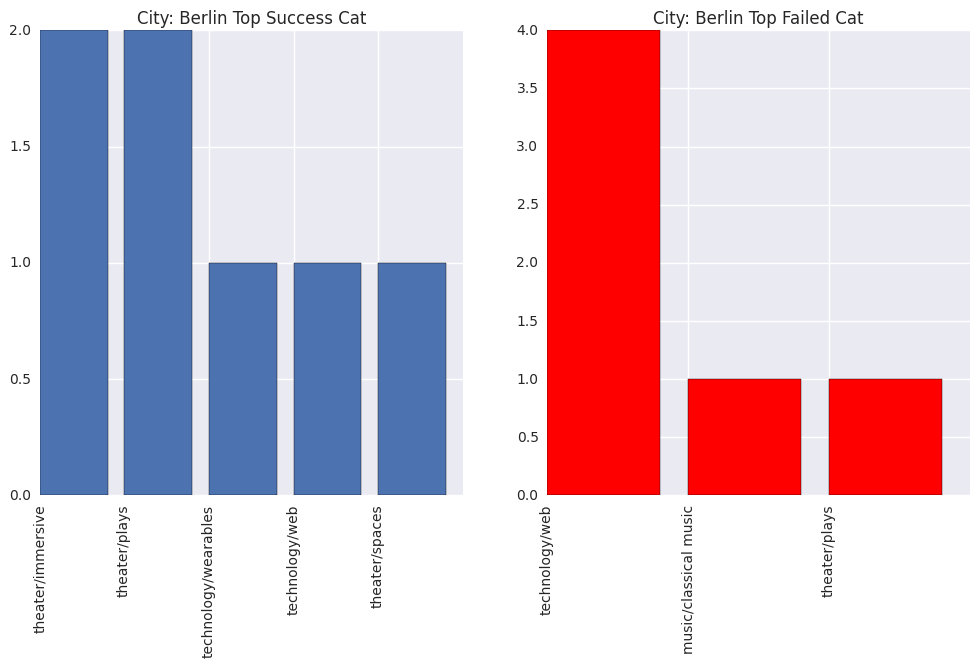

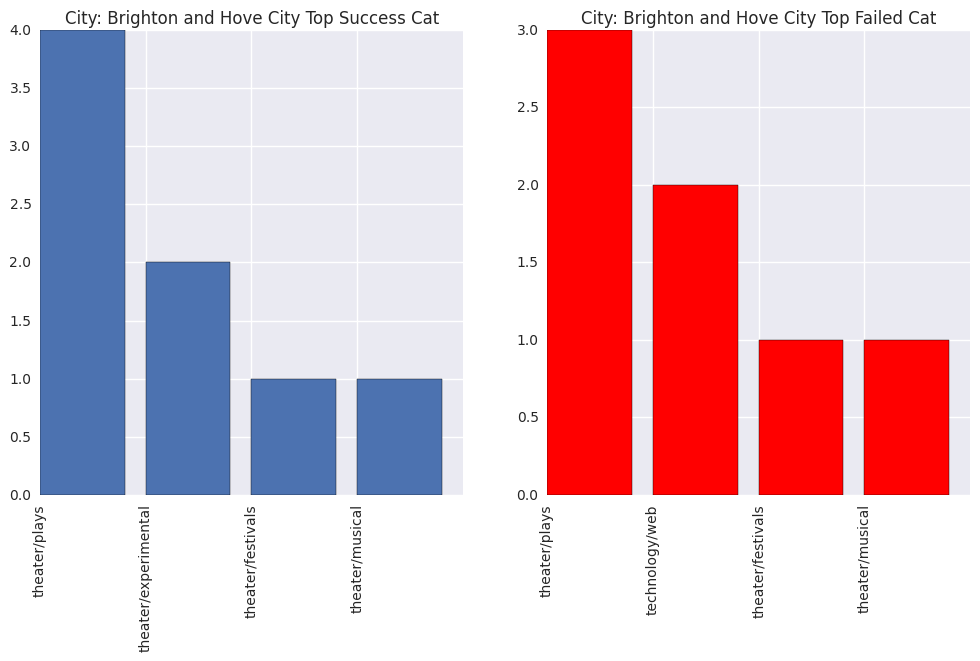

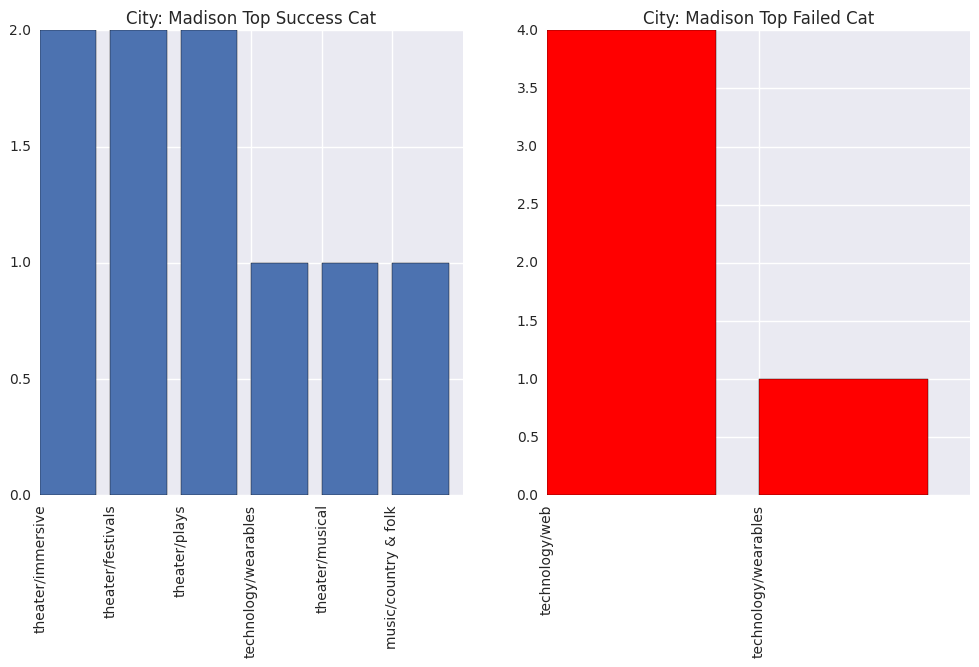

ValueError: Format " louis top success vs failed cat" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

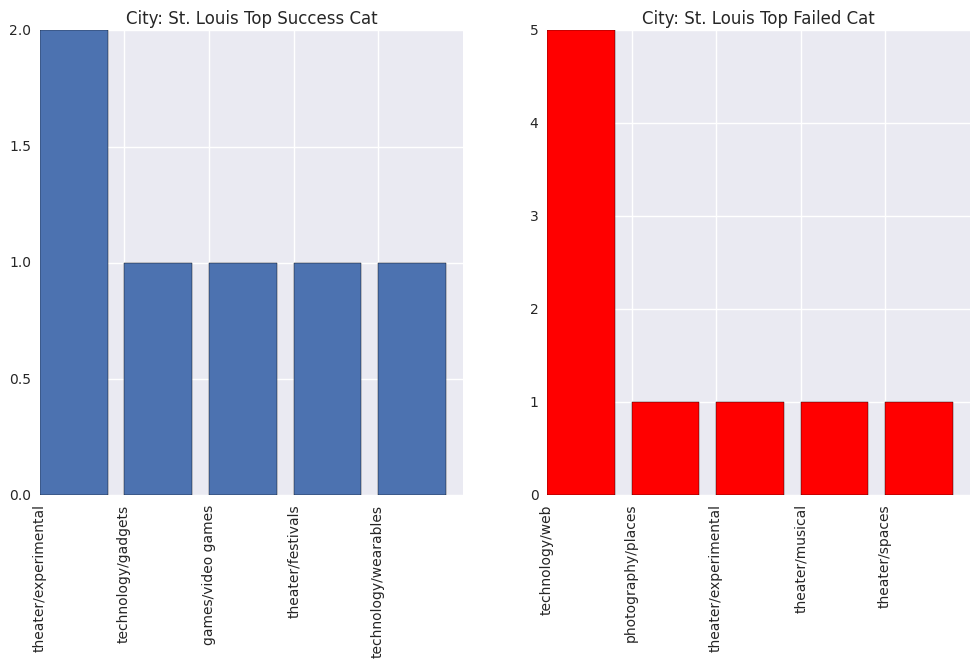

In [125]:
_ = map(success_cat_city_plot, data['location'].value_counts().head(100).index)

# Histogram of FAILED Goal & SUCCESSFUL Goal for each category

In [126]:
def goal_each_cat(category):
    print 'Category: ', category
    plt.rcParams['figure.figsize'] = 12, 6
    plt.subplot(121)

    try:
        print '# of Failed campaigns: ', len(data[(data['cat'] == category) & (data['state'] == 'failed')])
        _ = plt.hist(data[(data['cat'] == category) & (data['state'] == 'failed')]['goal'].values, label='F')
    except ValueError as e:
        pass
    try:
        print '# of Successful campaigns: ', len(data[(data['cat'] == category) & (data['state'] == 'successful')])
        _ = plt.hist(data[(data['cat'] == category) & (data['state'] == 'successful')]['goal'].values, label='S')
    except ValueError as e:
        pass

    _ = plt.title('Goal Histogram - Category {}'.format(category))
    _ = plt.xlabel('Goal $')
    _ = plt.legend()

    plt.subplot(122)
    x_succ = range(1, len(data[(data['cat'] == category) & (data['state'] == 'successful')]['goal'])+1)
    x_fail = range(1, len(data[(data['cat'] == category) & (data['state'] == 'failed')]['goal'])+1)
    
    _ = plt.plot(x_fail, data[(data['cat'] == category) & (data['state'] == 'failed')]['goal'].values, 'o', label='F')
    _ = plt.plot(x_succ, data[(data['cat'] == category) & (data['state'] == 'successful')]['goal'].values, 'o', label='S')
    
    ymax = max(data[(data['cat'] == category)]['goal'].values)
    _ = plt.ylim(0, ymax+0.1*ymax)
    plt.legend()
    plt.show()

Category:  publishing/academic
# of Failed campaigns:  20
# of Successful campaigns:  0


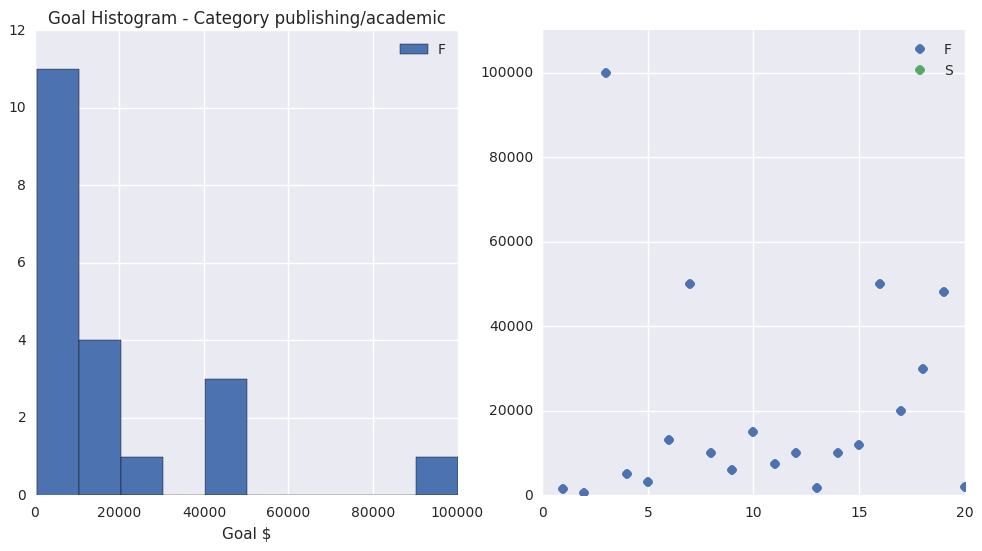

Category:  photography/places
# of Failed campaigns:  100
# of Successful campaigns:  0


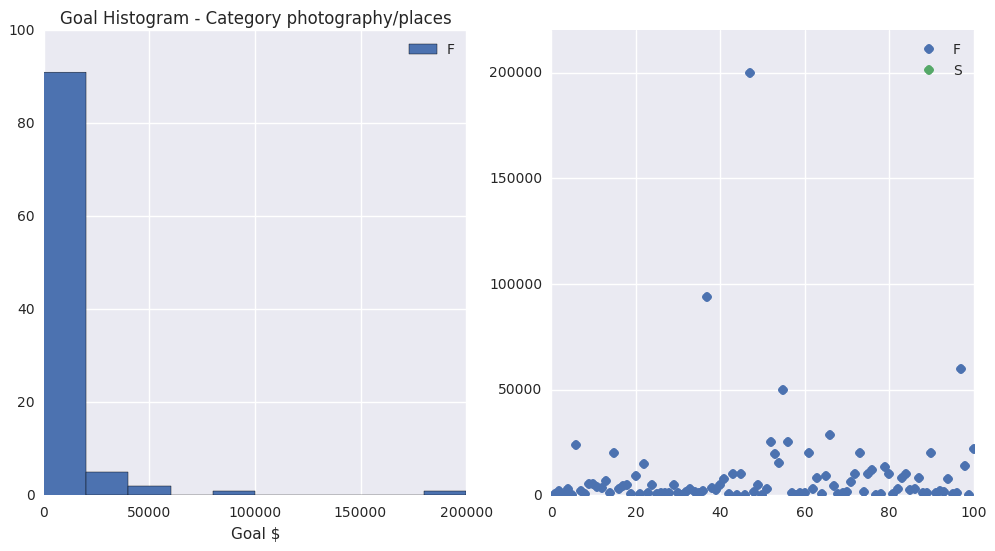

Category:  music/electronic music
# of Failed campaigns:  40
# of Successful campaigns:  0


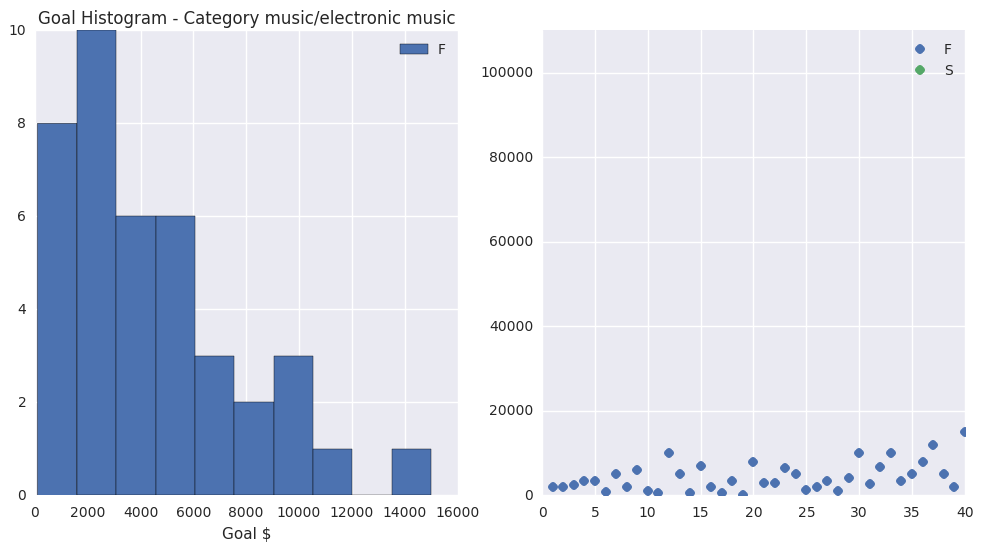

Category:  music/country & folk
# of Failed campaigns:  20
# of Successful campaigns:  40


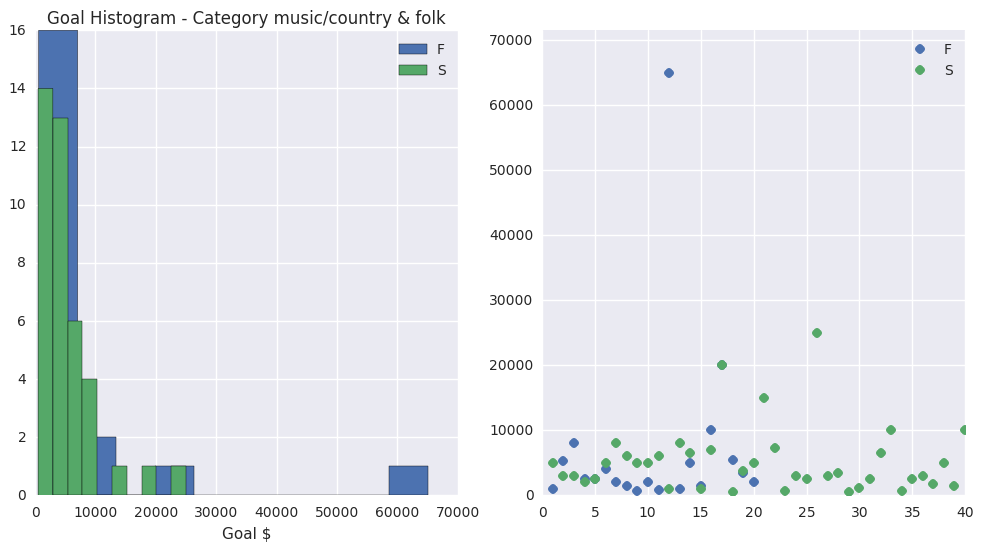

Category:  music/classical music
# of Failed campaigns:  40
# of Successful campaigns:  0


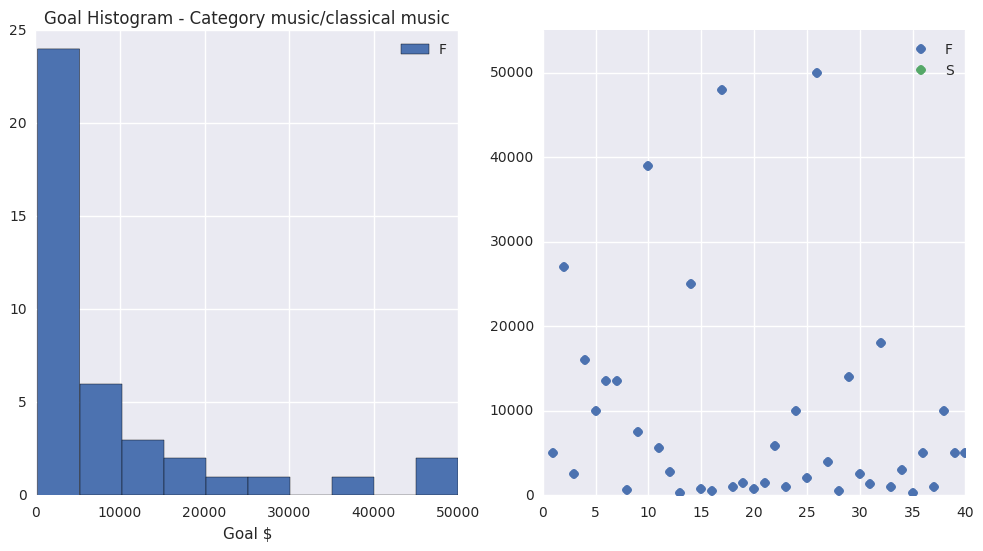

Category:  music/blues
# of Failed campaigns:  0
# of Successful campaigns:  18


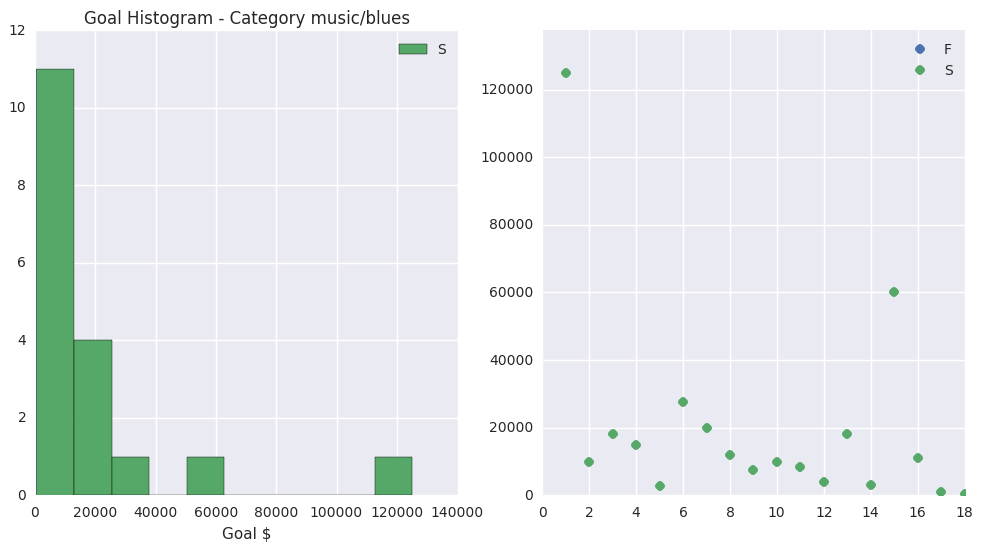

Category:  games/video games
# of Failed campaigns:  20
# of Successful campaigns:  120


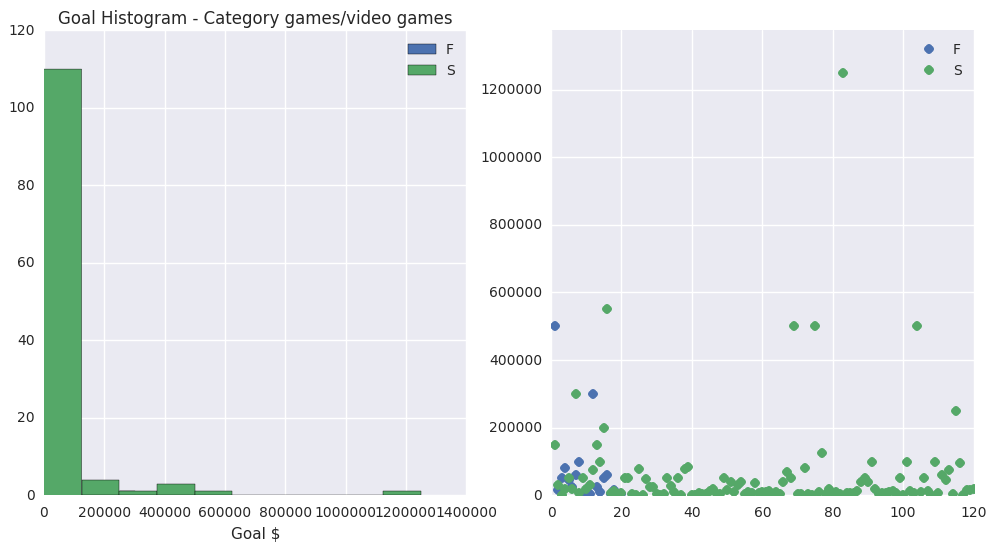

Category:  food/restaurants
# of Failed campaigns:  0
# of Successful campaigns:  0


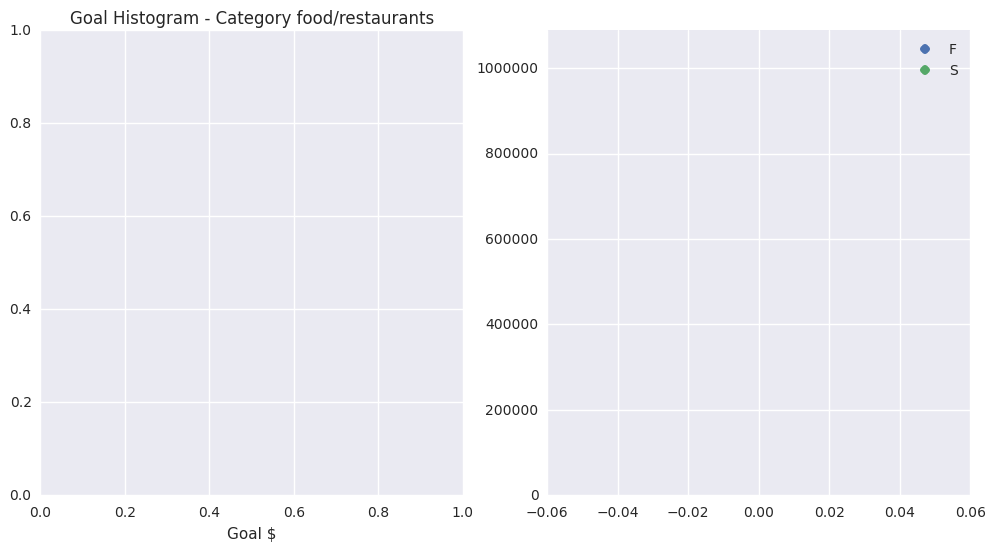

Category:  film & video/webseries
# of Failed campaigns:  20
# of Successful campaigns:  0


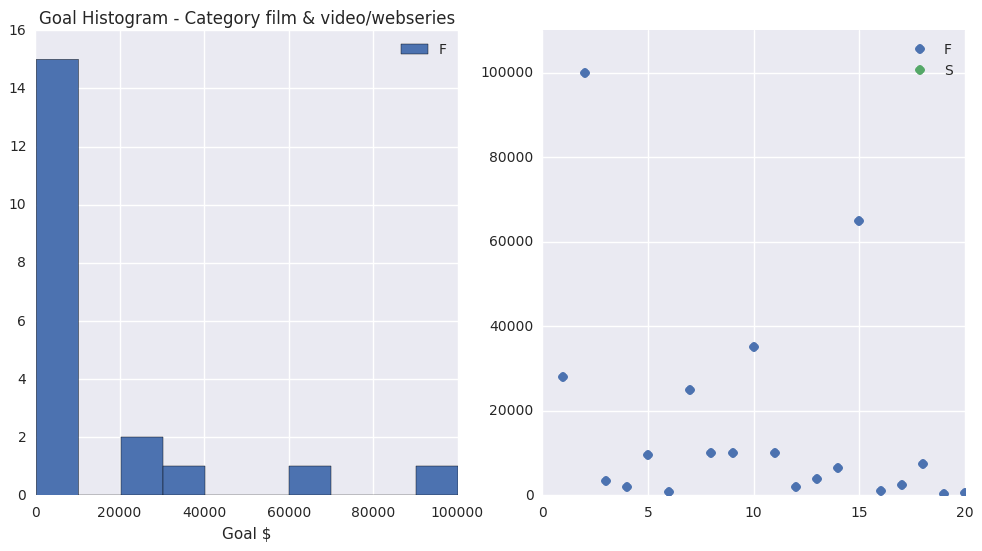

Category:  film & video/thrillers
# of Failed campaigns:  20
# of Successful campaigns:  0


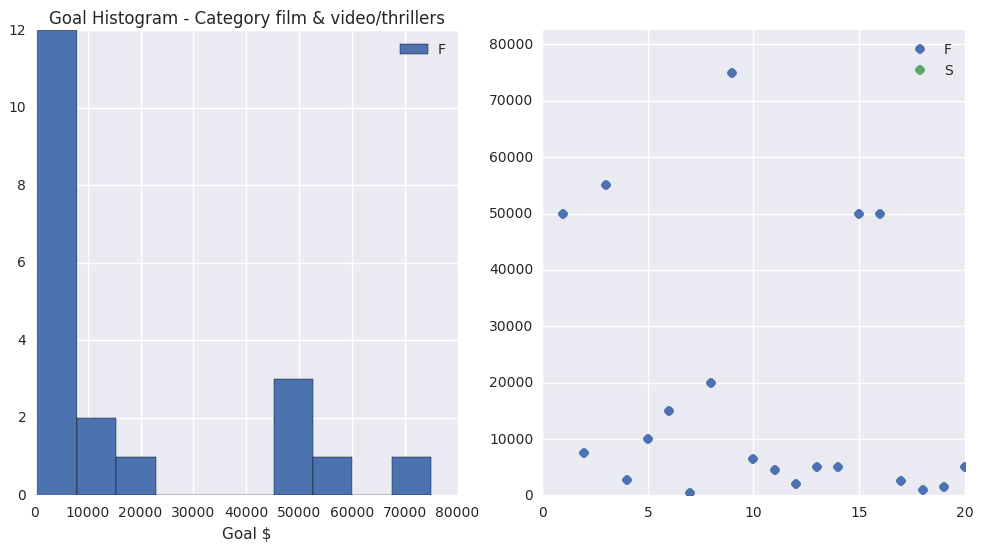

Category:  film & video/shorts
# of Failed campaigns:  0
# of Successful campaigns:  40


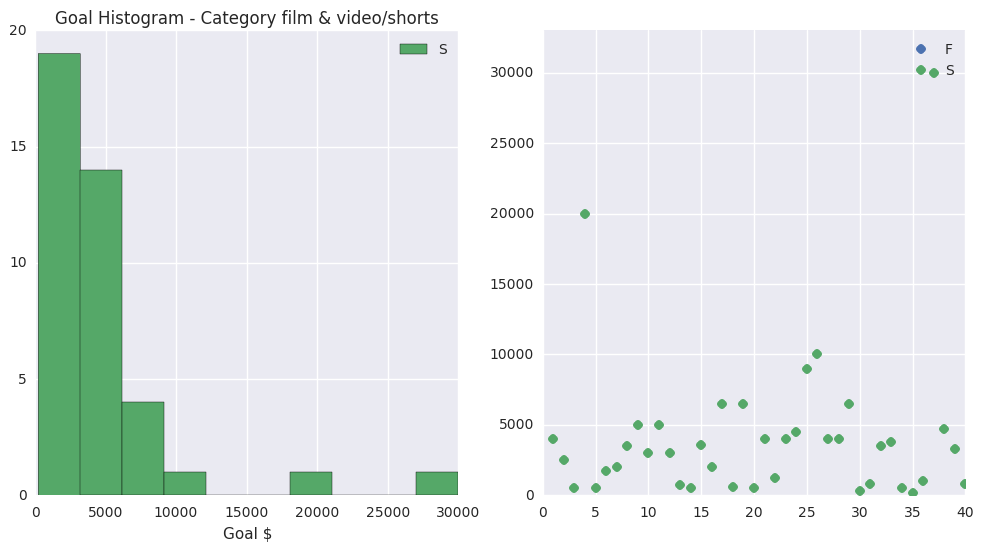

Category:  film & video/narrative film
# of Failed campaigns:  40
# of Successful campaigns:  0


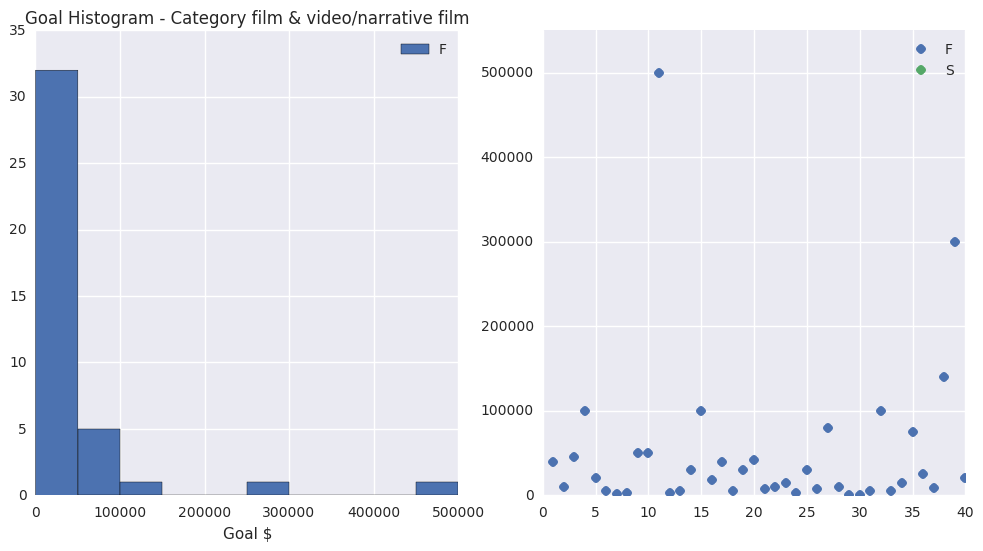

Category:  technology/web
# of Failed campaigns:  2502
# of Successful campaigns:  222


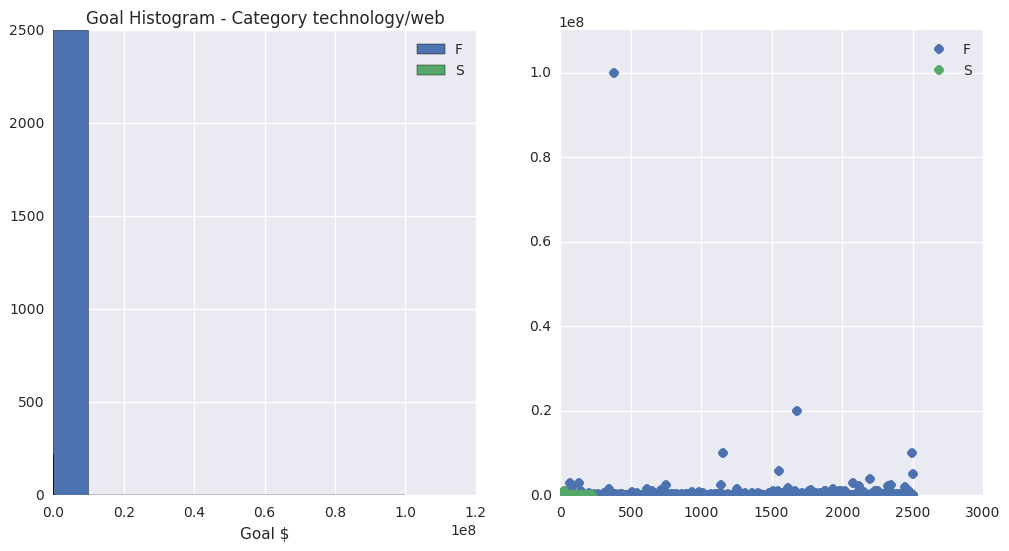

Category:  technology/apps
# of Failed campaigns:  100
# of Successful campaigns:  0


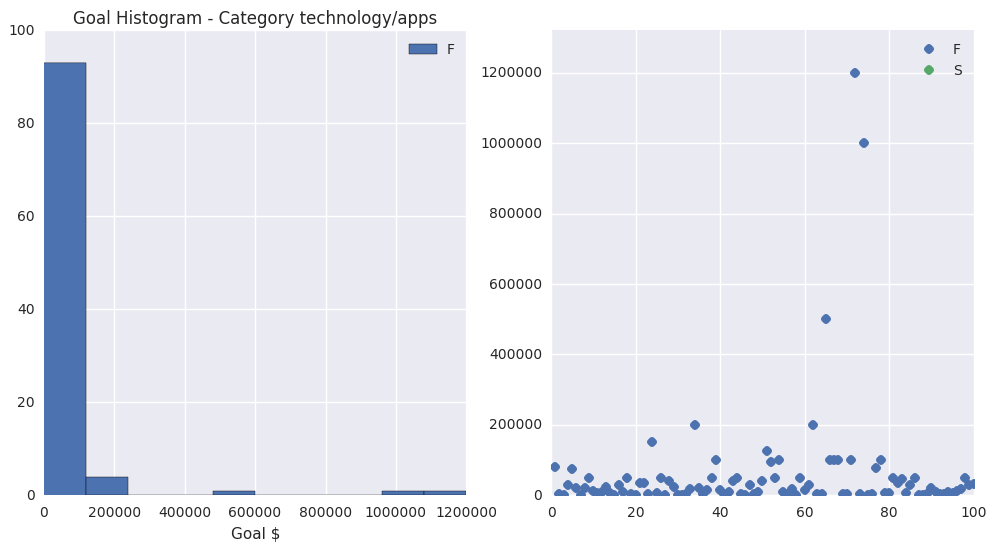

Category:  technology/gadgets
# of Failed campaigns:  20
# of Successful campaigns:  80


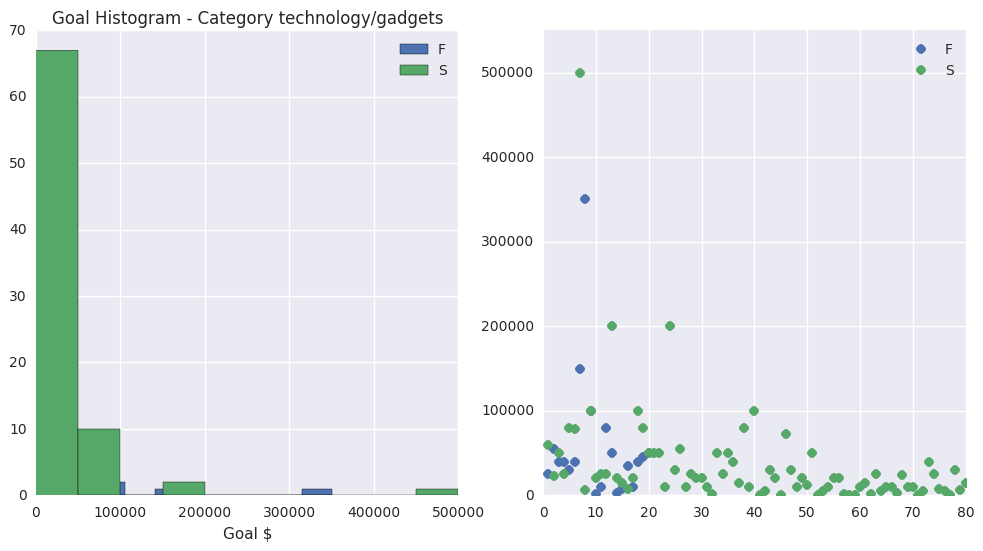

Category:  technology/hardware
# of Failed campaigns:  0
# of Successful campaigns:  20


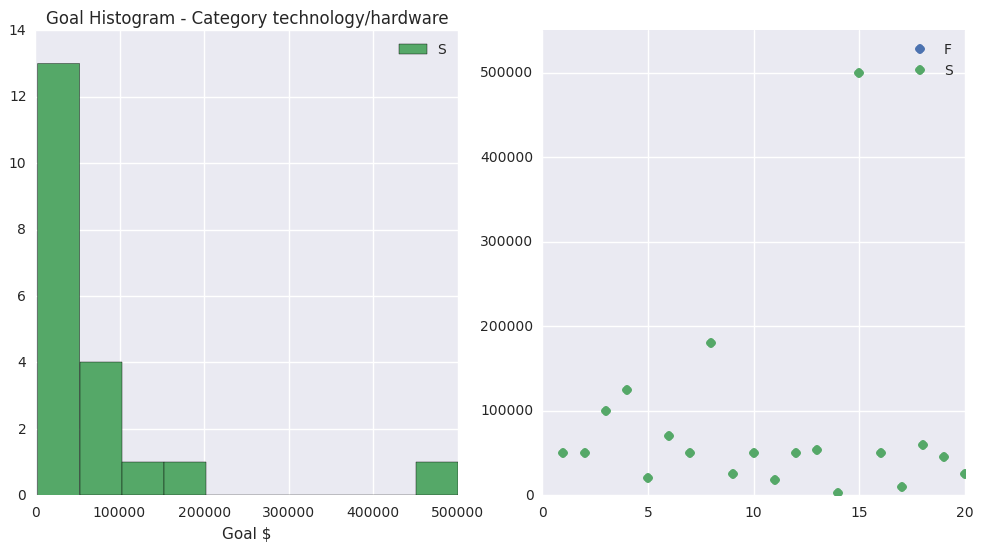

Category:  theater/festivals
# of Failed campaigns:  155
# of Successful campaigns:  291


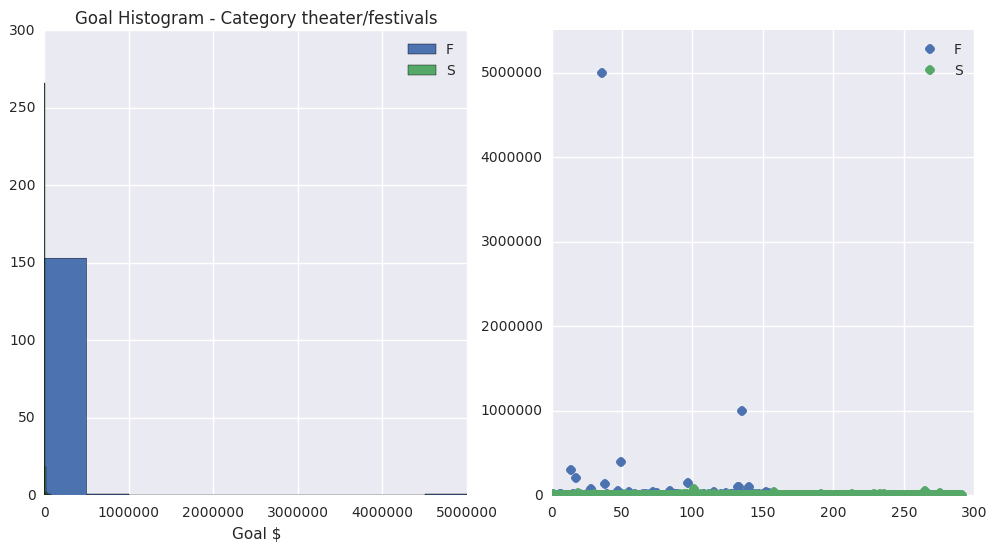

Category:  theater/plays
# of Failed campaigns:  415
# of Successful campaigns:  681


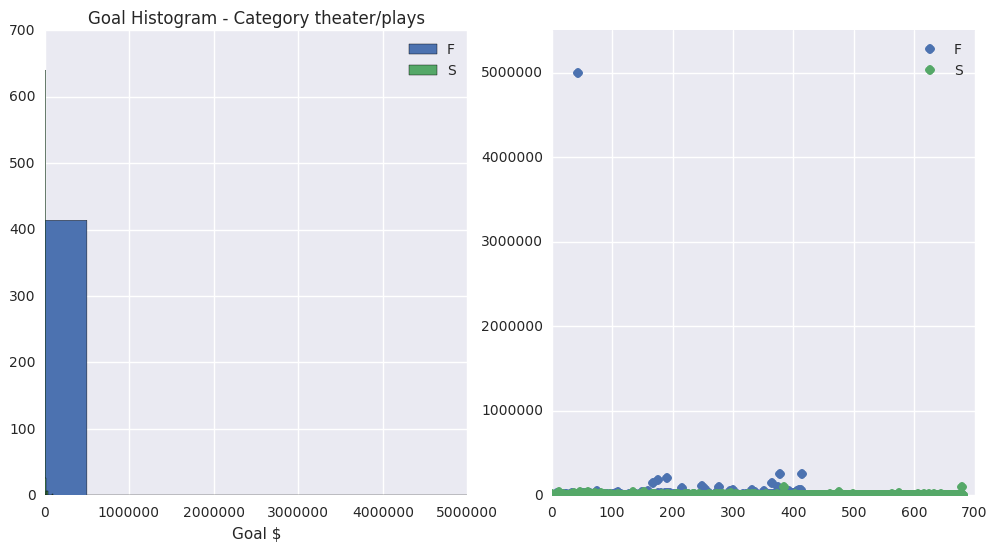

Category:  theater/musical
# of Failed campaigns:  305
# of Successful campaigns:  406


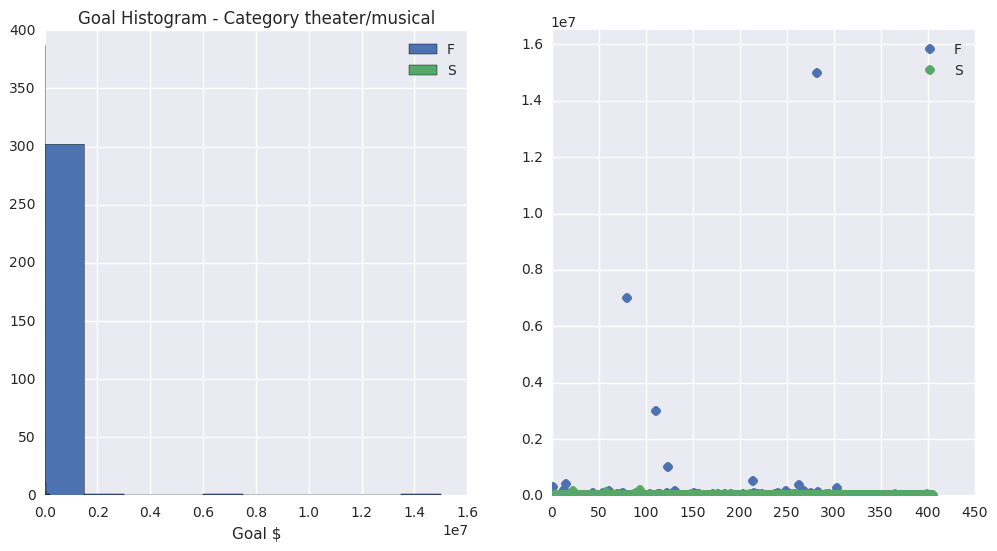

Category:  technology/flight
# of Failed campaigns:  13
# of Successful campaigns:  0


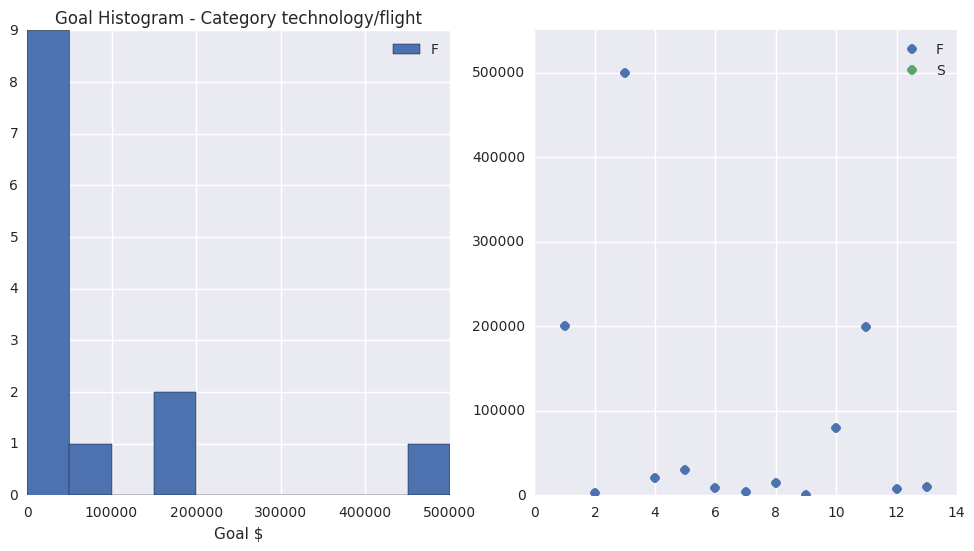

Category:  technology/diy electronics
# of Failed campaigns:  0
# of Successful campaigns:  20


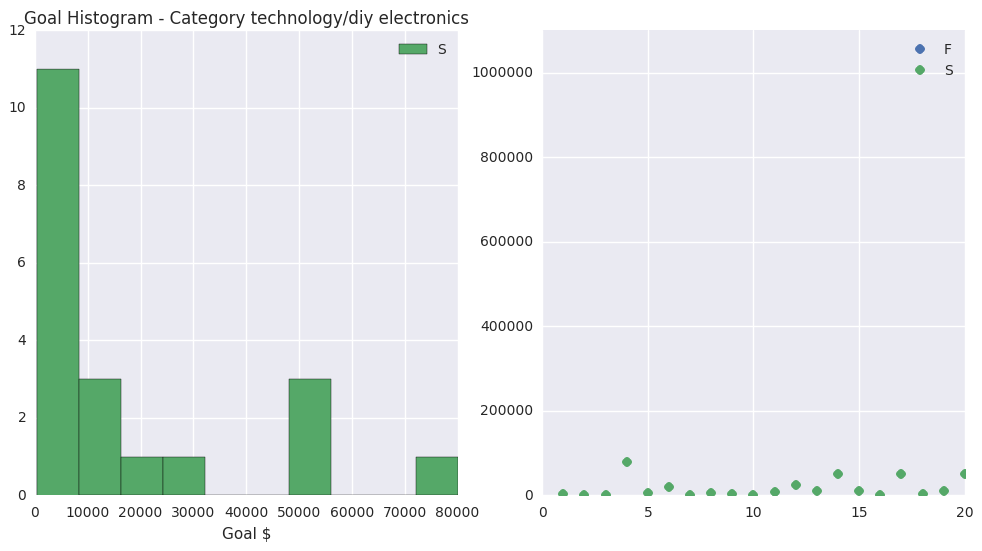

Category:  theater/spaces
# of Failed campaigns:  78
# of Successful campaigns:  82


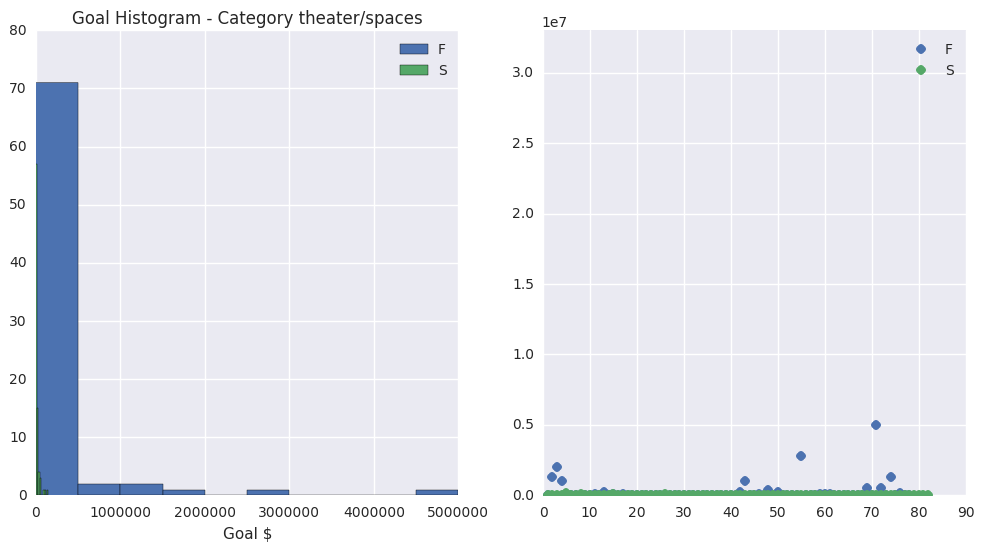

Category:  theater/immersive
# of Failed campaigns:  106
# of Successful campaigns:  140


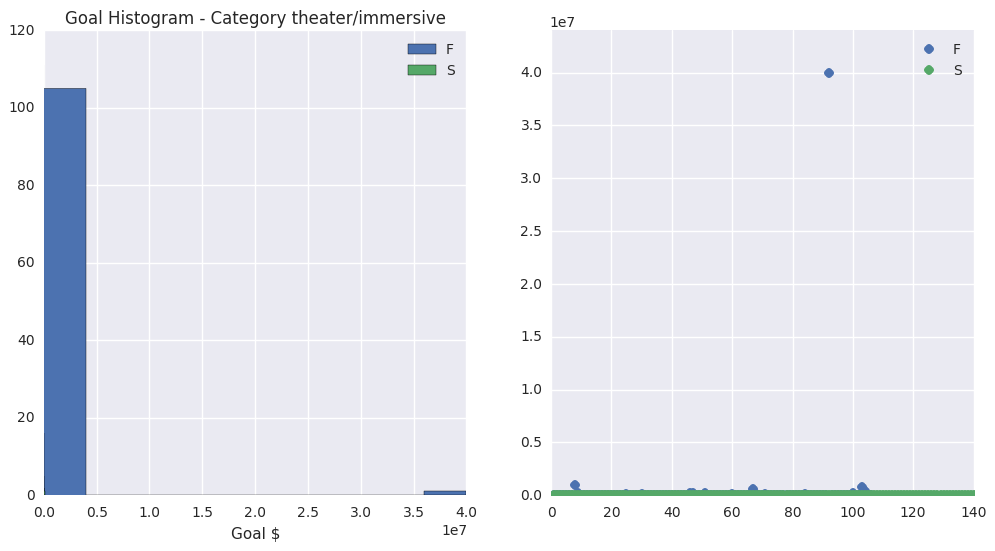

Category:  theater/experimental
# of Failed campaigns:  116
# of Successful campaigns:  177


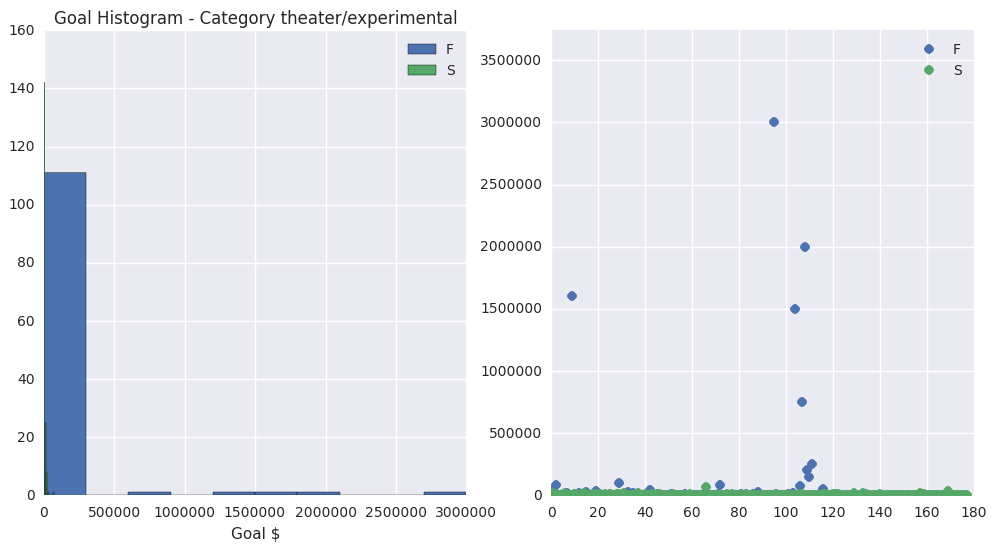

Category:  theater/comedy
# of Failed campaigns:  0
# of Successful campaigns:  1


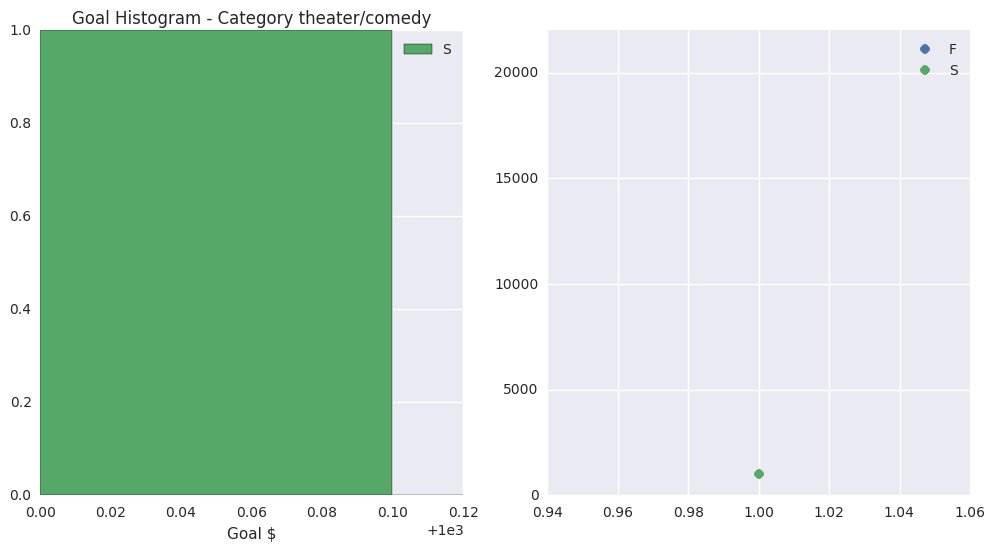

Category:  technology/wearables
# of Failed campaigns:  462
# of Successful campaigns:  289


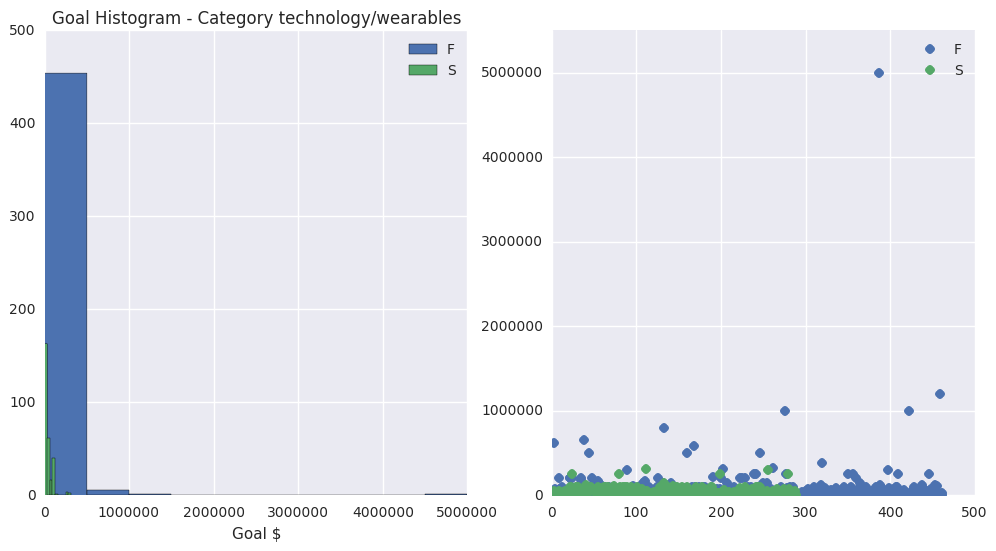

In [127]:
_ = map(goal_each_cat, data['cat'].unique())

# Ratio between failed pledge vs failed goal

In [128]:
data['p_g_ratio'] = data['pledged'] / data['goal']
goal_pledged_ratio = (data[data['state'] == 'failed']['pledged']) / (data[data['state'] == 'failed']['goal'])
print type(goal_pledged_ratio)
print goal_pledged_ratio.head()
print goal_pledged_ratio.shape

<class 'pandas.core.series.Series'>
0    0.00000
1    0.00000
2    0.00120
3    0.00000
4    0.11049
dtype: float64
(4592,)


In [129]:
def p_g_ratio_plot(category):
    try:
        _ = plt.hist(data[(data['cat'] == category) & 
                          (data['state'] == 'failed')]['p_g_ratio'].values, bins=20, label='Exclude 0')
        _ = plt.hist(data[(data['cat'] == category) & 
                          (data['state'] == 'failed') &
                          (data['p_g_ratio'] > 0)]['p_g_ratio'].values, bins=20, label='Include 0')

    except ValueError as e:
        print 'Category:', category, 'has error.'
        print e
    
    _ = plt.title('Failed Pledge/Goal Ratio Histogram - Category {}'.format(category))
    _ = plt.xlabel('Ratio')
    _ = plt.legend()
    plt.show()

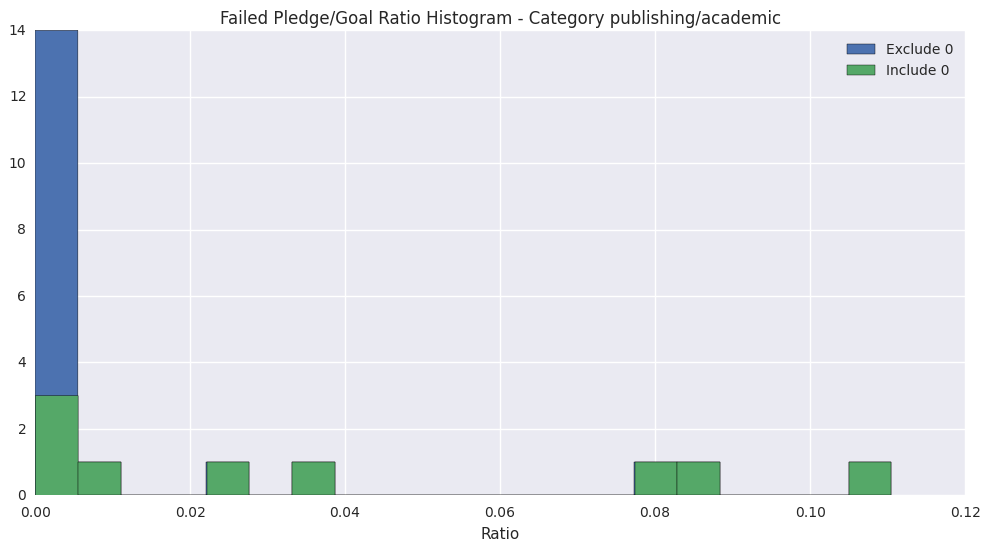

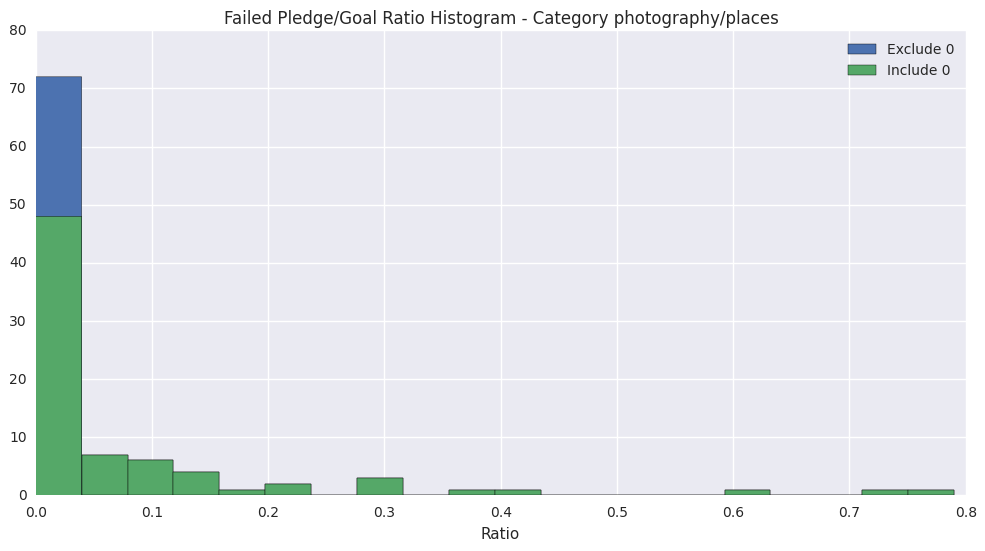

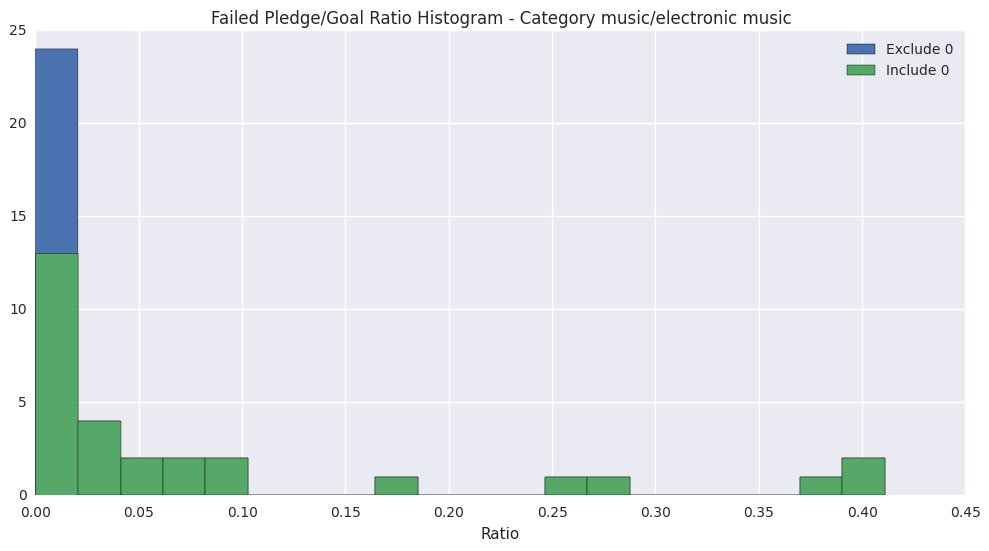

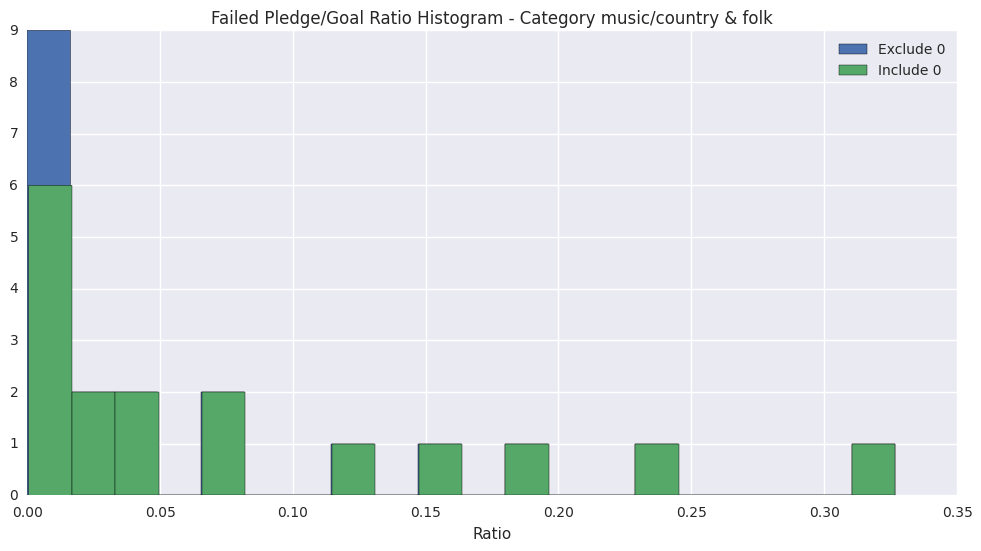

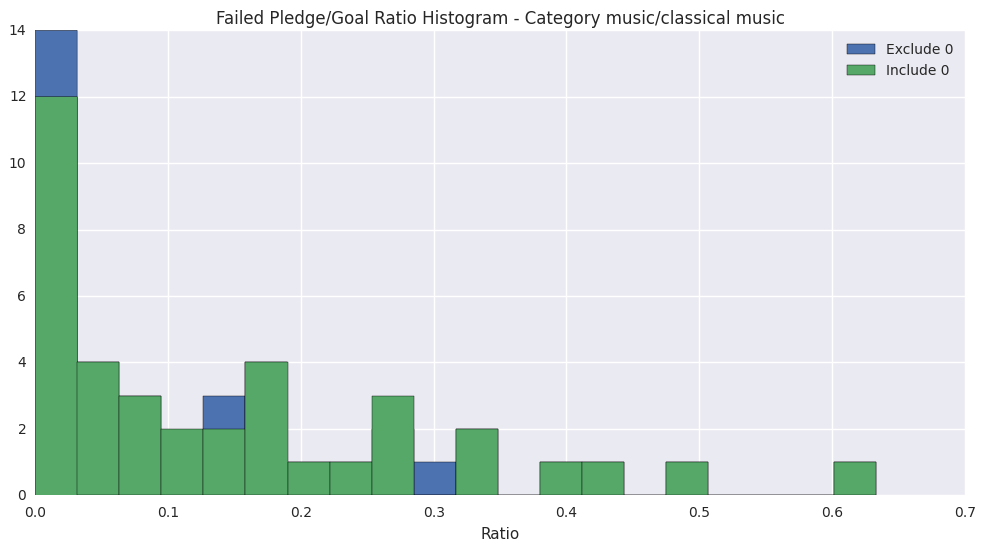

Category: music/blues has error.
zero-size array to reduction operation minimum which has no identity


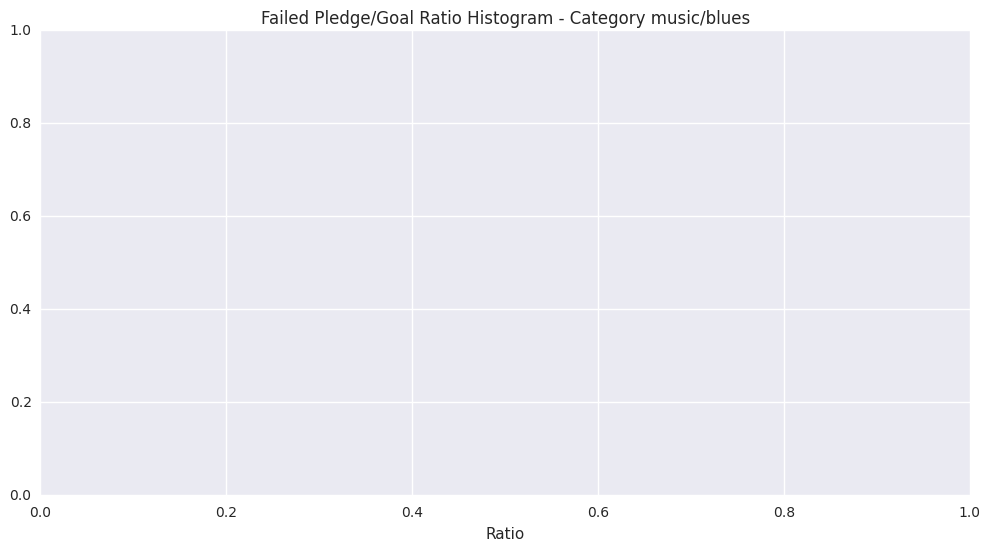

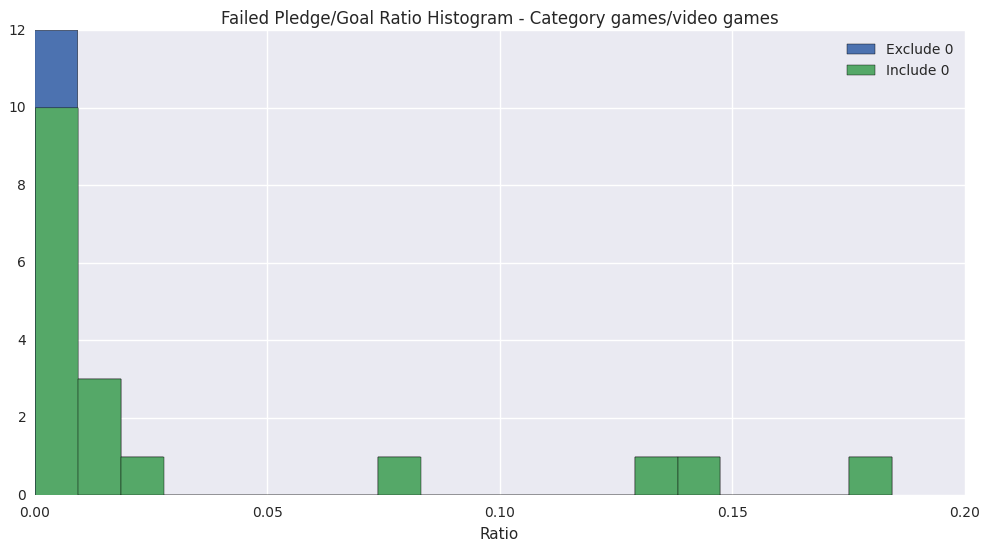

Category: food/restaurants has error.
zero-size array to reduction operation minimum which has no identity


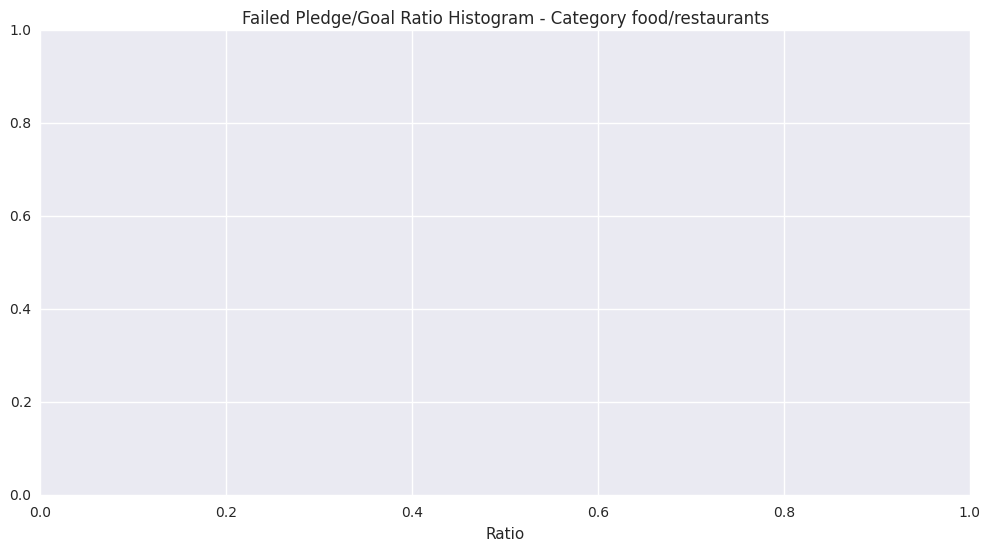

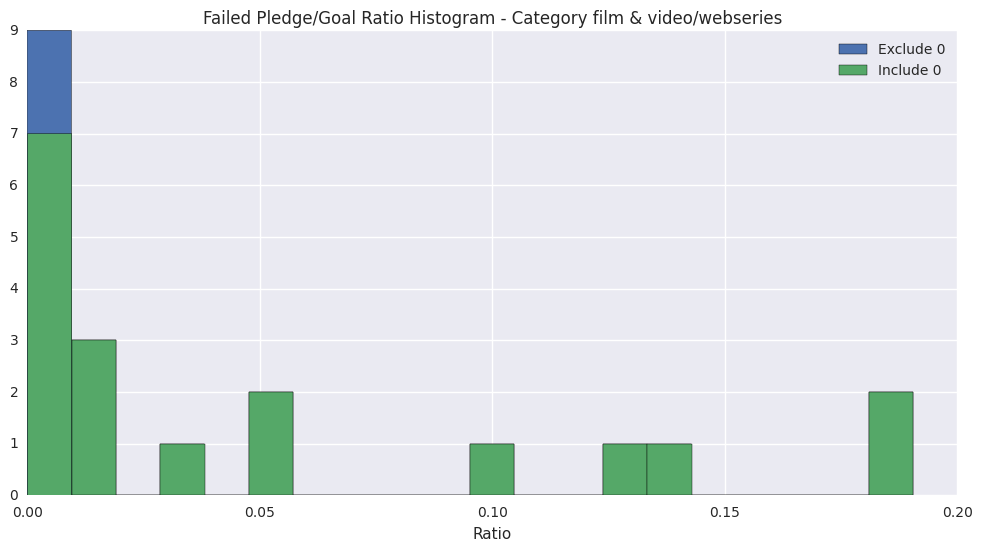

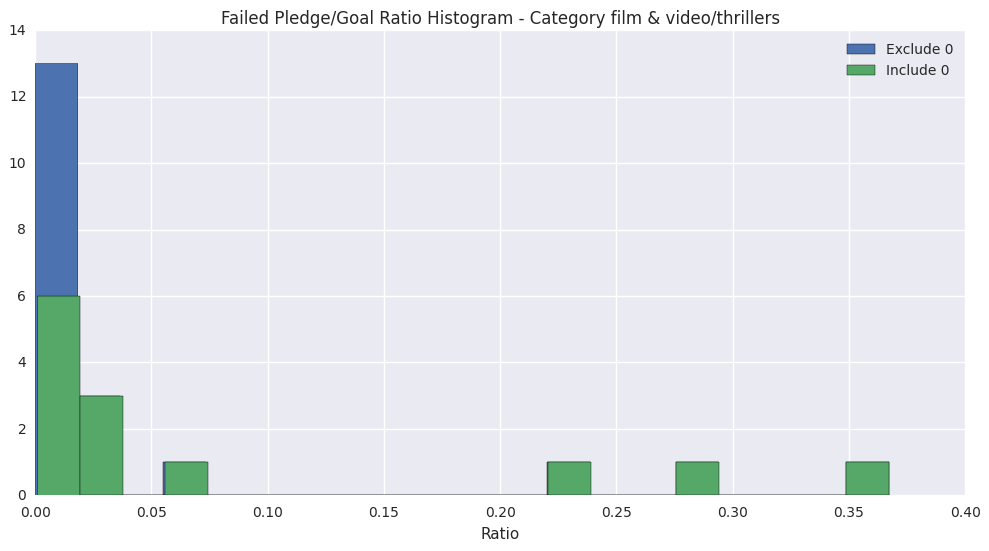

Category: film & video/shorts has error.
zero-size array to reduction operation minimum which has no identity


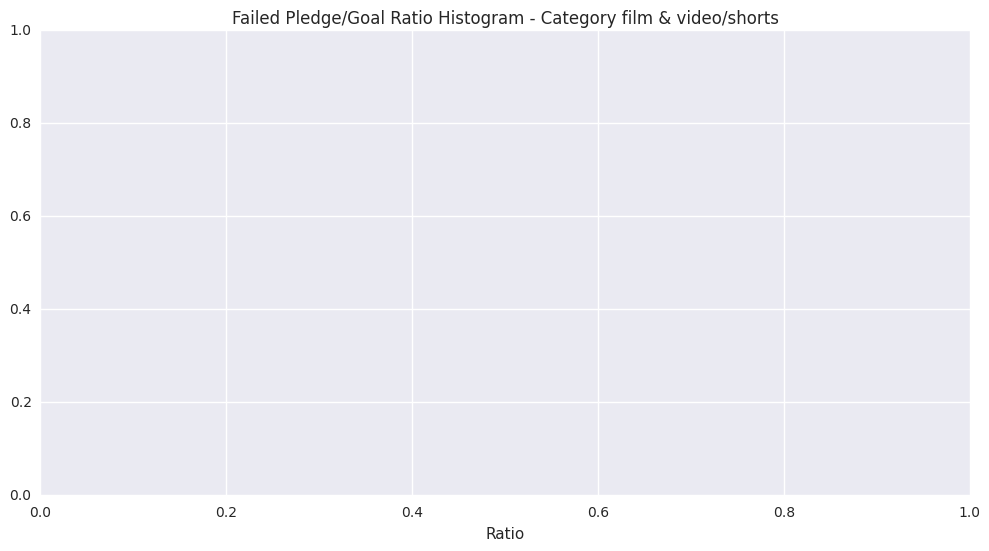

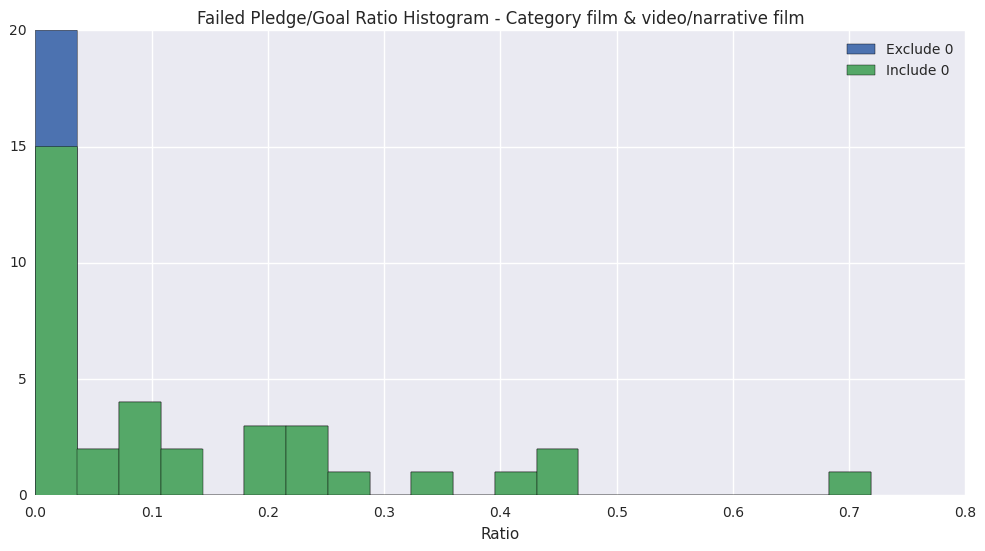

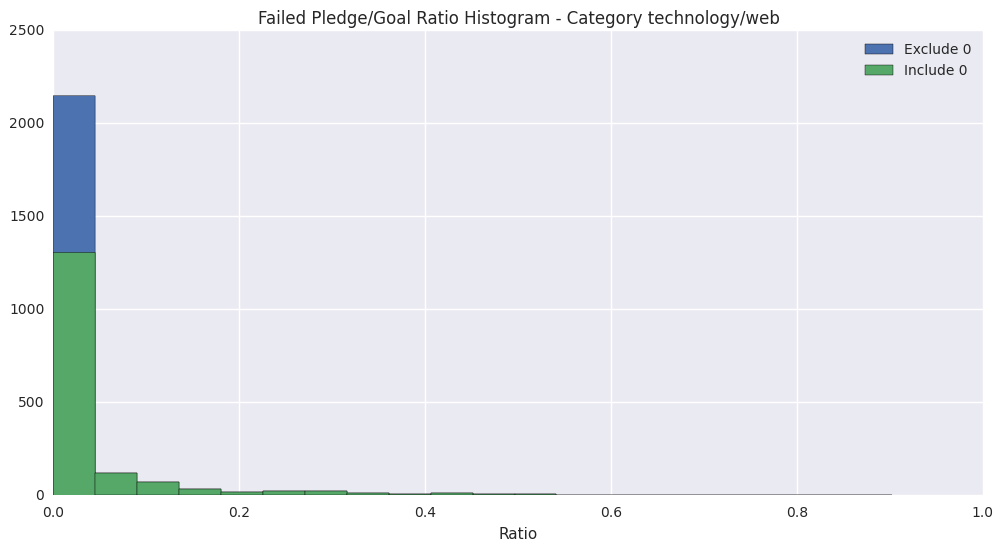

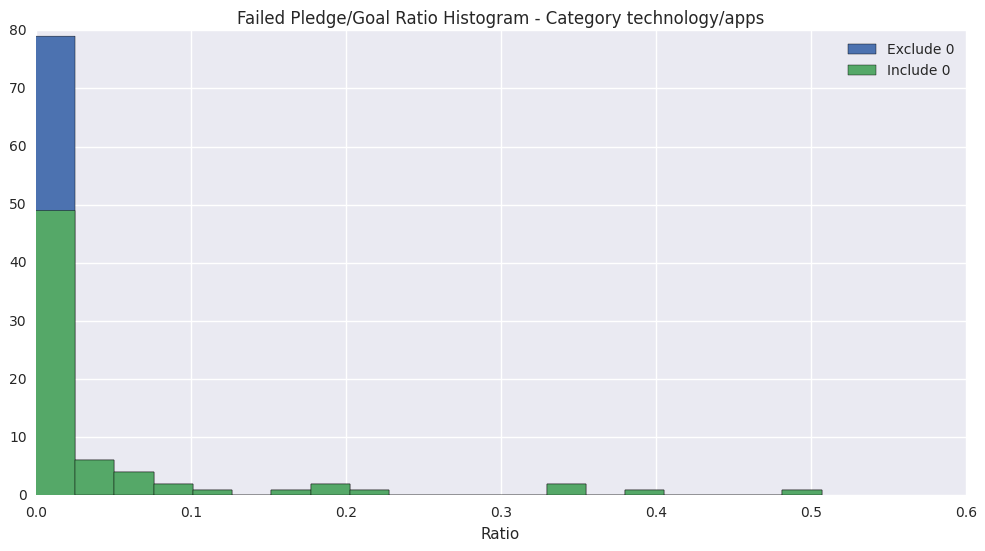

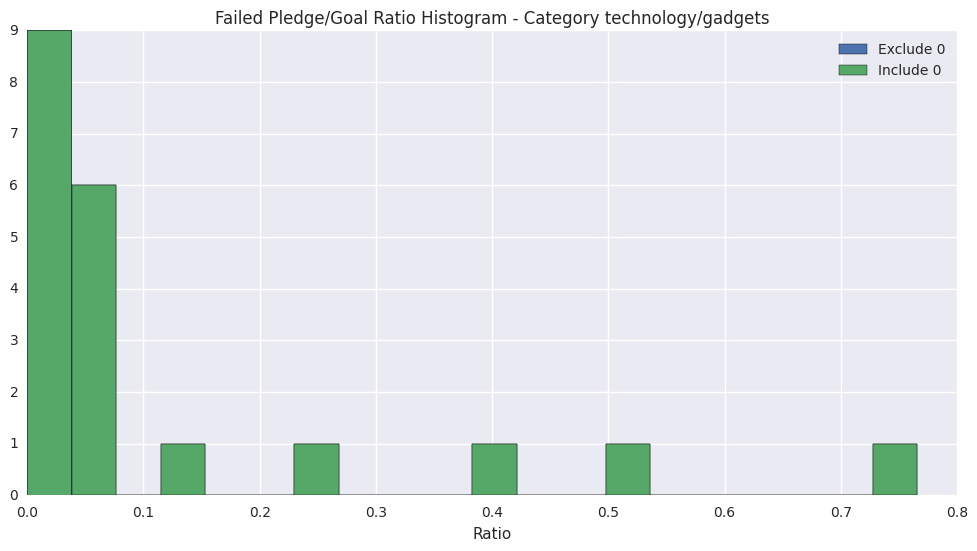

Category: technology/hardware has error.
zero-size array to reduction operation minimum which has no identity


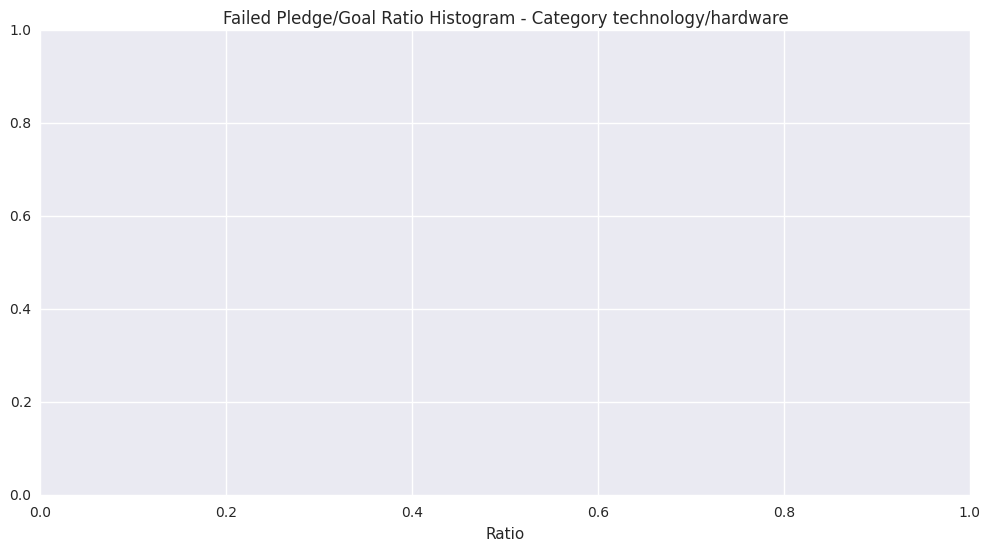

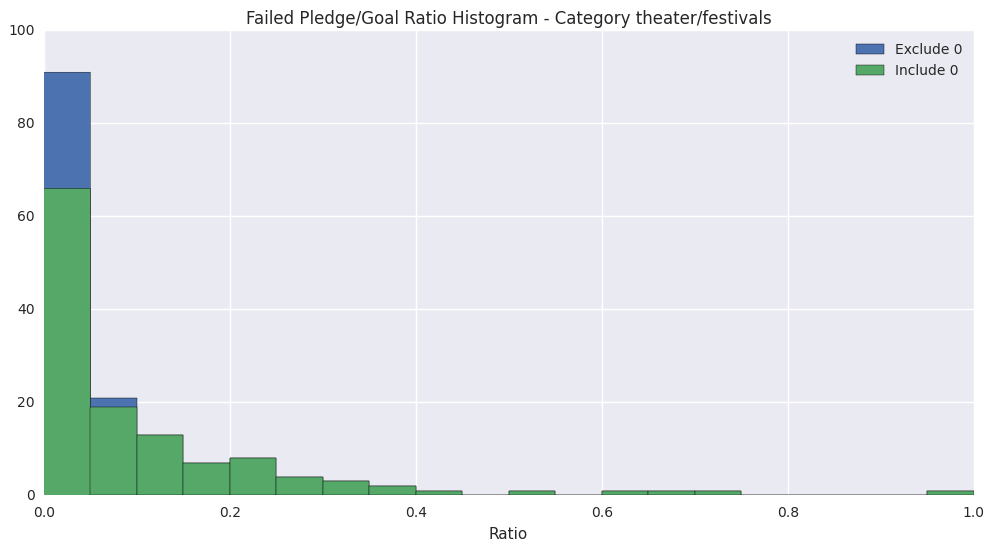

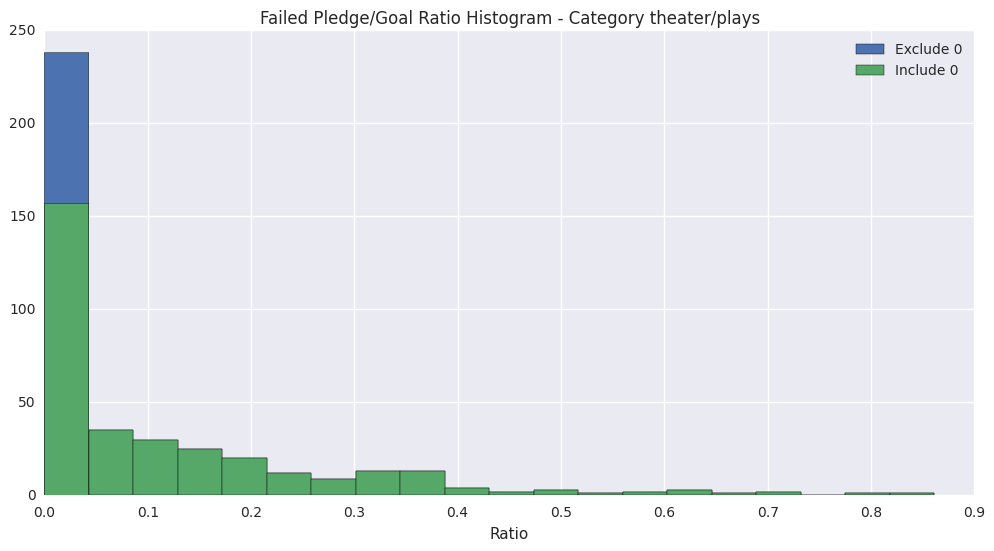

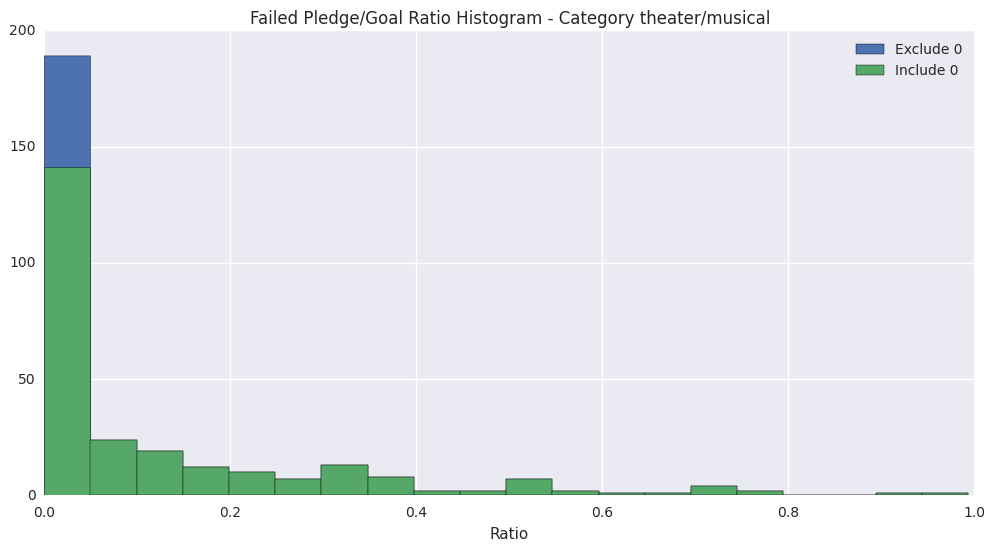

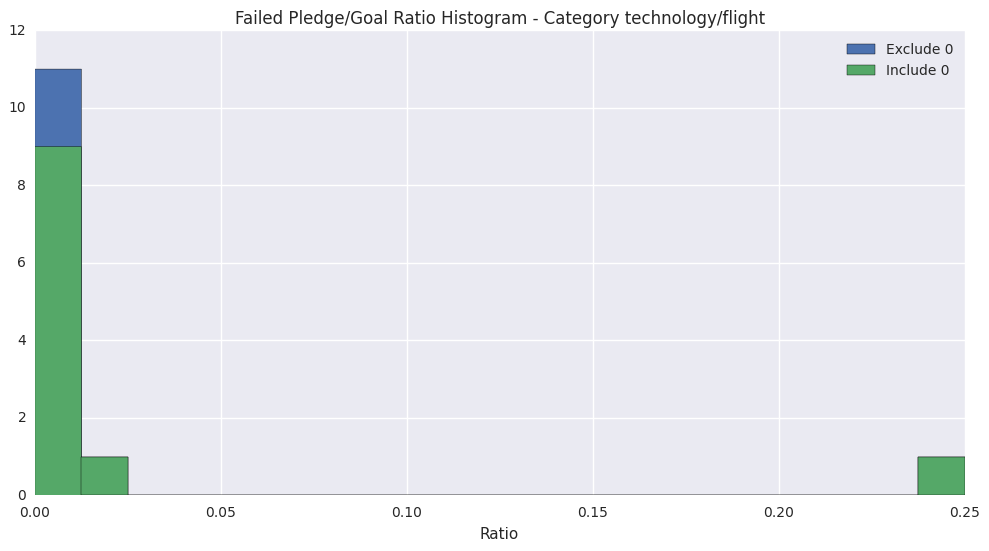

Category: technology/diy electronics has error.
zero-size array to reduction operation minimum which has no identity


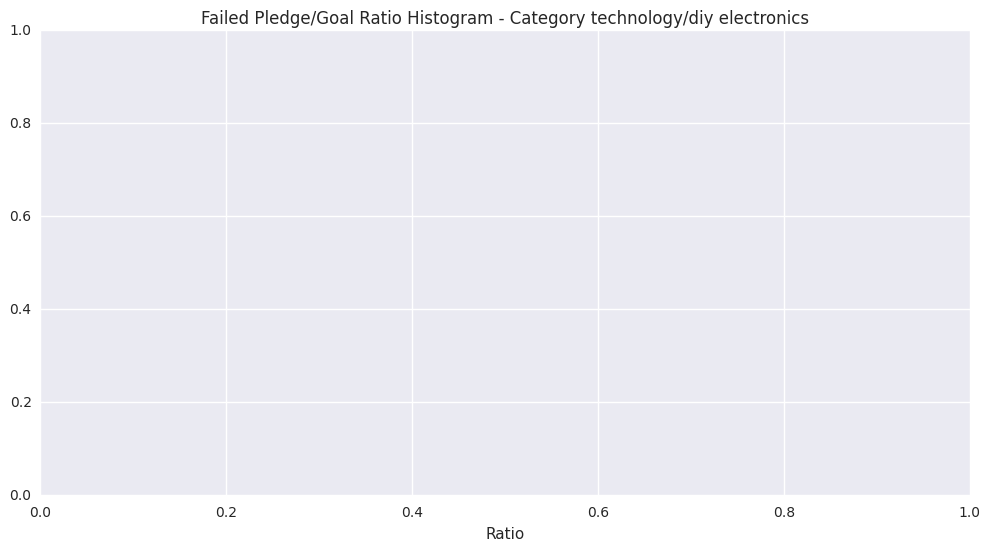

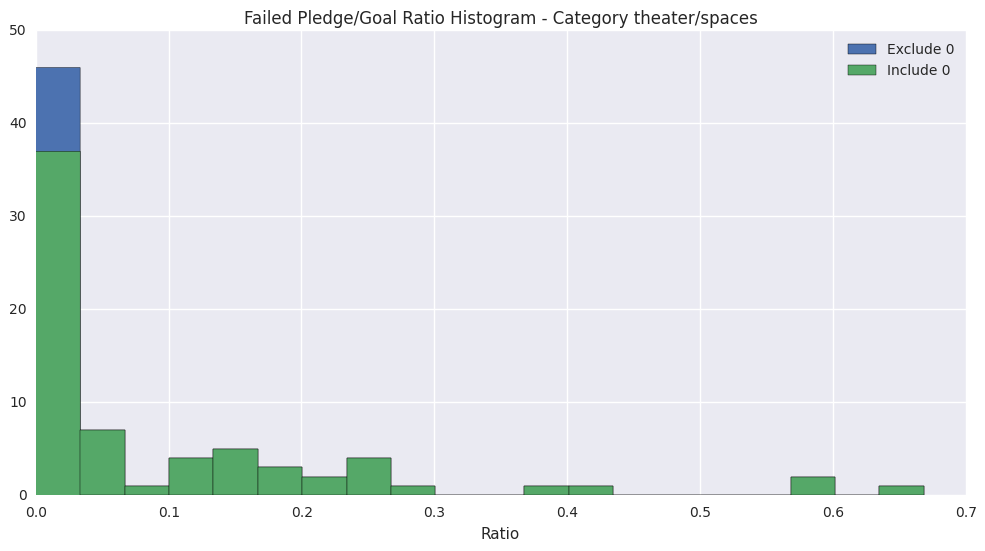

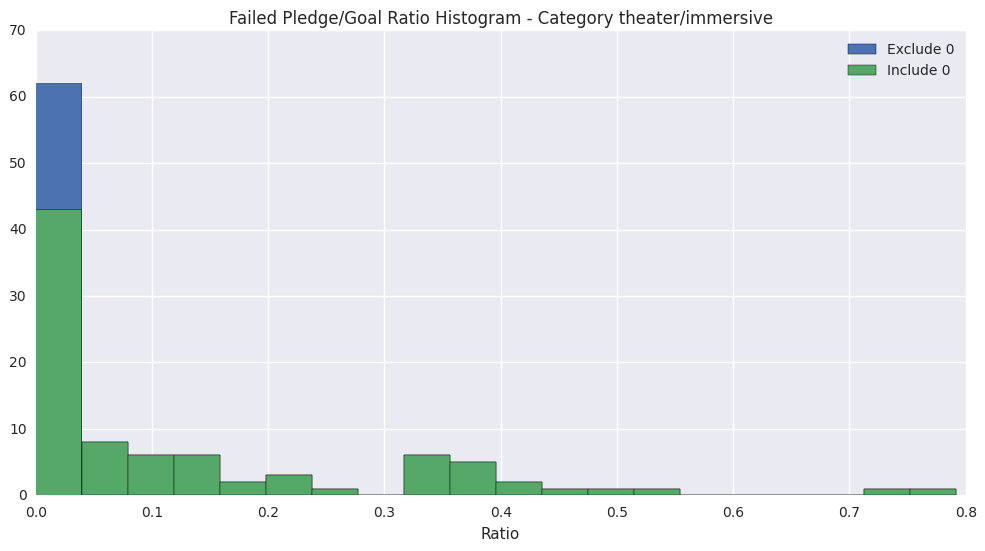

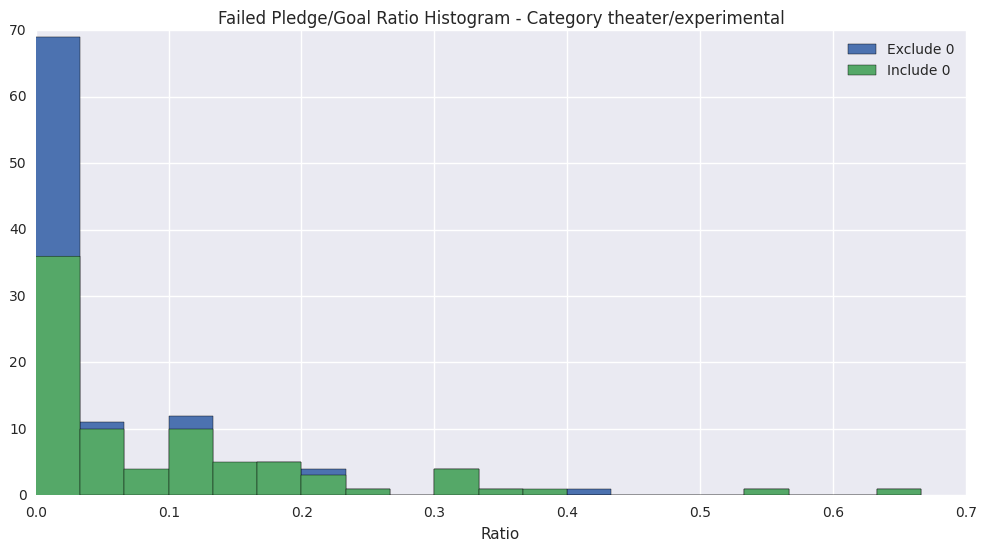

Category: theater/comedy has error.
zero-size array to reduction operation minimum which has no identity


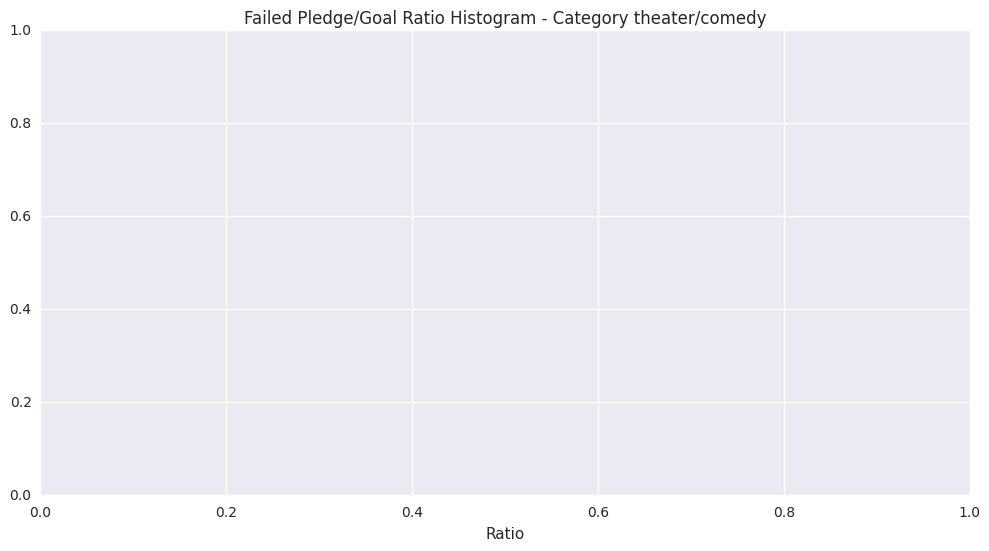

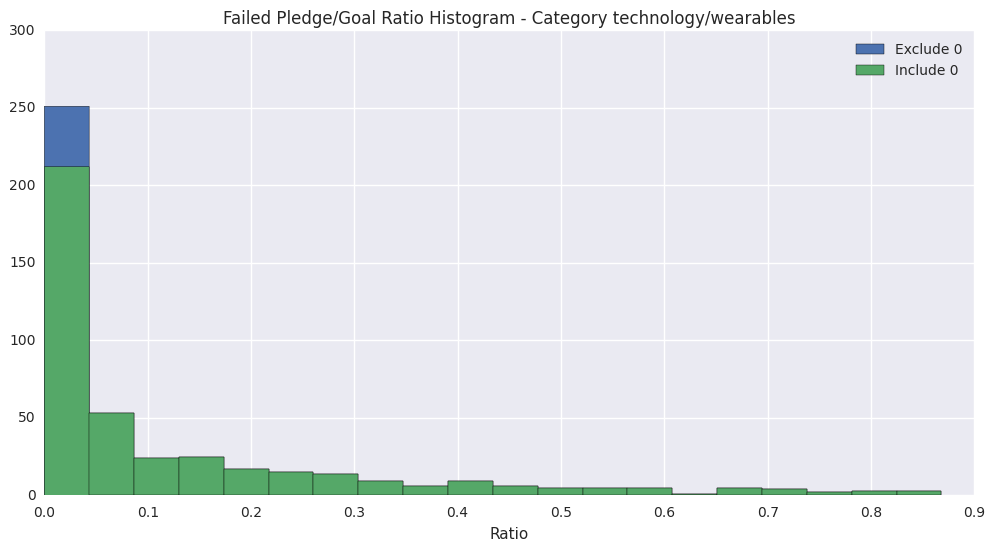

In [130]:
_ = map(p_g_ratio_plot, data['cat'].unique())

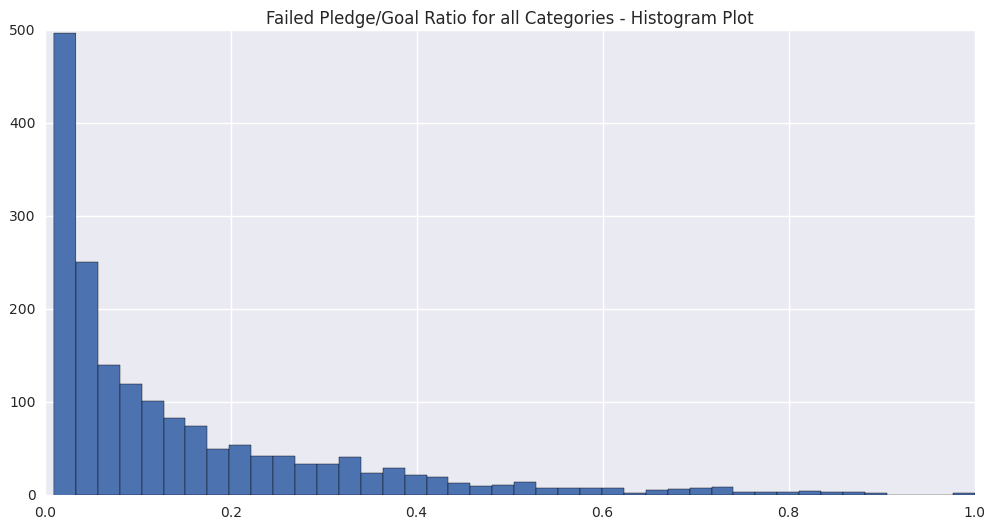

In [131]:
_ = plt.hist(goal_pledged_ratio[goal_pledged_ratio > 0.01].values, 
             bins=np.int(np.sqrt(len(goal_pledged_ratio[goal_pledged_ratio > 0.01]))))
_ = plt.title('Failed Pledge/Goal Ratio for all Categories - Histogram Plot')

682


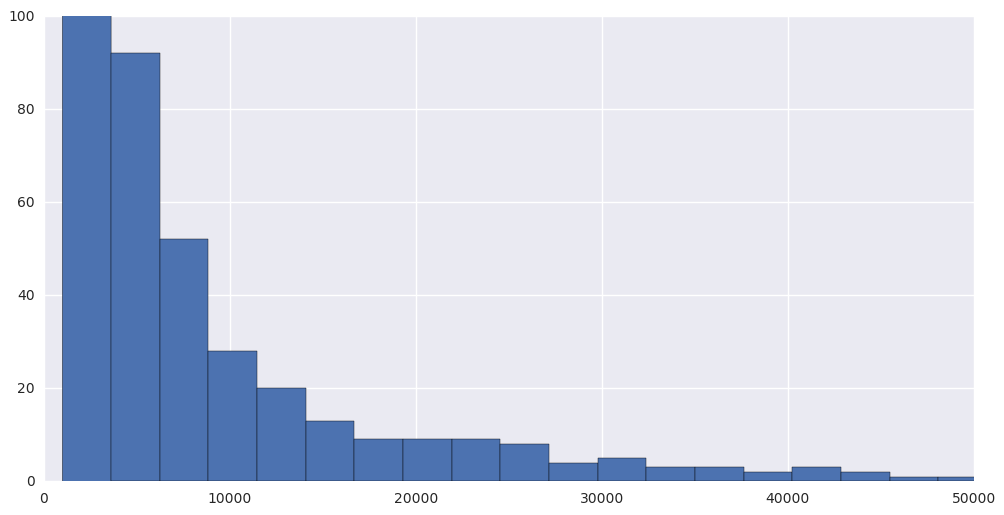

In [132]:
# Histogram of faild pledge > 1,000

print len(data[(data['state'] == 'failed') & (data['pledged'] > 1000.0)]['pledged'])
_ = plt.hist(data[(data['state'] == 'failed') & (data['pledged'] > 1000.0)]['pledged'].values, 100)
_ = plt.xlim(0, 50000)
_ = plt.ylim(0, 100)

['failed' 'canceled' 'successful' 'live' 'suspended']


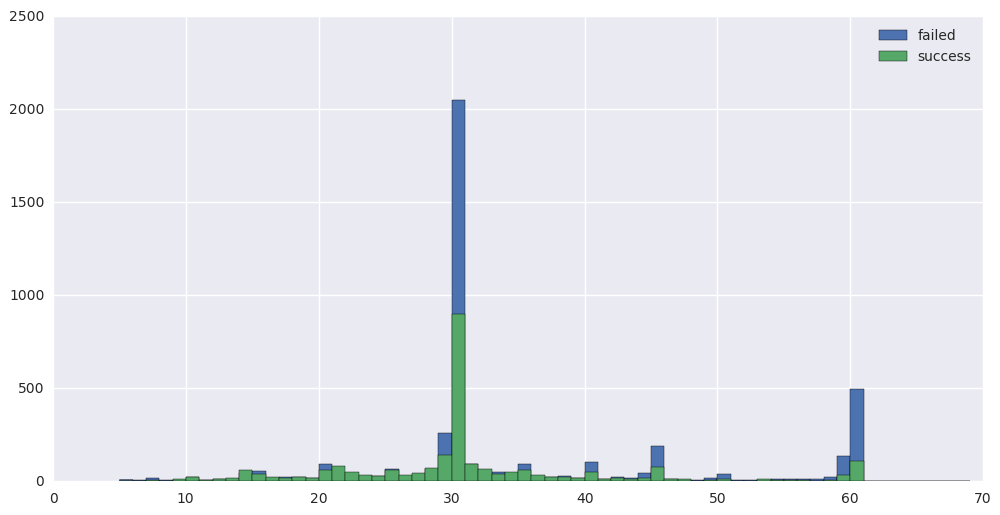

In [133]:
data['duration'] = (data['deadline'] - data['launched_at']) / 86400
print data['state'].unique()
_ = plt.hist(data[data['state'] == 'failed']['duration'].values, bins=range(5, 70, 1), label='failed')
_ = plt.hist(data[data['state'] == 'successful']['duration'].values, bins=range(5, 70, 1), label='success')
_ = plt.legend()

# #TODO: Failed Backers Count

In [134]:
print data[(data['state'] == 'failed')]['backers_count'].value_counts()

0       1198
1        847
2        525
3        313
4        232
5        159
6        131
7         97
8         89
10        74
9         67
12        55
11        53
14        49
13        48
17        35
16        29
20        28
15        25
21        21
18        21
23        20
19        19
24        18
25        17
26        17
31        16
27        16
22        14
29        13
        ... 
174        1
146        1
109        1
121        1
125        1
129        1
141        1
157        1
165        1
181        1
197        1
201        1
229        1
237        1
253        1
265        1
371        1
401        1
441        1
505        1
565        1
621        1
973        1
1009       1
66         1
74         1
86         1
106        1
122        1
369        1
Name: backers_count, dtype: int64


860


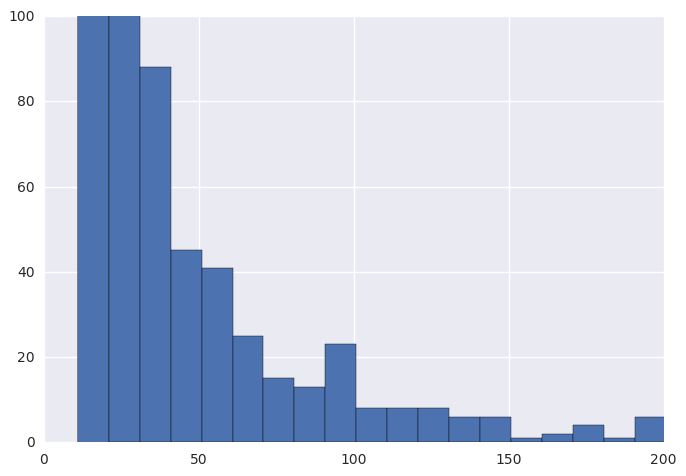

In [104]:
# Histogram of faild backers_count > 10

print len(data[(data['state'] == 'failed') & (data['backers_count'] > 10)]['backers_count'])
_ = plt.hist(data[(data['state'] == 'failed') & (data['backers_count'] > 10)]['backers_count'].values, 100)
_ = plt.xlim(0, 200)
_ = plt.ylim(0, 100)

# Some Old Stuff for Data Incubator Below

Continuous: 9 features
                      goal   pledged  deadline  state_changed_at  created_at  \
goal              1.000000  0.009806  0.005618          0.005342    0.005488   
pledged           0.009806  1.000000 -0.003590         -0.002863   -0.013569   
deadline          0.005618 -0.003590  1.000000          0.999747    0.967684   
state_changed_at  0.005342 -0.002863  0.999747          1.000000    0.967484   
created_at        0.005488 -0.013569  0.967684          0.967484    1.000000   
launched_at       0.004498 -0.004466  0.999603          0.999464    0.968248   
backers_count     0.002969  0.708985 -0.019108         -0.018488   -0.026842   
static_usd_rate  -0.031035 -0.043331 -0.073700         -0.073022   -0.068048   
usd_pledged       0.008752  0.954907 -0.011796         -0.011032   -0.021485   

                  launched_at  backers_count  static_usd_rate  usd_pledged  
goal                 0.004498       0.002969        -0.031035     0.008752  
pledged             -0

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


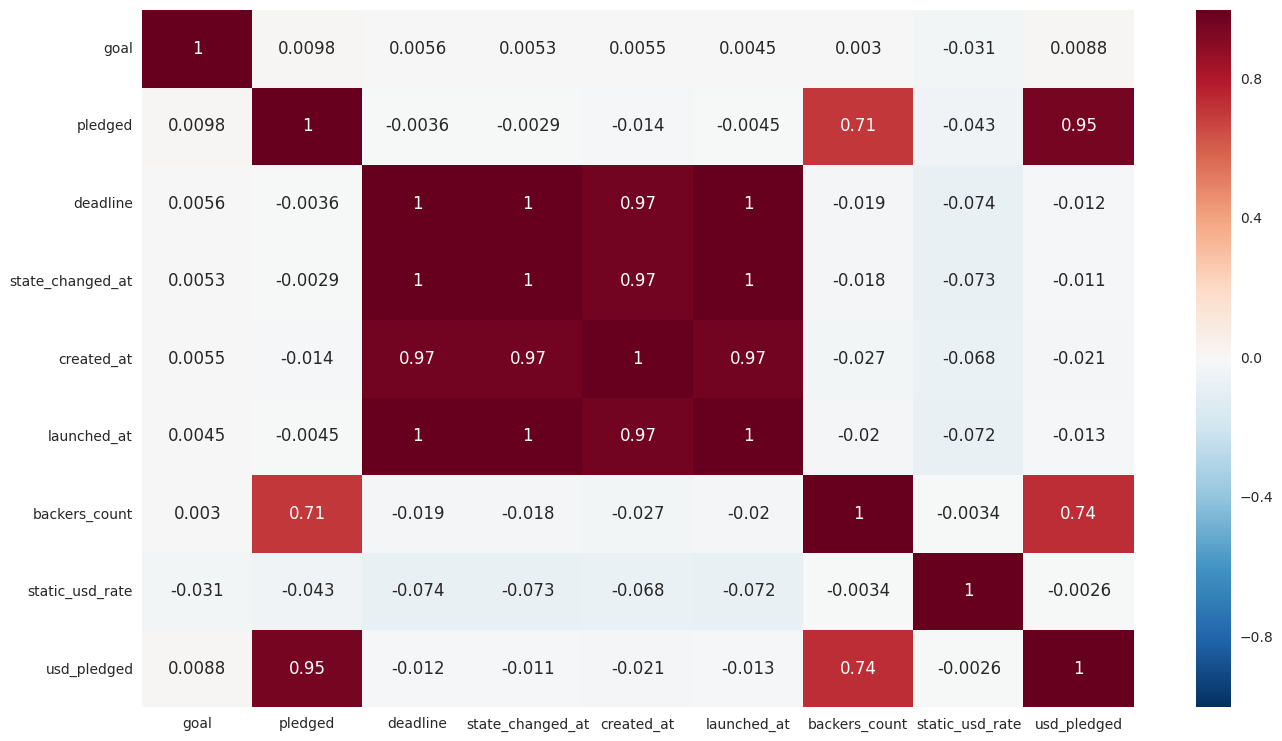

In [4]:
num_features = [num for num in list(data.select_dtypes(
                 include=['float64', 'int64']).columns) if num not in ['id']]
print "Continuous: {} features".format(len(num_features))

print data[num_features].corr(method='pearson')
plt.subplots(figsize=(16,9))
correlation_mat = data[num_features].corr(method='pearson')
sns.heatmap(correlation_mat, annot=True)

In [5]:
date_list = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
for date in date_list:
    num_features.remove(date)
print num_features

['goal', 'pledged', 'backers_count', 'static_usd_rate', 'usd_pledged']


array([[<matplotlib.axes.AxesSubplot object at 0x1099875d0>,
        <matplotlib.axes.AxesSubplot object at 0x10aebaa50>]], dtype=object)

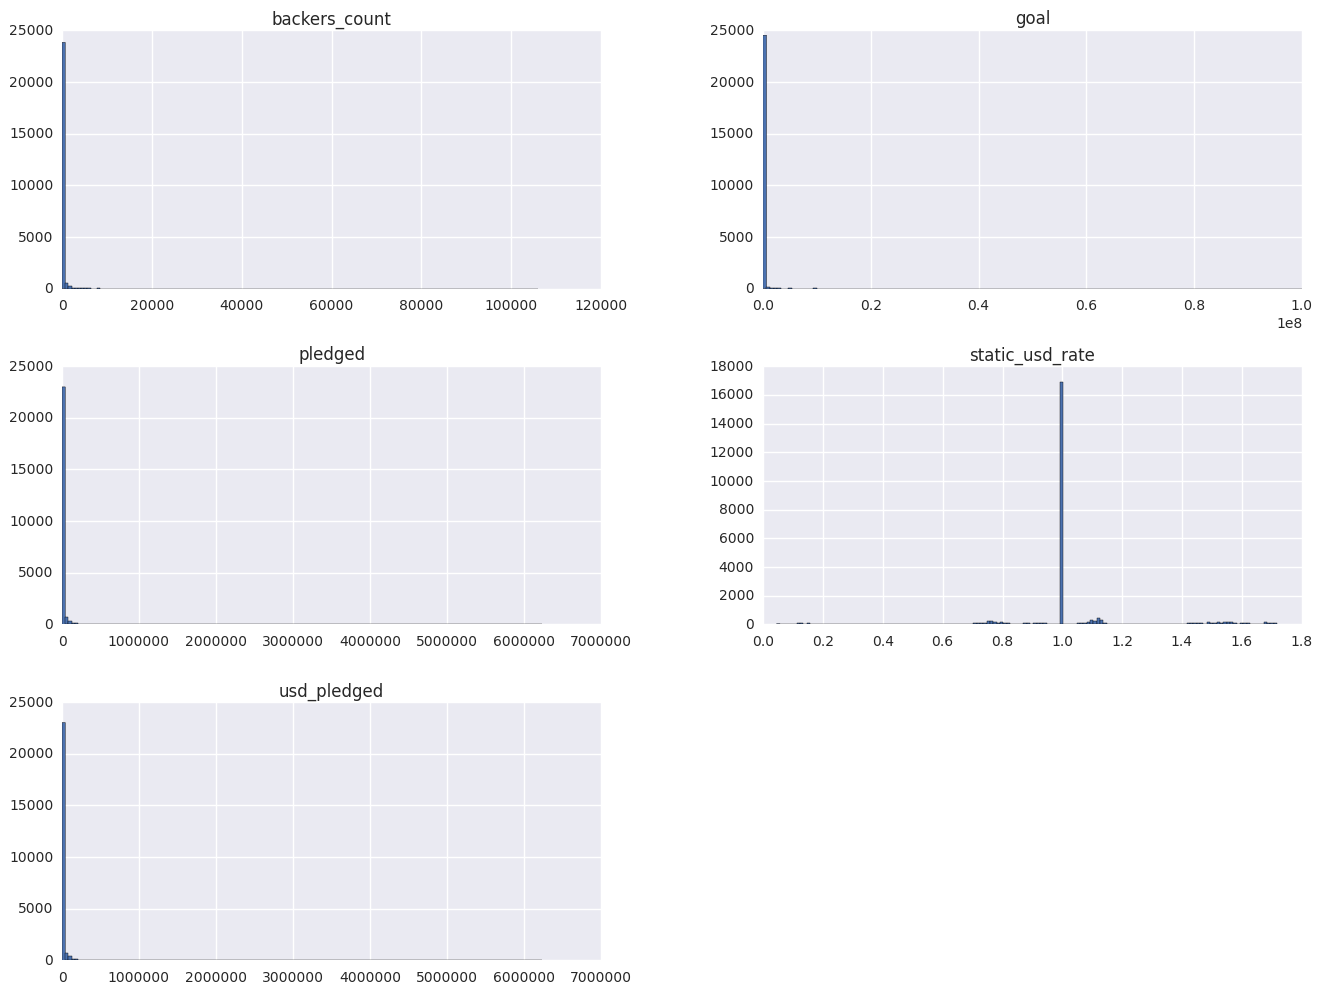

In [6]:
data[num_features].hist(bins=150, figsize=(16,12))

In [7]:
print data['backers_count'].count()
temp_backers = (data['backers_count']!= 0) & (data['backers_count']!= 1)
temp_backers = data[temp_backers]['backers_count']
print temp_backers.count()
# print temp_backers.value_counts()

24825
18252


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
ax1.hist((temp_backers), bins=50)
ax1.set_title('Backers Count')
ax1.axis(ymax=40)

ax2.hist(np.log(data['goal']), bins=50)
ax2.set_title("Goal Histogram")

ax3.hist(data['pledged'], bins=50)
ax3.axis(ymax=100)
ax3.set_title("Pledged Histogram")

ax4.hist(data['static_usd_rate'], bins=50)
ax4.axis(ymax=100)
ax4.set_title('Static USD Rate Histogram')

print data['static_usd_rate'].describe()

KeyboardInterrupt: 

In [8]:
print data['state'].unique()
successful = data[data['state'] == 'successful']
failed = data[data['state'] == 'failed']
canceled = data[data['state'] == 'canceled']
live = data[data['state'] == 'live']

['successful' 'failed' 'canceled' 'suspended' 'live']


 Failed: 
count    1.504400e+04
mean     1.070785e+05
std      1.483732e+06
min      1.000000e+00
25%      5.000000e+03
50%      1.500000e+04
75%      5.000000e+04
max      1.000000e+08
Name: failed_goal, dtype: float64 
median:  15000.0

Successful: 
count       6573.000000
mean       19474.981188
std        43440.593408
min            1.000000
25%         1500.000000
50%         5000.000000
75%        20000.000000
max      1000000.000000
Name: successful_goal, dtype: float64 
median:  5000.0


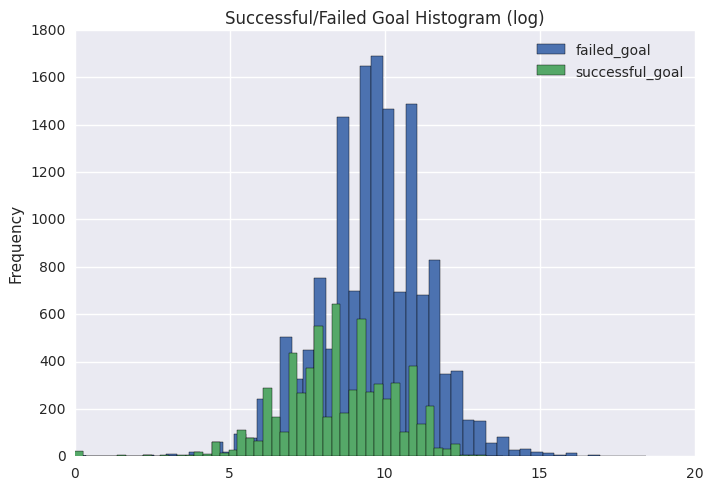

In [12]:
# fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 8))
# ax5.hist(np.log(successful['goal']), bins=50)
# ax5.set_title('Successful Goal Histogram (log)')


failed.rename(columns={'goal': 'failed_goal'}, inplace=True)
ax6 = np.log(failed['failed_goal']).plot(kind='hist', bins=50, legend=True)
ax6.set_title('Failed Goal Histogram (log)')


successful.rename(columns={'goal': 'successful_goal'}, inplace=True)
ax7 = np.log(successful['successful_goal']).plot(kind='hist', bins=50, legend=True)
ax7.set_title('Successful/Failed Goal Histogram (log)')

print 'Failed: \n', failed['failed_goal'].describe(), '\nmedian: ', failed['failed_goal'].median()
print '\nSuccessful: \n', successful['successful_goal'].describe(), '\nmedian: ', successful['successful_goal'].median()

# Looks like failed ones usually aimed too high.

In [5]:
# Word count for title, compare successful and failed.

success_title_len = [len(title) for title in successful['name']]
failed_title_len = [len(title) for title in failed['name']]
print 'Success: ', np.mean(success_title_len), ', ', np.median(success_title_len), ', ', np.std(success_title_len)
print 'Failed: ', np.mean(failed_title_len), ', ', np.median(failed_title_len), ', ', np.std(failed_title_len)

Success:  38.7270780273 ,  40.0 ,  15.3863499434
Failed:  34.5581715944 ,  34.0 ,  16.5264799933


In [6]:
# Word count for blurb, compare successful and failed.

success_blurb_len = [len(blurb) for blurb in successful['blurb']]
failed_blurb_len = [len(blurb) for blurb in failed['blurb']]
print 'Success: ', np.mean(success_blurb_len), ', ', np.median(success_blurb_len), ', ', np.std(success_blurb_len)
print 'Failed: ', np.mean(failed_blurb_len), ', ', np.median(failed_blurb_len), ', ', np.std(failed_blurb_len)

Success:  117.136200509 ,  126.0 ,  22.1302665773
Failed:  116.128024669 ,  126.0 ,  24.4227974376


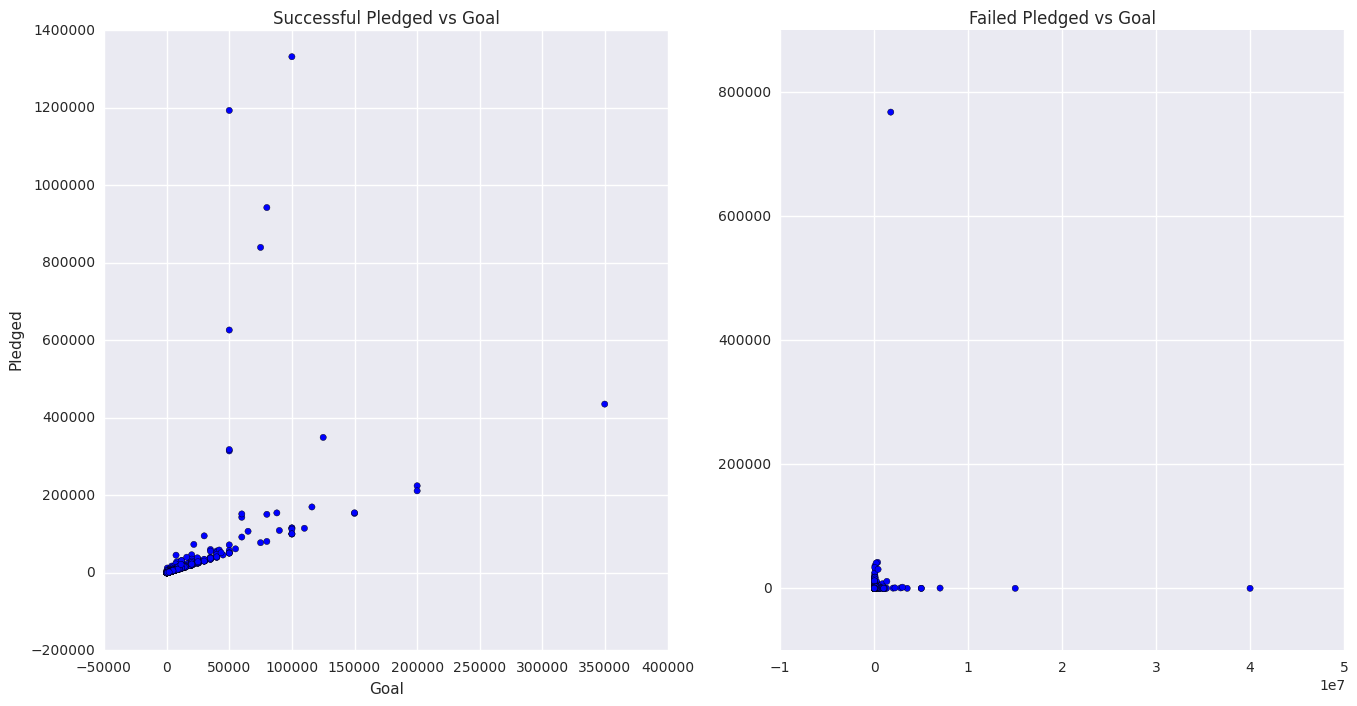

In [366]:
fig, ((ax9, ax10)) = plt.subplots(1, 2, figsize=(16, 8))
ax9.scatter(x=successful['goal'], y=successful['pledged'])
ax9.set_title('Successful: Pledged vs Goal')
ax9.set_ylabel('Pledged')
ax9.set_xlabel('Goal')

ax10.scatter(x=failed['goal'], y=failed['pledged'])
ax10.set_title('Failed: Pledged vs Goal')

In [108]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 28 columns):
id                        4150 non-null int64
photo                     4150 non-null object
name                      4150 non-null object
blurb                     4149 non-null object
goal                      4150 non-null float64
pledged                   4150 non-null float64
state                     4150 non-null object
slug                      4150 non-null object
disable_communication     4150 non-null bool
country                   4150 non-null object
currency                  4150 non-null object
currency_symbol           4150 non-null object
currency_trailing_code    4150 non-null bool
deadline                  4150 non-null int64
state_changed_at          4150 non-null int64
created_at                4150 non-null int64
launched_at               4150 non-null int64
staff_pick                4150 non-null bool
backers_count             4150 non-null int64
static_usd

In [107]:
# Drop useless columns.
data = data.drop(['friends', 'is_starred', 'is_backing', 'permissions'], 1)

In [82]:
# Visualize the unique values in categorical features
for item in data.dtypes[data.dtypes == 'object'].index:
    print item, ':', len(data[item].unique())
for item in data.dtypes[data.dtypes == 'object'].index:
    if len(data[item].unique())<=20:
        print item, ': ', data[item].unique()
    elif len(data[item].unique())==42:
        print item

photo : 4150
name : 4141
blurb : 4125
state : 5
slug : 4150
country : 20
currency : 12
currency_symbol : 5
creator : 4133
location : 1390
category : 10
profile : 4150
urls : 4150
source_url : 42
category_extracted : 10
state :  ['successful' 'failed' 'canceled' 'suspended' 'live']
country :  ['GB' 'US' 'DE' 'CA' 'AU' 'NL' 'NO' 'IE' 'NZ' 'DK' 'FR' 'ES' 'CH' 'IT' 'SE'
 'AT' 'MX' 'SG' 'BE' 'LU']
currency :  ['GBP' 'USD' 'EUR' 'CAD' 'AUD' 'NOK' 'NZD' 'DKK' 'CHF' 'SEK' 'MXN' 'SGD']
currency_symbol :  ['\xc2\xa3' '$' '\xe2\x82\xac' 'kr' 'Fr ']
category :  ['theater' 'technology' 'publishing' 'music' 'journalism' 'games'
 'film_video' 'fashion' 'art' 'photography']
source_url
category_extracted :  ['theater' 'technology' 'publishing' 'music' 'journalism' 'games'
 'film_video' 'fashion' 'art' 'photography']


In [130]:
# Remake the feature of category, because it was all urls
import re
category_all = data.iloc[:]['category']
category_extracted = []

for category in category_all:
    temp = re.findall('{"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/(.*?)/',category)
    if temp[0] == 'film%20&%20video':
        temp[0] = 'film_video'
    category_extracted.append(temp[0])

df_category_extracted = pd.DataFrame(data={'category_extracted': category_extracted})
data['category'] = category_extracted
print data['category'].unique()

['theater' 'technology' 'publishing' 'music' 'journalism' 'games'
 'film_video' 'fashion' 'art' 'photography']


###### [Theater, Technology, Publishing, Music, Journalism, Games, Film & Video, Fashion, Art, Photography]

###### These categories are not included in our data: [Design, Food, Comics, Dance, Craft]

In [135]:
for column in data.columns:
    print column, ':', data.iloc[1000][column]

id : 469242312
photo : {"small":"https://ksr-ugc.imgix.net/assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg?w=160&h=90&fit=fill&bg=FFFFFF&v=1463761305&auto=format&q=92&s=06c3787e4b297fec4993ae55bca0f069","thumb":"https://ksr-ugc.imgix.net/assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg?w=40&h=22&fit=fill&bg=FFFFFF&v=1463761305&auto=format&q=92&s=d9b3fb4329824e5e73070292bcec14b5","1024x576":"https://ksr-ugc.imgix.net/assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg?w=1024&h=576&fit=fill&bg=FFFFFF&v=1463761305&auto=format&q=92&s=541b00cc5eece3d6064d63524174607b","med":"https://ksr-ugc.imgix.net/assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg?w=266&h=150&fit=fill&bg=FFFFFF&v=1463761305&auto=format&q=92&s=93b5eb2188664732ec8c8e3a1d2daef9","key":"assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg","1536x864":"https://ksr-ugc.imgix.net/assets/012/440/803/6ffe562af4fa6d305672c29329e42a4e_original.jpg?w=1536&h=864&